# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 24139 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    0 of 24139) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 24139) |                    | Elapsed Time: 0:00:25 ETA: 19:10:56

  0% (   25 of 24139) |                     | Elapsed Time: 0:00:25 ETA: 6:57:32

  0% (   41 of 24139) |                     | Elapsed Time: 0:00:26 ETA: 4:16:32

  0% (   57 of 24139) |                     | Elapsed Time: 0:00:26 ETA: 3:05:56

  0% (   73 of 24139) |                     | Elapsed Time: 0:00:26 ETA: 0:05:24

  0% (   89 of 24139) |                     | Elapsed Time: 0:00:26 ETA: 0:05:22

  0% (  105 of 24139) |                     | Elapsed Time: 0:00:27 ETA: 0:05:18

  0% (  121 of 24139) |                     | Elapsed Time: 0:00:27 ETA: 0:05:14

  0% (  137 of 24139) |                     | Elapsed Time: 0:00:27 ETA: 0:05:15

  0% (  154 of 24139) |                     | Elapsed Time: 0:00:27 ETA: 0:05:08

  0% (  170 of 24139) |                     | Elapsed Time: 0:00:27 ETA: 0:05:11

  0% (  188 of 24139) |                     | Elapsed Time: 0:00:28 ETA: 0:05:03

  0% (  205 of 24139) |                     | Elapsed Time: 0:00:28 ETA: 0:04:59

  0% (  220 of 24139) |                     | Elapsed Time: 0:00:28 ETA: 0:05:02

  0% (  235 of 24139) |                     | Elapsed Time: 0:00:28 ETA: 0:05:09

  1% (  250 of 24139) |                     | Elapsed Time: 0:00:28 ETA: 0:05:15

  1% (  266 of 24139) |                     | Elapsed Time: 0:00:29 ETA: 0:05:27

  1% (  282 of 24139) |                     | Elapsed Time: 0:00:29 ETA: 0:05:32

  1% (  302 of 24139) |                     | Elapsed Time: 0:00:29 ETA: 0:05:28

  1% (  319 of 24139) |                     | Elapsed Time: 0:00:29 ETA: 0:05:19

  1% (  335 of 24139) |                     | Elapsed Time: 0:00:30 ETA: 0:05:15

  1% (  351 of 24139) |                     | Elapsed Time: 0:00:30 ETA: 0:05:13

  1% (  366 of 24139) |                     | Elapsed Time: 0:00:30 ETA: 0:05:17

  1% (  382 of 24139) |                     | Elapsed Time: 0:00:30 ETA: 0:05:18

  1% (  398 of 24139) |                     | Elapsed Time: 0:00:30 ETA: 0:05:23

  1% (  416 of 24139) |                     | Elapsed Time: 0:00:31 ETA: 0:05:17

  1% (  432 of 24139) |                     | Elapsed Time: 0:00:31 ETA: 0:05:10

  1% (  448 of 24139) |                     | Elapsed Time: 0:00:31 ETA: 0:05:04

  1% (  464 of 24139) |                     | Elapsed Time: 0:00:31 ETA: 0:05:00

  1% (  480 of 24139) |                     | Elapsed Time: 0:00:31 ETA: 0:05:03

  2% (  496 of 24139) |                     | Elapsed Time: 0:00:32 ETA: 0:05:06

  2% (  512 of 24139) |                     | Elapsed Time: 0:00:32 ETA: 0:05:06

  2% (  528 of 24139) |                     | Elapsed Time: 0:00:32 ETA: 0:05:05

  2% (  544 of 24139) |                     | Elapsed Time: 0:00:32 ETA: 0:05:05

  2% (  560 of 24139) |                     | Elapsed Time: 0:00:33 ETA: 0:05:05

  2% (  576 of 24139) |                     | Elapsed Time: 0:00:33 ETA: 0:05:05

  2% (  592 of 24139) |                     | Elapsed Time: 0:00:33 ETA: 0:05:04

  2% (  612 of 24139) |                     | Elapsed Time: 0:00:33 ETA: 0:05:04

  2% (  628 of 24139) |                     | Elapsed Time: 0:00:33 ETA: 0:05:04

  2% (  644 of 24139) |                     | Elapsed Time: 0:00:34 ETA: 0:05:04

  2% (  660 of 24139) |                     | Elapsed Time: 0:00:34 ETA: 0:05:01

  2% (  677 of 24139) |                     | Elapsed Time: 0:00:34 ETA: 0:05:00

  2% (  693 of 24139) |                     | Elapsed Time: 0:00:34 ETA: 0:04:57

  2% (  709 of 24139) |                     | Elapsed Time: 0:00:34 ETA: 0:04:56

  3% (  726 of 24139) |                     | Elapsed Time: 0:00:35 ETA: 0:04:55

  3% (  742 of 24139) |                     | Elapsed Time: 0:00:35 ETA: 0:04:56

  3% (  758 of 24139) |                     | Elapsed Time: 0:00:35 ETA: 0:04:57

  3% (  775 of 24139) |                     | Elapsed Time: 0:00:35 ETA: 0:04:58

  3% (  791 of 24139) |                     | Elapsed Time: 0:00:35 ETA: 0:05:00

  3% (  809 of 24139) |                     | Elapsed Time: 0:00:36 ETA: 0:04:55

  3% (  826 of 24139) |                     | Elapsed Time: 0:00:36 ETA: 0:04:53

  3% (  842 of 24139) |                     | Elapsed Time: 0:00:36 ETA: 0:04:56

  3% (  857 of 24139) |                     | Elapsed Time: 0:00:36 ETA: 0:05:03

  3% (  867 of 24139) |                     | Elapsed Time: 0:00:37 ETA: 0:09:25

  3% (  883 of 24139) |                     | Elapsed Time: 0:00:37 ETA: 0:09:45

  3% (  899 of 24139) |                     | Elapsed Time: 0:00:38 ETA: 0:09:46

  3% (  913 of 24139) |                     | Elapsed Time: 0:00:38 ETA: 0:09:25

  3% (  929 of 24139) |                     | Elapsed Time: 0:00:38 ETA: 0:09:18

  3% (  945 of 24139) |                     | Elapsed Time: 0:00:38 ETA: 0:05:19

  3% (  961 of 24139) |                     | Elapsed Time: 0:00:38 ETA: 0:05:19

  4% (  977 of 24139) |                     | Elapsed Time: 0:00:39 ETA: 0:05:17

  4% (  993 of 24139) |                     | Elapsed Time: 0:00:39 ETA: 0:05:13

  4% ( 1009 of 24139) |                     | Elapsed Time: 0:00:39 ETA: 0:05:12

  4% ( 1025 of 24139) |                     | Elapsed Time: 0:00:39 ETA: 0:05:12

  4% ( 1041 of 24139) |                     | Elapsed Time: 0:00:40 ETA: 0:05:12

  4% ( 1057 of 24139) |                     | Elapsed Time: 0:00:40 ETA: 0:05:09

  4% ( 1074 of 24139) |                     | Elapsed Time: 0:00:40 ETA: 0:05:03

  4% ( 1092 of 24139) |                     | Elapsed Time: 0:00:40 ETA: 0:04:56

  4% ( 1108 of 24139) |                     | Elapsed Time: 0:00:40 ETA: 0:04:52

  4% ( 1124 of 24139) |                     | Elapsed Time: 0:00:41 ETA: 0:04:54

  4% ( 1140 of 24139) |                     | Elapsed Time: 0:00:41 ETA: 0:04:57

  4% ( 1156 of 24139) |#                    | Elapsed Time: 0:00:41 ETA: 0:05:06

  4% ( 1172 of 24139) |#                    | Elapsed Time: 0:00:41 ETA: 0:05:12

  4% ( 1188 of 24139) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:15

  5% ( 1207 of 24139) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:23

  5% ( 1225 of 24139) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:12

  5% ( 1243 of 24139) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:04

  5% ( 1261 of 24139) |#                    | Elapsed Time: 0:00:42 ETA: 0:04:55

  5% ( 1277 of 24139) |#                    | Elapsed Time: 0:00:43 ETA: 0:04:55

  5% ( 1291 of 24139) |#                    | Elapsed Time: 0:00:43 ETA: 0:04:54

  5% ( 1306 of 24139) |#                    | Elapsed Time: 0:00:43 ETA: 0:05:02

  5% ( 1322 of 24139) |#                    | Elapsed Time: 0:00:43 ETA: 0:05:08

  5% ( 1339 of 24139) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:11

  5% ( 1356 of 24139) |#                    | Elapsed Time: 0:00:44 ETA: 0:04:58

  5% ( 1372 of 24139) |#                    | Elapsed Time: 0:00:44 ETA: 0:04:50

  5% ( 1389 of 24139) |#                    | Elapsed Time: 0:00:44 ETA: 0:04:46

  5% ( 1406 of 24139) |#                    | Elapsed Time: 0:00:44 ETA: 0:04:44

  5% ( 1423 of 24139) |#                    | Elapsed Time: 0:00:45 ETA: 0:04:47

  5% ( 1441 of 24139) |#                    | Elapsed Time: 0:00:45 ETA: 0:04:40

  6% ( 1459 of 24139) |#                    | Elapsed Time: 0:00:45 ETA: 0:04:36

  6% ( 1477 of 24139) |#                    | Elapsed Time: 0:00:45 ETA: 0:04:31

  6% ( 1495 of 24139) |#                    | Elapsed Time: 0:00:45 ETA: 0:04:28

  6% ( 1518 of 24139) |#                    | Elapsed Time: 0:00:46 ETA: 0:04:26

  6% ( 1536 of 24139) |#                    | Elapsed Time: 0:00:46 ETA: 0:04:25

  6% ( 1554 of 24139) |#                    | Elapsed Time: 0:00:46 ETA: 0:04:26

  6% ( 1571 of 24139) |#                    | Elapsed Time: 0:00:46 ETA: 0:04:30

  6% ( 1589 of 24139) |#                    | Elapsed Time: 0:00:47 ETA: 0:04:32

  6% ( 1607 of 24139) |#                    | Elapsed Time: 0:00:47 ETA: 0:04:33

  6% ( 1623 of 24139) |#                    | Elapsed Time: 0:00:47 ETA: 0:04:39

  6% ( 1640 of 24139) |#                    | Elapsed Time: 0:00:47 ETA: 0:04:39

  6% ( 1658 of 24139) |#                    | Elapsed Time: 0:00:47 ETA: 0:04:40

  6% ( 1674 of 24139) |#                    | Elapsed Time: 0:00:48 ETA: 0:04:45

  7% ( 1690 of 24139) |#                    | Elapsed Time: 0:00:48 ETA: 0:04:50

  7% ( 1705 of 24139) |#                    | Elapsed Time: 0:00:48 ETA: 0:04:57

  7% ( 1721 of 24139) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:01

  7% ( 1737 of 24139) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:03

  7% ( 1753 of 24139) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:02

  7% ( 1769 of 24139) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:54

  7% ( 1785 of 24139) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:55

  7% ( 1801 of 24139) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:57

  7% ( 1819 of 24139) |#                    | Elapsed Time: 0:00:50 ETA: 0:04:57

  7% ( 1835 of 24139) |#                    | Elapsed Time: 0:00:50 ETA: 0:04:57

  7% ( 1852 of 24139) |#                    | Elapsed Time: 0:00:50 ETA: 0:04:55

  7% ( 1870 of 24139) |#                    | Elapsed Time: 0:00:50 ETA: 0:04:48

  7% ( 1887 of 24139) |#                    | Elapsed Time: 0:00:50 ETA: 0:04:44

  7% ( 1904 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:37

  7% ( 1920 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:39

  8% ( 1935 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:46

  8% ( 1951 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:49

  8% ( 1968 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:50

  8% ( 1985 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:54

  8% ( 2000 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:57

  8% ( 2016 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:00

  8% ( 2032 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:59

  8% ( 2048 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:06

  8% ( 2064 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:56

  8% ( 2082 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:48

  8% ( 2099 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:44

  8% ( 2121 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:39

  8% ( 2137 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:37

  8% ( 2153 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:43

  8% ( 2169 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:48

  9% ( 2185 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:50

  9% ( 2202 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:46

  9% ( 2218 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:45

  9% ( 2234 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:45

  9% ( 2252 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:38

  9% ( 2268 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:42

  9% ( 2285 of 24139) |#                    | Elapsed Time: 0:00:56 ETA: 0:04:39

  9% ( 2302 of 24139) |##                   | Elapsed Time: 0:00:56 ETA: 0:04:34

  9% ( 2319 of 24139) |##                   | Elapsed Time: 0:00:56 ETA: 0:04:36

  9% ( 2337 of 24139) |##                   | Elapsed Time: 0:00:56 ETA: 0:04:34

  9% ( 2355 of 24139) |##                   | Elapsed Time: 0:00:57 ETA: 0:04:28

  9% ( 2372 of 24139) |##                   | Elapsed Time: 0:00:57 ETA: 0:04:28

  9% ( 2388 of 24139) |##                   | Elapsed Time: 0:00:57 ETA: 0:04:31

  9% ( 2404 of 24139) |##                   | Elapsed Time: 0:00:57 ETA: 0:04:36

 10% ( 2422 of 24139) |##                   | Elapsed Time: 0:00:57 ETA: 0:04:42

 10% ( 2438 of 24139) |##                   | Elapsed Time: 0:00:58 ETA: 0:04:51

 10% ( 2453 of 24139) |##                   | Elapsed Time: 0:00:58 ETA: 0:04:54

 10% ( 2468 of 24139) |##                   | Elapsed Time: 0:00:58 ETA: 0:05:02

 10% ( 2484 of 24139) |##                   | Elapsed Time: 0:00:58 ETA: 0:04:57

 10% ( 2500 of 24139) |##                   | Elapsed Time: 0:00:58 ETA: 0:04:56

 10% ( 2516 of 24139) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:56

 10% ( 2532 of 24139) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:54

 10% ( 2547 of 24139) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:57

 10% ( 2563 of 24139) |##                   | Elapsed Time: 0:00:59 ETA: 0:05:00

 10% ( 2579 of 24139) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:59

 10% ( 2595 of 24139) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:59

 10% ( 2611 of 24139) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:58

 10% ( 2628 of 24139) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:53

 10% ( 2645 of 24139) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:45

 11% ( 2661 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:45

 11% ( 2679 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:37

 11% ( 2695 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:34

 11% ( 2716 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:39

 11% ( 2732 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:34

 11% ( 2748 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:32

 11% ( 2765 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:29

 11% ( 2781 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:31

 11% ( 2797 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:34

 11% ( 2813 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:36

 11% ( 2829 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:38

 11% ( 2845 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:39

 11% ( 2861 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:37

 11% ( 2879 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:34

 11% ( 2896 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:32

 12% ( 2912 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:32

 12% ( 2928 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:31

 12% ( 2944 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:33

 12% ( 2960 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:36

 12% ( 2976 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:35

 12% ( 2992 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:35

 12% ( 3008 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:34

 12% ( 3024 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:43

 12% ( 3036 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:59

 12% ( 3054 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:51

 12% ( 3071 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:50

 12% ( 3088 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:45

 12% ( 3105 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:23

 12% ( 3122 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:04:22

 13% ( 3139 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:04:22

 13% ( 3157 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:04:22

 13% ( 3175 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:04:20

 13% ( 3193 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:19

 13% ( 3210 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:19

 13% ( 3228 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:18

 13% ( 3245 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:18

 13% ( 3261 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:22

 13% ( 3277 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:27

 13% ( 3293 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:30

 13% ( 3309 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:33

 13% ( 3329 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:30

 13% ( 3345 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:28

 13% ( 3359 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:33

 13% ( 3375 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:33

 14% ( 3391 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:35

 14% ( 3409 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:34

 14% ( 3427 of 24139) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:25

 14% ( 3443 of 24139) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:19

 14% ( 3460 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:16

 14% ( 3476 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:19

 14% ( 3492 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:04:25

 14% ( 3510 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:04:24

 14% ( 3524 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:04:39

 14% ( 3540 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:04:40

 14% ( 3556 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:04:39

 14% ( 3572 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:04:39

 14% ( 3588 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:04:34

 14% ( 3605 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:04:23

 15% ( 3621 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:04:25

 15% ( 3639 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:04:17

 15% ( 3655 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:04:18

 15% ( 3673 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:14

 15% ( 3690 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:13

 15% ( 3707 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:12

 15% ( 3724 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:10

 15% ( 3741 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:14

 15% ( 3758 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:15

 15% ( 3776 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:14

 15% ( 3792 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:14

 15% ( 3808 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:18

 15% ( 3824 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:17

 15% ( 3840 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:21

 15% ( 3857 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:22

 16% ( 3874 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:23

 16% ( 3886 of 24139) |###                  | Elapsed Time: 0:01:17 ETA: 0:09:02

 16% ( 3901 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:09:08

 16% ( 3923 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:09:13

 16% ( 3939 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:09:00

 16% ( 3955 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:34

 16% ( 3971 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:30

 16% ( 3988 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:28

 16% ( 4004 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:25

 16% ( 4019 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:30

 16% ( 4035 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:29

 16% ( 4053 of 24139) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:23

 16% ( 4069 of 24139) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:23

 16% ( 4086 of 24139) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:20

 17% ( 4104 of 24139) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:08

 17% ( 4119 of 24139) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:16

 17% ( 4133 of 24139) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:27

 17% ( 4146 of 24139) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:43

 17% ( 4160 of 24139) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:54

 17% ( 4173 of 24139) |###                  | Elapsed Time: 0:01:21 ETA: 0:05:11

 17% ( 4187 of 24139) |###                  | Elapsed Time: 0:01:22 ETA: 0:05:10

 17% ( 4201 of 24139) |###                  | Elapsed Time: 0:01:22 ETA: 0:05:06

 17% ( 4225 of 24139) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:52

 17% ( 4242 of 24139) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:34

 17% ( 4260 of 24139) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:21

 17% ( 4275 of 24139) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:17

 17% ( 4290 of 24139) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:16

 17% ( 4306 of 24139) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:25

 17% ( 4322 of 24139) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:30

 17% ( 4338 of 24139) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:33

 18% ( 4354 of 24139) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:30

 18% ( 4370 of 24139) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:28

 18% ( 4387 of 24139) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:24

 18% ( 4405 of 24139) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:19

 18% ( 4421 of 24139) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:19

 18% ( 4437 of 24139) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:16

 18% ( 4453 of 24139) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:14

 18% ( 4469 of 24139) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:20

 18% ( 4487 of 24139) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:18

 18% ( 4505 of 24139) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:12

 18% ( 4527 of 24139) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:09

 18% ( 4543 of 24139) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:05

 18% ( 4561 of 24139) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:02

 18% ( 4579 of 24139) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:02

 19% ( 4597 of 24139) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:01

 19% ( 4615 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:03:58

 19% ( 4633 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:03:57

 19% ( 4647 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:04:07

 19% ( 4665 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:04:06

 19% ( 4683 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:04:05

 19% ( 4699 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:04:07

 19% ( 4716 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:04:02

 19% ( 4734 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:57

 19% ( 4752 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:04:00

 19% ( 4770 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:59

 19% ( 4787 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:59

 19% ( 4805 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:52

 20% ( 4828 of 24139) |####                 | Elapsed Time: 0:01:30 ETA: 0:03:55

 20% ( 4842 of 24139) |####                 | Elapsed Time: 0:01:30 ETA: 0:04:06

 20% ( 4858 of 24139) |####                 | Elapsed Time: 0:01:30 ETA: 0:04:09

 20% ( 4876 of 24139) |####                 | Elapsed Time: 0:01:30 ETA: 0:04:08

 20% ( 4893 of 24139) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:12

 20% ( 4909 of 24139) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:11

 20% ( 4926 of 24139) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:58

 20% ( 4944 of 24139) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:58

 20% ( 4962 of 24139) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:53

 20% ( 4978 of 24139) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:56

 20% ( 4994 of 24139) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:57

 20% ( 5010 of 24139) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:05

 20% ( 5025 of 24139) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:17

 20% ( 5041 of 24139) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:20

 20% ( 5058 of 24139) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:15

 21% ( 5076 of 24139) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:08

 21% ( 5094 of 24139) |####                 | Elapsed Time: 0:01:33 ETA: 0:03:58

 21% ( 5111 of 24139) |####                 | Elapsed Time: 0:01:33 ETA: 0:03:53

 21% ( 5130 of 24139) |####                 | Elapsed Time: 0:01:34 ETA: 0:03:53

 21% ( 5146 of 24139) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:02

 21% ( 5161 of 24139) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:10

 21% ( 5177 of 24139) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:14

 21% ( 5193 of 24139) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:20

 21% ( 5209 of 24139) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:16

 21% ( 5226 of 24139) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:08

 21% ( 5243 of 24139) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:05

 21% ( 5260 of 24139) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:03

 21% ( 5278 of 24139) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:54

 21% ( 5295 of 24139) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:55

 22% ( 5313 of 24139) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:54

 22% ( 5330 of 24139) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:55

 22% ( 5347 of 24139) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:55

 22% ( 5364 of 24139) |####                 | Elapsed Time: 0:01:37 ETA: 0:03:57

 22% ( 5380 of 24139) |####                 | Elapsed Time: 0:01:37 ETA: 0:03:58

 22% ( 5397 of 24139) |####                 | Elapsed Time: 0:01:37 ETA: 0:03:59

 22% ( 5413 of 24139) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:01

 22% ( 5432 of 24139) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:03

 22% ( 5449 of 24139) |####                 | Elapsed Time: 0:01:38 ETA: 0:03:58

 22% ( 5465 of 24139) |####                 | Elapsed Time: 0:01:38 ETA: 0:03:56

 22% ( 5482 of 24139) |####                 | Elapsed Time: 0:01:38 ETA: 0:03:55

 22% ( 5499 of 24139) |####                 | Elapsed Time: 0:01:38 ETA: 0:03:51

 22% ( 5517 of 24139) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:50

 22% ( 5533 of 24139) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:51

 22% ( 5550 of 24139) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:50

 23% ( 5568 of 24139) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:50

 23% ( 5586 of 24139) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:47

 23% ( 5604 of 24139) |####                 | Elapsed Time: 0:01:40 ETA: 0:03:41

 23% ( 5619 of 24139) |####                 | Elapsed Time: 0:01:40 ETA: 0:03:48

 23% ( 5635 of 24139) |####                 | Elapsed Time: 0:01:40 ETA: 0:03:51

 23% ( 5651 of 24139) |####                 | Elapsed Time: 0:01:40 ETA: 0:03:58

 23% ( 5669 of 24139) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:00

 23% ( 5686 of 24139) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:01

 23% ( 5704 of 24139) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:50

 23% ( 5722 of 24139) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:43

 23% ( 5743 of 24139) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:42

 23% ( 5760 of 24139) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:45

 23% ( 5775 of 24139) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:50

 23% ( 5792 of 24139) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:53

 24% ( 5809 of 24139) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:53

 24% ( 5827 of 24139) |#####                | Elapsed Time: 0:01:42 ETA: 0:03:51

 24% ( 5845 of 24139) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:41

 24% ( 5861 of 24139) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:42

 24% ( 5878 of 24139) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:45

 24% ( 5895 of 24139) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:46

 24% ( 5912 of 24139) |#####                | Elapsed Time: 0:01:43 ETA: 0:03:49

 24% ( 5928 of 24139) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:51

 24% ( 5944 of 24139) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:50

 24% ( 5960 of 24139) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:52

 24% ( 5976 of 24139) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:55

 24% ( 5992 of 24139) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:55

 24% ( 6009 of 24139) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:53

 24% ( 6025 of 24139) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:52

 25% ( 6043 of 24139) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:54

 25% ( 6060 of 24139) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:51

 25% ( 6076 of 24139) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:52

 25% ( 6093 of 24139) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:51

 25% ( 6110 of 24139) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:50

 25% ( 6124 of 24139) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:56

 25% ( 6139 of 24139) |#####                | Elapsed Time: 0:01:46 ETA: 0:04:02

 25% ( 6155 of 24139) |#####                | Elapsed Time: 0:01:47 ETA: 0:04:01

 25% ( 6171 of 24139) |#####                | Elapsed Time: 0:01:47 ETA: 0:04:03

 25% ( 6187 of 24139) |#####                | Elapsed Time: 0:01:47 ETA: 0:04:00

 25% ( 6204 of 24139) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:50

 25% ( 6221 of 24139) |#####                | Elapsed Time: 0:01:48 ETA: 0:03:47

 25% ( 6238 of 24139) |#####                | Elapsed Time: 0:01:48 ETA: 0:03:45

 25% ( 6256 of 24139) |#####                | Elapsed Time: 0:01:48 ETA: 0:03:41

 25% ( 6274 of 24139) |#####                | Elapsed Time: 0:01:48 ETA: 0:03:38

 26% ( 6290 of 24139) |#####                | Elapsed Time: 0:01:48 ETA: 0:03:41

 26% ( 6306 of 24139) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:40

 26% ( 6324 of 24139) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:40

 26% ( 6345 of 24139) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:42

 26% ( 6361 of 24139) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:44

 26% ( 6378 of 24139) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:43

 26% ( 6393 of 24139) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:46

 26% ( 6408 of 24139) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:55

 26% ( 6424 of 24139) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:59

 26% ( 6440 of 24139) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:02

 26% ( 6457 of 24139) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:00

 26% ( 6474 of 24139) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:53

 26% ( 6490 of 24139) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:45

 26% ( 6508 of 24139) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:40

 27% ( 6525 of 24139) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:37

 27% ( 6541 of 24139) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:40

 27% ( 6558 of 24139) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:41

 27% ( 6576 of 24139) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:40

 27% ( 6594 of 24139) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:41

 27% ( 6610 of 24139) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:45

 27% ( 6624 of 24139) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:44

 27% ( 6639 of 24139) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:53

 27% ( 6655 of 24139) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:01

 27% ( 6670 of 24139) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:08

 27% ( 6686 of 24139) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:04

 27% ( 6704 of 24139) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:55

 27% ( 6720 of 24139) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:52

 27% ( 6736 of 24139) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:48

 27% ( 6752 of 24139) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:47

 28% ( 6768 of 24139) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:50

 28% ( 6784 of 24139) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:52

 28% ( 6800 of 24139) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:52

 28% ( 6816 of 24139) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:50

 28% ( 6832 of 24139) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:50

 28% ( 6849 of 24139) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:46

 28% ( 6867 of 24139) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:41

 28% ( 6884 of 24139) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:39

 28% ( 6902 of 24139) |######               | Elapsed Time: 0:01:56 ETA: 0:03:36

 28% ( 6920 of 24139) |######               | Elapsed Time: 0:01:57 ETA: 0:03:31

 28% ( 6940 of 24139) |######               | Elapsed Time: 0:01:57 ETA: 0:03:30

 28% ( 6958 of 24139) |######               | Elapsed Time: 0:01:57 ETA: 0:03:28

 28% ( 6975 of 24139) |######               | Elapsed Time: 0:01:57 ETA: 0:03:26

 28% ( 6992 of 24139) |######               | Elapsed Time: 0:01:57 ETA: 0:03:28

 29% ( 7009 of 24139) |######               | Elapsed Time: 0:01:58 ETA: 0:03:30

 29% ( 7026 of 24139) |######               | Elapsed Time: 0:01:58 ETA: 0:03:33

 29% ( 7041 of 24139) |######               | Elapsed Time: 0:01:58 ETA: 0:03:39

 29% ( 7057 of 24139) |######               | Elapsed Time: 0:01:58 ETA: 0:03:42

 29% ( 7074 of 24139) |######               | Elapsed Time: 0:01:58 ETA: 0:03:41

 29% ( 7091 of 24139) |######               | Elapsed Time: 0:01:59 ETA: 0:03:38

 29% ( 7108 of 24139) |######               | Elapsed Time: 0:01:59 ETA: 0:03:37

 29% ( 7126 of 24139) |######               | Elapsed Time: 0:01:59 ETA: 0:03:30

 29% ( 7144 of 24139) |######               | Elapsed Time: 0:01:59 ETA: 0:03:28

 29% ( 7161 of 24139) |######               | Elapsed Time: 0:02:00 ETA: 0:03:28

 29% ( 7176 of 24139) |######               | Elapsed Time: 0:02:00 ETA: 0:03:34

 29% ( 7194 of 24139) |######               | Elapsed Time: 0:02:00 ETA: 0:03:32

 29% ( 7211 of 24139) |######               | Elapsed Time: 0:02:00 ETA: 0:03:33

 29% ( 7227 of 24139) |######               | Elapsed Time: 0:02:00 ETA: 0:03:36

 30% ( 7250 of 24139) |######               | Elapsed Time: 0:02:01 ETA: 0:03:37

 30% ( 7268 of 24139) |######               | Elapsed Time: 0:02:01 ETA: 0:03:30

 30% ( 7283 of 24139) |######               | Elapsed Time: 0:02:01 ETA: 0:03:38

 30% ( 7301 of 24139) |######               | Elapsed Time: 0:02:01 ETA: 0:03:34

 30% ( 7315 of 24139) |######               | Elapsed Time: 0:02:02 ETA: 0:03:40

 30% ( 7329 of 24139) |######               | Elapsed Time: 0:02:02 ETA: 0:03:47

 30% ( 7345 of 24139) |######               | Elapsed Time: 0:02:02 ETA: 0:03:53

 30% ( 7362 of 24139) |######               | Elapsed Time: 0:02:02 ETA: 0:03:45

 30% ( 7379 of 24139) |######               | Elapsed Time: 0:02:02 ETA: 0:03:42

 30% ( 7396 of 24139) |######               | Elapsed Time: 0:02:03 ETA: 0:03:34

 30% ( 7412 of 24139) |######               | Elapsed Time: 0:02:03 ETA: 0:03:30

 30% ( 7429 of 24139) |######               | Elapsed Time: 0:02:03 ETA: 0:03:29

 30% ( 7446 of 24139) |######               | Elapsed Time: 0:02:03 ETA: 0:03:32

 30% ( 7463 of 24139) |######               | Elapsed Time: 0:02:03 ETA: 0:03:32

 30% ( 7479 of 24139) |######               | Elapsed Time: 0:02:04 ETA: 0:03:35

 31% ( 7495 of 24139) |######               | Elapsed Time: 0:02:04 ETA: 0:03:37

 31% ( 7511 of 24139) |######               | Elapsed Time: 0:02:04 ETA: 0:03:35

 31% ( 7527 of 24139) |######               | Elapsed Time: 0:02:04 ETA: 0:03:38

 31% ( 7544 of 24139) |######               | Elapsed Time: 0:02:05 ETA: 0:03:36

 31% ( 7560 of 24139) |######               | Elapsed Time: 0:02:05 ETA: 0:03:35

 31% ( 7576 of 24139) |######               | Elapsed Time: 0:02:05 ETA: 0:03:36

 31% ( 7593 of 24139) |######               | Elapsed Time: 0:02:05 ETA: 0:03:35

 31% ( 7610 of 24139) |######               | Elapsed Time: 0:02:05 ETA: 0:03:32

 31% ( 7627 of 24139) |######               | Elapsed Time: 0:02:06 ETA: 0:03:28

 31% ( 7645 of 24139) |######               | Elapsed Time: 0:02:06 ETA: 0:03:24

 31% ( 7655 of 24139) |######               | Elapsed Time: 0:02:07 ETA: 0:08:01

 31% ( 7671 of 24139) |######               | Elapsed Time: 0:02:07 ETA: 0:08:07

 31% ( 7687 of 24139) |######               | Elapsed Time: 0:02:08 ETA: 0:08:16

 31% ( 7703 of 24139) |######               | Elapsed Time: 0:02:08 ETA: 0:08:32

 31% ( 7720 of 24139) |######               | Elapsed Time: 0:02:08 ETA: 0:03:37

 32% ( 7738 of 24139) |######               | Elapsed Time: 0:02:08 ETA: 0:03:34

 32% ( 7754 of 24139) |######               | Elapsed Time: 0:02:08 ETA: 0:03:32

 32% ( 7770 of 24139) |######               | Elapsed Time: 0:02:09 ETA: 0:03:30

 32% ( 7786 of 24139) |######               | Elapsed Time: 0:02:09 ETA: 0:03:29

 32% ( 7802 of 24139) |######               | Elapsed Time: 0:02:09 ETA: 0:03:30

 32% ( 7817 of 24139) |######               | Elapsed Time: 0:02:09 ETA: 0:03:34

 32% ( 7832 of 24139) |######               | Elapsed Time: 0:02:09 ETA: 0:03:36

 32% ( 7855 of 24139) |######               | Elapsed Time: 0:02:10 ETA: 0:03:32

 32% ( 7873 of 24139) |######               | Elapsed Time: 0:02:10 ETA: 0:03:28

 32% ( 7889 of 24139) |######               | Elapsed Time: 0:02:10 ETA: 0:03:27

 32% ( 7905 of 24139) |######               | Elapsed Time: 0:02:10 ETA: 0:03:24

 32% ( 7921 of 24139) |######               | Elapsed Time: 0:02:11 ETA: 0:03:26

 32% ( 7937 of 24139) |######               | Elapsed Time: 0:02:11 ETA: 0:03:31

 32% ( 7953 of 24139) |######               | Elapsed Time: 0:02:11 ETA: 0:03:36

 33% ( 7968 of 24139) |######               | Elapsed Time: 0:02:11 ETA: 0:03:38

 33% ( 7985 of 24139) |######               | Elapsed Time: 0:02:11 ETA: 0:03:33

 33% ( 8002 of 24139) |######               | Elapsed Time: 0:02:12 ETA: 0:03:33

 33% ( 8019 of 24139) |######               | Elapsed Time: 0:02:12 ETA: 0:03:28

 33% ( 8035 of 24139) |######               | Elapsed Time: 0:02:12 ETA: 0:03:24

 33% ( 8053 of 24139) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:21

 33% ( 8071 of 24139) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:18

 33% ( 8089 of 24139) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:17

 33% ( 8105 of 24139) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:18

 33% ( 8123 of 24139) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:17

 33% ( 8147 of 24139) |#######              | Elapsed Time: 0:02:13 ETA: 0:03:16

 33% ( 8165 of 24139) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:16

 33% ( 8182 of 24139) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:15

 33% ( 8199 of 24139) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:15

 34% ( 8215 of 24139) |#######              | Elapsed Time: 0:02:14 ETA: 0:03:17

 34% ( 8231 of 24139) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:22

 34% ( 8248 of 24139) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:21

 34% ( 8266 of 24139) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:17

 34% ( 8284 of 24139) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:16

 34% ( 8300 of 24139) |#######              | Elapsed Time: 0:02:15 ETA: 0:03:16

 34% ( 8316 of 24139) |#######              | Elapsed Time: 0:02:16 ETA: 0:03:14

 34% ( 8333 of 24139) |#######              | Elapsed Time: 0:02:16 ETA: 0:03:17

 34% ( 8351 of 24139) |#######              | Elapsed Time: 0:02:16 ETA: 0:03:17

 34% ( 8369 of 24139) |#######              | Elapsed Time: 0:02:16 ETA: 0:03:14

 34% ( 8386 of 24139) |#######              | Elapsed Time: 0:02:16 ETA: 0:03:14

 34% ( 8403 of 24139) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:12

 34% ( 8420 of 24139) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:14

 34% ( 8437 of 24139) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:18

 35% ( 8457 of 24139) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:18

 35% ( 8475 of 24139) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:19

 35% ( 8491 of 24139) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:17

 35% ( 8507 of 24139) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:17

 35% ( 8523 of 24139) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:18

 35% ( 8540 of 24139) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:18

 35% ( 8557 of 24139) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:16

 35% ( 8574 of 24139) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:15

 35% ( 8590 of 24139) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:17

 35% ( 8606 of 24139) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:18

 35% ( 8624 of 24139) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:18

 35% ( 8639 of 24139) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:23

 35% ( 8655 of 24139) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:23

 35% ( 8670 of 24139) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:25

 35% ( 8688 of 24139) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:21

 36% ( 8703 of 24139) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:27

 36% ( 8717 of 24139) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:27

 36% ( 8732 of 24139) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:26

 36% ( 8751 of 24139) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:25

 36% ( 8769 of 24139) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:21

 36% ( 8785 of 24139) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:16

 36% ( 8803 of 24139) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:08

 36% ( 8821 of 24139) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:04

 36% ( 8839 of 24139) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:02

 36% ( 8856 of 24139) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:03

 36% ( 8873 of 24139) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:03

 36% ( 8891 of 24139) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:04

 36% ( 8908 of 24139) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:08

 36% ( 8926 of 24139) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:05

 37% ( 8942 of 24139) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:06

 37% ( 8960 of 24139) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:06

 37% ( 8976 of 24139) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:10

 37% ( 8993 of 24139) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:11

 37% ( 9010 of 24139) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:11

 37% ( 9027 of 24139) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:10

 37% ( 9045 of 24139) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:08

 37% ( 9061 of 24139) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:07

 37% ( 9078 of 24139) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:06

 37% ( 9096 of 24139) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:05

 37% ( 9114 of 24139) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:03

 37% ( 9131 of 24139) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:02

 37% ( 9148 of 24139) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:02

 37% ( 9166 of 24139) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:01

 38% ( 9184 of 24139) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:00

 38% ( 9202 of 24139) |########             | Elapsed Time: 0:02:27 ETA: 0:02:59

 38% ( 9220 of 24139) |########             | Elapsed Time: 0:02:27 ETA: 0:02:59

 38% ( 9237 of 24139) |########             | Elapsed Time: 0:02:27 ETA: 0:02:59

 38% ( 9253 of 24139) |########             | Elapsed Time: 0:02:27 ETA: 0:03:04

 38% ( 9271 of 24139) |########             | Elapsed Time: 0:02:28 ETA: 0:03:05

 38% ( 9289 of 24139) |########             | Elapsed Time: 0:02:28 ETA: 0:03:05

 38% ( 9307 of 24139) |########             | Elapsed Time: 0:02:28 ETA: 0:03:05

 38% ( 9322 of 24139) |########             | Elapsed Time: 0:02:28 ETA: 0:03:07

 38% ( 9337 of 24139) |########             | Elapsed Time: 0:02:28 ETA: 0:03:10

 38% ( 9354 of 24139) |########             | Elapsed Time: 0:02:29 ETA: 0:03:13

 38% ( 9370 of 24139) |########             | Elapsed Time: 0:02:29 ETA: 0:03:17

 38% ( 9386 of 24139) |########             | Elapsed Time: 0:02:29 ETA: 0:03:18

 38% ( 9403 of 24139) |########             | Elapsed Time: 0:02:29 ETA: 0:03:11

 39% ( 9418 of 24139) |########             | Elapsed Time: 0:02:29 ETA: 0:03:17

 39% ( 9436 of 24139) |########             | Elapsed Time: 0:02:30 ETA: 0:03:10

 39% ( 9453 of 24139) |########             | Elapsed Time: 0:02:30 ETA: 0:03:07

 39% ( 9470 of 24139) |########             | Elapsed Time: 0:02:30 ETA: 0:03:08

 39% ( 9487 of 24139) |########             | Elapsed Time: 0:02:30 ETA: 0:03:04

 39% ( 9505 of 24139) |########             | Elapsed Time: 0:02:31 ETA: 0:03:01

 39% ( 9522 of 24139) |########             | Elapsed Time: 0:02:31 ETA: 0:03:04

 39% ( 9538 of 24139) |########             | Elapsed Time: 0:02:31 ETA: 0:03:05

 39% ( 9555 of 24139) |########             | Elapsed Time: 0:02:31 ETA: 0:03:03

 39% ( 9573 of 24139) |########             | Elapsed Time: 0:02:31 ETA: 0:03:02

 39% ( 9590 of 24139) |########             | Elapsed Time: 0:02:32 ETA: 0:03:02

 39% ( 9605 of 24139) |########             | Elapsed Time: 0:02:32 ETA: 0:03:04

 39% ( 9621 of 24139) |########             | Elapsed Time: 0:02:32 ETA: 0:03:06

 39% ( 9637 of 24139) |########             | Elapsed Time: 0:02:32 ETA: 0:03:09

 40% ( 9656 of 24139) |########             | Elapsed Time: 0:02:32 ETA: 0:03:11

 40% ( 9672 of 24139) |########             | Elapsed Time: 0:02:33 ETA: 0:03:09

 40% ( 9690 of 24139) |########             | Elapsed Time: 0:02:33 ETA: 0:03:05

 40% ( 9706 of 24139) |########             | Elapsed Time: 0:02:33 ETA: 0:03:04

 40% ( 9722 of 24139) |########             | Elapsed Time: 0:02:33 ETA: 0:03:04

 40% ( 9738 of 24139) |########             | Elapsed Time: 0:02:34 ETA: 0:03:01

 40% ( 9755 of 24139) |########             | Elapsed Time: 0:02:34 ETA: 0:03:01

 40% ( 9772 of 24139) |########             | Elapsed Time: 0:02:34 ETA: 0:03:01

 40% ( 9789 of 24139) |########             | Elapsed Time: 0:02:34 ETA: 0:03:00

 40% ( 9805 of 24139) |########             | Elapsed Time: 0:02:34 ETA: 0:03:03

 40% ( 9821 of 24139) |########             | Elapsed Time: 0:02:35 ETA: 0:03:04

 40% ( 9838 of 24139) |########             | Elapsed Time: 0:02:35 ETA: 0:03:06

 40% ( 9853 of 24139) |########             | Elapsed Time: 0:02:35 ETA: 0:03:12

 40% ( 9868 of 24139) |########             | Elapsed Time: 0:02:35 ETA: 0:03:12

 40% ( 9884 of 24139) |########             | Elapsed Time: 0:02:35 ETA: 0:03:10

 41% ( 9902 of 24139) |########             | Elapsed Time: 0:02:36 ETA: 0:03:07

 41% ( 9919 of 24139) |########             | Elapsed Time: 0:02:36 ETA: 0:03:04

 41% ( 9937 of 24139) |########             | Elapsed Time: 0:02:36 ETA: 0:02:58

 41% ( 9958 of 24139) |########             | Elapsed Time: 0:02:36 ETA: 0:02:50

 41% ( 9974 of 24139) |########             | Elapsed Time: 0:02:37 ETA: 0:02:54

 41% ( 9990 of 24139) |########             | Elapsed Time: 0:02:37 ETA: 0:02:54

 41% (10008 of 24139) |########             | Elapsed Time: 0:02:37 ETA: 0:02:55

 41% (10025 of 24139) |########             | Elapsed Time: 0:02:37 ETA: 0:02:59

 41% (10043 of 24139) |########             | Elapsed Time: 0:02:37 ETA: 0:02:58

 41% (10060 of 24139) |########             | Elapsed Time: 0:02:38 ETA: 0:02:50

 41% (10076 of 24139) |########             | Elapsed Time: 0:02:38 ETA: 0:02:54

 41% (10092 of 24139) |########             | Elapsed Time: 0:02:38 ETA: 0:02:55

 41% (10109 of 24139) |########             | Elapsed Time: 0:02:38 ETA: 0:02:57

 41% (10126 of 24139) |########             | Elapsed Time: 0:02:38 ETA: 0:03:00

 42% (10144 of 24139) |########             | Elapsed Time: 0:02:39 ETA: 0:02:56

 42% (10161 of 24139) |########             | Elapsed Time: 0:02:39 ETA: 0:02:55

 42% (10178 of 24139) |########             | Elapsed Time: 0:02:39 ETA: 0:02:53

 42% (10194 of 24139) |########             | Elapsed Time: 0:02:39 ETA: 0:02:55

 42% (10210 of 24139) |########             | Elapsed Time: 0:02:40 ETA: 0:03:01

 42% (10226 of 24139) |########             | Elapsed Time: 0:02:40 ETA: 0:03:05

 42% (10243 of 24139) |########             | Elapsed Time: 0:02:40 ETA: 0:03:03

 42% (10260 of 24139) |########             | Elapsed Time: 0:02:40 ETA: 0:03:01

 42% (10276 of 24139) |########             | Elapsed Time: 0:02:40 ETA: 0:03:00

 42% (10291 of 24139) |########             | Elapsed Time: 0:02:41 ETA: 0:03:00

 42% (10307 of 24139) |########             | Elapsed Time: 0:02:41 ETA: 0:03:00

 42% (10324 of 24139) |########             | Elapsed Time: 0:02:41 ETA: 0:02:59

 42% (10342 of 24139) |########             | Elapsed Time: 0:02:41 ETA: 0:03:00

 42% (10359 of 24139) |#########            | Elapsed Time: 0:02:41 ETA: 0:02:56

 42% (10375 of 24139) |#########            | Elapsed Time: 0:02:42 ETA: 0:02:55

 43% (10390 of 24139) |#########            | Elapsed Time: 0:02:42 ETA: 0:02:58

 43% (10406 of 24139) |#########            | Elapsed Time: 0:02:42 ETA: 0:03:03

 43% (10422 of 24139) |#########            | Elapsed Time: 0:02:42 ETA: 0:03:09

 43% (10439 of 24139) |#########            | Elapsed Time: 0:02:43 ETA: 0:03:05

 43% (10456 of 24139) |#########            | Elapsed Time: 0:02:43 ETA: 0:03:00

 43% (10474 of 24139) |#########            | Elapsed Time: 0:02:43 ETA: 0:02:54

 43% (10492 of 24139) |#########            | Elapsed Time: 0:02:43 ETA: 0:02:51

 43% (10510 of 24139) |#########            | Elapsed Time: 0:02:43 ETA: 0:02:46

 43% (10528 of 24139) |#########            | Elapsed Time: 0:02:44 ETA: 0:02:45

 43% (10545 of 24139) |#########            | Elapsed Time: 0:02:44 ETA: 0:02:47

 43% (10561 of 24139) |#########            | Elapsed Time: 0:02:44 ETA: 0:02:50

 43% (10577 of 24139) |#########            | Elapsed Time: 0:02:44 ETA: 0:02:55

 43% (10591 of 24139) |#########            | Elapsed Time: 0:02:44 ETA: 0:03:04

 43% (10607 of 24139) |#########            | Elapsed Time: 0:02:45 ETA: 0:03:09

 44% (10623 of 24139) |#########            | Elapsed Time: 0:02:45 ETA: 0:03:06

 44% (10639 of 24139) |#########            | Elapsed Time: 0:02:45 ETA: 0:03:11

 44% (10654 of 24139) |#########            | Elapsed Time: 0:02:45 ETA: 0:03:07

 44% (10670 of 24139) |#########            | Elapsed Time: 0:02:46 ETA: 0:03:04

 44% (10686 of 24139) |#########            | Elapsed Time: 0:02:46 ETA: 0:03:04

 44% (10704 of 24139) |#########            | Elapsed Time: 0:02:46 ETA: 0:03:00

 44% (10722 of 24139) |#########            | Elapsed Time: 0:02:46 ETA: 0:02:54

 44% (10740 of 24139) |#########            | Elapsed Time: 0:02:46 ETA: 0:02:46

 44% (10758 of 24139) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:43

 44% (10774 of 24139) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:45

 44% (10790 of 24139) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:48

 44% (10806 of 24139) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:54

 44% (10823 of 24139) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:56

 44% (10840 of 24139) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:55

 45% (10863 of 24139) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:50

 45% (10880 of 24139) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:45

 45% (10895 of 24139) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:45

 45% (10912 of 24139) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:47

 45% (10930 of 24139) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:45

 45% (10947 of 24139) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:48

 45% (10963 of 24139) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:47

 45% (10980 of 24139) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:47

 45% (10996 of 24139) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:50

 45% (11012 of 24139) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:52

 45% (11028 of 24139) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:52

 45% (11044 of 24139) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:50

 45% (11060 of 24139) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:50

 45% (11076 of 24139) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:50

 45% (11092 of 24139) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:51

 46% (11108 of 24139) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:50

 46% (11124 of 24139) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:49

 46% (11140 of 24139) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:52

 46% (11153 of 24139) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:59

 46% (11173 of 24139) |#########            | Elapsed Time: 0:02:52 ETA: 0:03:00

 46% (11190 of 24139) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:58

 46% (11208 of 24139) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:53

 46% (11225 of 24139) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:48

 46% (11242 of 24139) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:39

 46% (11260 of 24139) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:36

 46% (11277 of 24139) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:36

 46% (11295 of 24139) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:34

 46% (11311 of 24139) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:37

 46% (11327 of 24139) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:38

 46% (11345 of 24139) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:39

 47% (11362 of 24139) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:40

 47% (11378 of 24139) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:42

 47% (11393 of 24139) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:45

 47% (11410 of 24139) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:44

 47% (11427 of 24139) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:48

 47% (11445 of 24139) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:43

 47% (11467 of 24139) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:45

 47% (11485 of 24139) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:39

 47% (11502 of 24139) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:39

 47% (11518 of 24139) |##########           | Elapsed Time: 0:02:56 ETA: 0:02:41

 47% (11536 of 24139) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:38

 47% (11553 of 24139) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:38

 47% (11569 of 24139) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:40

 47% (11586 of 24139) |##########           | Elapsed Time: 0:02:57 ETA: 0:02:36

 48% (11604 of 24139) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:34

 48% (11621 of 24139) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:35

 48% (11637 of 24139) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:38

 48% (11655 of 24139) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:35

 48% (11672 of 24139) |##########           | Elapsed Time: 0:02:58 ETA: 0:02:36

 48% (11689 of 24139) |##########           | Elapsed Time: 0:02:59 ETA: 0:02:38

 48% (11706 of 24139) |##########           | Elapsed Time: 0:02:59 ETA: 0:02:35

 48% (11724 of 24139) |##########           | Elapsed Time: 0:02:59 ETA: 0:02:34

 48% (11741 of 24139) |##########           | Elapsed Time: 0:02:59 ETA: 0:02:34

 48% (11759 of 24139) |##########           | Elapsed Time: 0:02:59 ETA: 0:02:33

 48% (11776 of 24139) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:31

 48% (11792 of 24139) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:33

 48% (11810 of 24139) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:34

 48% (11826 of 24139) |##########           | Elapsed Time: 0:03:00 ETA: 0:02:35

 49% (11843 of 24139) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:36

 49% (11859 of 24139) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:35

 49% (11875 of 24139) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:35

 49% (11889 of 24139) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:40

 49% (11905 of 24139) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:41

 49% (11922 of 24139) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:40

 49% (11938 of 24139) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:40

 49% (11955 of 24139) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:36

 49% (11971 of 24139) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:32

 49% (11988 of 24139) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:32

 49% (12006 of 24139) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:30

 49% (12024 of 24139) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:27

 49% (12042 of 24139) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:23

 49% (12058 of 24139) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:26

 50% (12078 of 24139) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:29

 50% (12092 of 24139) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:36

 50% (12109 of 24139) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:39

 50% (12125 of 24139) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:39

 50% (12142 of 24139) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:35

 50% (12159 of 24139) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:32

 50% (12176 of 24139) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:28

 50% (12192 of 24139) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:32

 50% (12210 of 24139) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:29

 50% (12226 of 24139) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:30

 50% (12244 of 24139) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:29

 50% (12261 of 24139) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:27

 50% (12278 of 24139) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:29

 50% (12286 of 24139) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:31

 50% (12301 of 24139) |##########           | Elapsed Time: 0:03:08 ETA: 0:06:26

 51% (12316 of 24139) |##########           | Elapsed Time: 0:03:08 ETA: 0:06:41

 51% (12333 of 24139) |##########           | Elapsed Time: 0:03:08 ETA: 0:06:41

 51% (12349 of 24139) |##########           | Elapsed Time: 0:03:08 ETA: 0:06:42

 51% (12372 of 24139) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:34

 51% (12387 of 24139) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:37

 51% (12404 of 24139) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:34

 51% (12420 of 24139) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:36

 51% (12436 of 24139) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:35

 51% (12452 of 24139) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:35

 51% (12470 of 24139) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:29

 51% (12486 of 24139) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:28

 51% (12504 of 24139) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:27

 51% (12522 of 24139) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:24

 51% (12539 of 24139) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:24

 52% (12555 of 24139) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:25

 52% (12571 of 24139) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:26

 52% (12587 of 24139) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:27

 52% (12604 of 24139) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:29

 52% (12621 of 24139) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:27

 52% (12639 of 24139) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:25

 52% (12656 of 24139) |###########          | Elapsed Time: 0:03:12 ETA: 0:02:25

 52% (12673 of 24139) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:23

 52% (12691 of 24139) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:22

 52% (12707 of 24139) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:24

 52% (12721 of 24139) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:29

 52% (12738 of 24139) |###########          | Elapsed Time: 0:03:13 ETA: 0:02:31

 52% (12755 of 24139) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:30

 52% (12771 of 24139) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:34

 52% (12788 of 24139) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:28

 53% (12806 of 24139) |###########          | Elapsed Time: 0:03:14 ETA: 0:02:22

 53% (12821 of 24139) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:26

 53% (12838 of 24139) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:23

 53% (12855 of 24139) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:23

 53% (12871 of 24139) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:25

 53% (12887 of 24139) |###########          | Elapsed Time: 0:03:15 ETA: 0:02:27

 53% (12903 of 24139) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:26

 53% (12920 of 24139) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:27

 53% (12936 of 24139) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:27

 53% (12953 of 24139) |###########          | Elapsed Time: 0:03:16 ETA: 0:02:25

 53% (12975 of 24139) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:23

 53% (12992 of 24139) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:23

 53% (13006 of 24139) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:27

 53% (13023 of 24139) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:24

 54% (13039 of 24139) |###########          | Elapsed Time: 0:03:17 ETA: 0:02:27

 54% (13056 of 24139) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:26

 54% (13073 of 24139) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:24

 54% (13089 of 24139) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:21

 54% (13106 of 24139) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:19

 54% (13122 of 24139) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:19

 54% (13138 of 24139) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:22

 54% (13154 of 24139) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:24

 54% (13172 of 24139) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:21

 54% (13187 of 24139) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:24

 54% (13204 of 24139) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:21

 54% (13220 of 24139) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:19

 54% (13238 of 24139) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:17

 54% (13256 of 24139) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:15

 55% (13277 of 24139) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:11

 55% (13295 of 24139) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:10

 55% (13312 of 24139) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:09

 55% (13330 of 24139) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:10

 55% (13347 of 24139) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:10

 55% (13364 of 24139) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:13

 55% (13380 of 24139) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:14

 55% (13398 of 24139) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:15

 55% (13414 of 24139) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:15

 55% (13431 of 24139) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:16

 55% (13449 of 24139) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:13

 55% (13467 of 24139) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:12

 55% (13484 of 24139) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:12

 55% (13502 of 24139) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:10

 56% (13519 of 24139) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:11

 56% (13536 of 24139) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:12

 56% (13552 of 24139) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:13

 56% (13570 of 24139) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:12

 56% (13587 of 24139) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:13

 56% (13604 of 24139) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:12

 56% (13622 of 24139) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:09

 56% (13640 of 24139) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:08

 56% (13656 of 24139) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:10

 56% (13672 of 24139) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:12

 56% (13689 of 24139) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:13

 56% (13707 of 24139) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:14

 56% (13725 of 24139) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:11

 56% (13743 of 24139) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:08

 56% (13759 of 24139) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:05

 57% (13775 of 24139) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:08

 57% (13790 of 24139) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:12

 57% (13807 of 24139) |############         | Elapsed Time: 0:03:27 ETA: 0:02:15

 57% (13824 of 24139) |############         | Elapsed Time: 0:03:27 ETA: 0:02:14

 57% (13842 of 24139) |############         | Elapsed Time: 0:03:27 ETA: 0:02:13

 57% (13858 of 24139) |############         | Elapsed Time: 0:03:28 ETA: 0:02:10

 57% (13880 of 24139) |############         | Elapsed Time: 0:03:28 ETA: 0:02:09

 57% (13904 of 24139) |############         | Elapsed Time: 0:03:28 ETA: 0:02:10

 57% (13922 of 24139) |############         | Elapsed Time: 0:03:29 ETA: 0:02:10

 57% (13938 of 24139) |############         | Elapsed Time: 0:03:29 ETA: 0:02:10

 57% (13955 of 24139) |############         | Elapsed Time: 0:03:29 ETA: 0:02:09

 57% (13973 of 24139) |############         | Elapsed Time: 0:03:29 ETA: 0:02:06

 57% (13990 of 24139) |############         | Elapsed Time: 0:03:29 ETA: 0:02:06

 58% (14007 of 24139) |############         | Elapsed Time: 0:03:30 ETA: 0:02:05

 58% (14022 of 24139) |############         | Elapsed Time: 0:03:30 ETA: 0:02:07

 58% (14039 of 24139) |############         | Elapsed Time: 0:03:30 ETA: 0:02:07

 58% (14057 of 24139) |############         | Elapsed Time: 0:03:30 ETA: 0:02:07

 58% (14074 of 24139) |############         | Elapsed Time: 0:03:30 ETA: 0:02:06

 58% (14090 of 24139) |############         | Elapsed Time: 0:03:31 ETA: 0:02:08

 58% (14108 of 24139) |############         | Elapsed Time: 0:03:31 ETA: 0:02:04

 58% (14124 of 24139) |############         | Elapsed Time: 0:03:31 ETA: 0:02:07

 58% (14141 of 24139) |############         | Elapsed Time: 0:03:31 ETA: 0:02:07

 58% (14158 of 24139) |############         | Elapsed Time: 0:03:31 ETA: 0:02:04

 58% (14182 of 24139) |############         | Elapsed Time: 0:03:32 ETA: 0:02:04

 58% (14200 of 24139) |############         | Elapsed Time: 0:03:32 ETA: 0:02:03

 58% (14218 of 24139) |############         | Elapsed Time: 0:03:32 ETA: 0:02:01

 58% (14235 of 24139) |############         | Elapsed Time: 0:03:32 ETA: 0:02:00

 59% (14252 of 24139) |############         | Elapsed Time: 0:03:33 ETA: 0:02:01

 59% (14268 of 24139) |############         | Elapsed Time: 0:03:33 ETA: 0:02:02

 59% (14286 of 24139) |############         | Elapsed Time: 0:03:33 ETA: 0:02:03

 59% (14304 of 24139) |############         | Elapsed Time: 0:03:33 ETA: 0:02:02

 59% (14322 of 24139) |############         | Elapsed Time: 0:03:34 ETA: 0:02:02

 59% (14340 of 24139) |############         | Elapsed Time: 0:03:34 ETA: 0:01:58

 59% (14357 of 24139) |############         | Elapsed Time: 0:03:34 ETA: 0:01:58

 59% (14373 of 24139) |############         | Elapsed Time: 0:03:34 ETA: 0:01:59

 59% (14390 of 24139) |############         | Elapsed Time: 0:03:34 ETA: 0:02:01

 59% (14407 of 24139) |############         | Elapsed Time: 0:03:35 ETA: 0:02:01

 59% (14423 of 24139) |############         | Elapsed Time: 0:03:35 ETA: 0:02:03

 59% (14439 of 24139) |############         | Elapsed Time: 0:03:35 ETA: 0:02:04

 59% (14454 of 24139) |############         | Elapsed Time: 0:03:35 ETA: 0:02:06

 59% (14470 of 24139) |############         | Elapsed Time: 0:03:35 ETA: 0:02:06

 60% (14493 of 24139) |############         | Elapsed Time: 0:03:36 ETA: 0:02:05

 60% (14511 of 24139) |############         | Elapsed Time: 0:03:36 ETA: 0:02:03

 60% (14529 of 24139) |############         | Elapsed Time: 0:03:36 ETA: 0:02:00

 60% (14547 of 24139) |############         | Elapsed Time: 0:03:36 ETA: 0:01:58

 60% (14564 of 24139) |############         | Elapsed Time: 0:03:37 ETA: 0:02:05

 60% (14581 of 24139) |############         | Elapsed Time: 0:03:37 ETA: 0:02:07

 60% (14598 of 24139) |############         | Elapsed Time: 0:03:37 ETA: 0:02:07

 60% (14623 of 24139) |############         | Elapsed Time: 0:03:37 ETA: 0:02:07

 60% (14639 of 24139) |############         | Elapsed Time: 0:03:38 ETA: 0:01:59

 60% (14655 of 24139) |############         | Elapsed Time: 0:03:38 ETA: 0:02:01

 60% (14671 of 24139) |############         | Elapsed Time: 0:03:38 ETA: 0:02:04

 60% (14687 of 24139) |############         | Elapsed Time: 0:03:38 ETA: 0:02:05

 60% (14704 of 24139) |############         | Elapsed Time: 0:03:38 ETA: 0:02:04

 60% (14720 of 24139) |############         | Elapsed Time: 0:03:39 ETA: 0:02:03

 61% (14736 of 24139) |############         | Elapsed Time: 0:03:39 ETA: 0:02:01

 61% (14754 of 24139) |############         | Elapsed Time: 0:03:39 ETA: 0:01:57

 61% (14772 of 24139) |############         | Elapsed Time: 0:03:39 ETA: 0:01:57

 61% (14795 of 24139) |############         | Elapsed Time: 0:03:40 ETA: 0:01:54

 61% (14813 of 24139) |############         | Elapsed Time: 0:03:40 ETA: 0:01:52

 61% (14829 of 24139) |############         | Elapsed Time: 0:03:40 ETA: 0:01:54

 61% (14847 of 24139) |############         | Elapsed Time: 0:03:40 ETA: 0:01:54

 61% (14864 of 24139) |############         | Elapsed Time: 0:03:40 ETA: 0:01:54

 61% (14880 of 24139) |############         | Elapsed Time: 0:03:41 ETA: 0:01:55

 61% (14897 of 24139) |############         | Elapsed Time: 0:03:41 ETA: 0:01:56

 61% (14914 of 24139) |############         | Elapsed Time: 0:03:41 ETA: 0:01:54

 61% (14930 of 24139) |############         | Elapsed Time: 0:03:41 ETA: 0:01:56

 61% (14948 of 24139) |#############        | Elapsed Time: 0:03:41 ETA: 0:01:55

 61% (14964 of 24139) |#############        | Elapsed Time: 0:03:42 ETA: 0:01:56

 62% (14980 of 24139) |#############        | Elapsed Time: 0:03:42 ETA: 0:01:58

 62% (14996 of 24139) |#############        | Elapsed Time: 0:03:42 ETA: 0:01:58

 62% (15012 of 24139) |#############        | Elapsed Time: 0:03:42 ETA: 0:01:58

 62% (15036 of 24139) |#############        | Elapsed Time: 0:03:43 ETA: 0:01:56

 62% (15053 of 24139) |#############        | Elapsed Time: 0:03:43 ETA: 0:01:54

 62% (15069 of 24139) |#############        | Elapsed Time: 0:03:43 ETA: 0:01:54

 62% (15087 of 24139) |#############        | Elapsed Time: 0:03:43 ETA: 0:01:52

 62% (15104 of 24139) |#############        | Elapsed Time: 0:03:43 ETA: 0:01:52

 62% (15121 of 24139) |#############        | Elapsed Time: 0:03:44 ETA: 0:01:52

 62% (15139 of 24139) |#############        | Elapsed Time: 0:03:44 ETA: 0:01:51

 62% (15155 of 24139) |#############        | Elapsed Time: 0:03:44 ETA: 0:01:50

 62% (15169 of 24139) |#############        | Elapsed Time: 0:03:44 ETA: 0:01:54

 62% (15185 of 24139) |#############        | Elapsed Time: 0:03:45 ETA: 0:01:56

 62% (15202 of 24139) |#############        | Elapsed Time: 0:03:45 ETA: 0:01:56

 63% (15219 of 24139) |#############        | Elapsed Time: 0:03:45 ETA: 0:01:57

 63% (15237 of 24139) |#############        | Elapsed Time: 0:03:45 ETA: 0:01:51

 63% (15254 of 24139) |#############        | Elapsed Time: 0:03:45 ETA: 0:01:49

 63% (15270 of 24139) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:48

 63% (15287 of 24139) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:49

 63% (15305 of 24139) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:49

 63% (15323 of 24139) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:49

 63% (15340 of 24139) |#############        | Elapsed Time: 0:03:46 ETA: 0:01:47

 63% (15357 of 24139) |#############        | Elapsed Time: 0:03:47 ETA: 0:01:48

 63% (15375 of 24139) |#############        | Elapsed Time: 0:03:47 ETA: 0:01:47

 63% (15398 of 24139) |#############        | Elapsed Time: 0:03:47 ETA: 0:01:48

 63% (15415 of 24139) |#############        | Elapsed Time: 0:03:47 ETA: 0:01:48

 63% (15429 of 24139) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:52

 63% (15445 of 24139) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:54

 64% (15463 of 24139) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:54

 64% (15480 of 24139) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:55

 64% (15495 of 24139) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:54

 64% (15510 of 24139) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:53

 64% (15526 of 24139) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:54

 64% (15544 of 24139) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:54

 64% (15560 of 24139) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:55

 64% (15578 of 24139) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:48

 64% (15595 of 24139) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:47

 64% (15612 of 24139) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:46

 64% (15630 of 24139) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:45

 64% (15648 of 24139) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:43

 64% (15665 of 24139) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:43

 64% (15681 of 24139) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:43

 65% (15700 of 24139) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:43

 65% (15718 of 24139) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:42

 65% (15734 of 24139) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:44

 65% (15750 of 24139) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:44

 65% (15767 of 24139) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:45

 65% (15783 of 24139) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:47

 65% (15800 of 24139) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:48

 65% (15816 of 24139) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:49

 65% (15832 of 24139) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:49

 65% (15849 of 24139) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:47

 65% (15866 of 24139) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:47

 65% (15884 of 24139) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:45

 65% (15901 of 24139) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:44

 65% (15918 of 24139) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:43

 66% (15934 of 24139) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:43

 66% (15950 of 24139) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:44

 66% (15968 of 24139) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:44

 66% (15993 of 24139) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:42

 66% (16011 of 24139) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:40

 66% (16029 of 24139) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:40

 66% (16045 of 24139) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:41

 66% (16061 of 24139) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:42

 66% (16077 of 24139) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:42

 66% (16092 of 24139) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:46

 66% (16109 of 24139) |##############       | Elapsed Time: 0:03:56 ETA: 0:01:45

 66% (16126 of 24139) |##############       | Elapsed Time: 0:03:56 ETA: 0:01:43

 66% (16143 of 24139) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:42

 66% (16161 of 24139) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:39

 67% (16178 of 24139) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:37

 67% (16194 of 24139) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:38

 67% (16210 of 24139) |##############       | Elapsed Time: 0:03:57 ETA: 0:01:39

 67% (16227 of 24139) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:39

 67% (16245 of 24139) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:38

 67% (16261 of 24139) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:40

 67% (16279 of 24139) |##############       | Elapsed Time: 0:03:58 ETA: 0:01:37

 67% (16303 of 24139) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:36

 67% (16319 of 24139) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:37

 67% (16335 of 24139) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:38

 67% (16352 of 24139) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:38

 67% (16370 of 24139) |##############       | Elapsed Time: 0:03:59 ETA: 0:01:38

 67% (16386 of 24139) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:39

 67% (16401 of 24139) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:40

 68% (16417 of 24139) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:40

 68% (16433 of 24139) |##############       | Elapsed Time: 0:04:00 ETA: 0:01:42

 68% (16451 of 24139) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:40

 68% (16469 of 24139) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:38

 68% (16487 of 24139) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:35

 68% (16505 of 24139) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:33

 68% (16523 of 24139) |##############       | Elapsed Time: 0:04:01 ETA: 0:01:32

 68% (16541 of 24139) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:31

 68% (16557 of 24139) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:33

 68% (16573 of 24139) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:35

 68% (16596 of 24139) |##############       | Elapsed Time: 0:04:02 ETA: 0:01:36

 68% (16612 of 24139) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 68% (16628 of 24139) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 68% (16643 of 24139) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 69% (16660 of 24139) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 69% (16676 of 24139) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:38

 69% (16694 of 24139) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:36

 69% (16711 of 24139) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:34

 69% (16729 of 24139) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:32

 69% (16747 of 24139) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:31

 69% (16763 of 24139) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:32

 69% (16777 of 24139) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:37

 69% (16792 of 24139) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:39

 69% (16809 of 24139) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:40

 69% (16825 of 24139) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:40

 69% (16840 of 24139) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:40

 69% (16857 of 24139) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:34

 69% (16874 of 24139) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:33

 69% (16891 of 24139) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:33

 70% (16906 of 24139) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:34

 70% (16922 of 24139) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:33

 70% (16940 of 24139) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:32

 70% (16957 of 24139) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:32

 70% (16975 of 24139) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:29

 70% (16992 of 24139) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:28

 70% (17009 of 24139) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:27

 70% (17027 of 24139) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:26

 70% (17045 of 24139) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:25

 70% (17061 of 24139) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:26

 70% (17078 of 24139) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:26

 70% (17095 of 24139) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:26

 70% (17112 of 24139) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:28

 70% (17129 of 24139) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:28

 71% (17146 of 24139) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:28

 71% (17164 of 24139) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:26

 71% (17180 of 24139) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:27

 71% (17200 of 24139) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:26

 71% (17218 of 24139) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:26

 71% (17236 of 24139) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:24

 71% (17254 of 24139) |###############      | Elapsed Time: 0:04:11 ETA: 0:01:24

 71% (17272 of 24139) |###############      | Elapsed Time: 0:04:11 ETA: 0:01:22

 71% (17290 of 24139) |###############      | Elapsed Time: 0:04:11 ETA: 0:01:20

 71% (17308 of 24139) |###############      | Elapsed Time: 0:04:11 ETA: 0:01:20

 71% (17326 of 24139) |###############      | Elapsed Time: 0:04:12 ETA: 0:01:20

 71% (17344 of 24139) |###############      | Elapsed Time: 0:04:12 ETA: 0:01:19

 71% (17361 of 24139) |###############      | Elapsed Time: 0:04:12 ETA: 0:01:20

 71% (17379 of 24139) |###############      | Elapsed Time: 0:04:12 ETA: 0:01:19

 72% (17397 of 24139) |###############      | Elapsed Time: 0:04:12 ETA: 0:01:20

 72% (17414 of 24139) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:21

 72% (17432 of 24139) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:21

 72% (17446 of 24139) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:25

 72% (17462 of 24139) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:27

 72% (17480 of 24139) |###############      | Elapsed Time: 0:04:13 ETA: 0:01:26

 72% (17501 of 24139) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:25

 72% (17518 of 24139) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:24

 72% (17534 of 24139) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:23

 72% (17551 of 24139) |###############      | Elapsed Time: 0:04:14 ETA: 0:01:22

 72% (17569 of 24139) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:22

 72% (17587 of 24139) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:21

 72% (17604 of 24139) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:20

 73% (17622 of 24139) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:18

 73% (17638 of 24139) |###############      | Elapsed Time: 0:04:15 ETA: 0:01:18

 73% (17654 of 24139) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:21

 73% (17671 of 24139) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:22

 73% (17689 of 24139) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:21

 73% (17707 of 24139) |###############      | Elapsed Time: 0:04:16 ETA: 0:01:20

 73% (17722 of 24139) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:21

 73% (17738 of 24139) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:20

 73% (17755 of 24139) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:20

 73% (17772 of 24139) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:20

 73% (17790 of 24139) |###############      | Elapsed Time: 0:04:17 ETA: 0:01:19

 73% (17812 of 24139) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:17

 73% (17828 of 24139) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:17

 73% (17844 of 24139) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:18

 73% (17861 of 24139) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:19

 74% (17879 of 24139) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:18

 74% (17897 of 24139) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:18

 74% (17915 of 24139) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:16

 74% (17932 of 24139) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:15

 74% (17949 of 24139) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:15

 74% (17965 of 24139) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:16

 74% (17983 of 24139) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:15

 74% (18000 of 24139) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:15

 74% (18017 of 24139) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:15

 74% (18033 of 24139) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:16

 74% (18049 of 24139) |###############      | Elapsed Time: 0:04:21 ETA: 0:01:17

 74% (18058 of 24139) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:13

 74% (18074 of 24139) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:16

 74% (18089 of 24139) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:23

 75% (18105 of 24139) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:26

 75% (18123 of 24139) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:19

 75% (18140 of 24139) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:18

 75% (18154 of 24139) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:19

 75% (18169 of 24139) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:20

 75% (18185 of 24139) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:20

 75% (18201 of 24139) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:22

 75% (18216 of 24139) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:23

 75% (18231 of 24139) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:20

 75% (18248 of 24139) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:19

 75% (18266 of 24139) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:17

 75% (18282 of 24139) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:16

 75% (18299 of 24139) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:13

 75% (18315 of 24139) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:14

 75% (18331 of 24139) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:15

 76% (18347 of 24139) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:16

 76% (18364 of 24139) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:16

 76% (18380 of 24139) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:17

 76% (18396 of 24139) |################     | Elapsed Time: 0:04:27 ETA: 0:01:15

 76% (18415 of 24139) |################     | Elapsed Time: 0:04:27 ETA: 0:01:15

 76% (18432 of 24139) |################     | Elapsed Time: 0:04:28 ETA: 0:01:13

 76% (18449 of 24139) |################     | Elapsed Time: 0:04:28 ETA: 0:01:11

 76% (18464 of 24139) |################     | Elapsed Time: 0:04:28 ETA: 0:01:12

 76% (18479 of 24139) |################     | Elapsed Time: 0:04:28 ETA: 0:01:13

 76% (18495 of 24139) |################     | Elapsed Time: 0:04:28 ETA: 0:01:14

 76% (18511 of 24139) |################     | Elapsed Time: 0:04:29 ETA: 0:01:14

 76% (18528 of 24139) |################     | Elapsed Time: 0:04:29 ETA: 0:01:13

 76% (18546 of 24139) |################     | Elapsed Time: 0:04:29 ETA: 0:01:10

 76% (18562 of 24139) |################     | Elapsed Time: 0:04:29 ETA: 0:01:09

 76% (18580 of 24139) |################     | Elapsed Time: 0:04:29 ETA: 0:01:08

 77% (18597 of 24139) |################     | Elapsed Time: 0:04:30 ETA: 0:01:08

 77% (18612 of 24139) |################     | Elapsed Time: 0:04:30 ETA: 0:01:10

 77% (18628 of 24139) |################     | Elapsed Time: 0:04:30 ETA: 0:01:10

 77% (18645 of 24139) |################     | Elapsed Time: 0:04:30 ETA: 0:01:10

 77% (18661 of 24139) |################     | Elapsed Time: 0:04:31 ETA: 0:01:10

 77% (18677 of 24139) |################     | Elapsed Time: 0:04:31 ETA: 0:01:10

 77% (18695 of 24139) |################     | Elapsed Time: 0:04:31 ETA: 0:01:08

 77% (18717 of 24139) |################     | Elapsed Time: 0:04:31 ETA: 0:01:07

 77% (18734 of 24139) |################     | Elapsed Time: 0:04:31 ETA: 0:01:08

 77% (18750 of 24139) |################     | Elapsed Time: 0:04:32 ETA: 0:01:08

 77% (18766 of 24139) |################     | Elapsed Time: 0:04:32 ETA: 0:01:08

 77% (18784 of 24139) |################     | Elapsed Time: 0:04:32 ETA: 0:01:08

 77% (18801 of 24139) |################     | Elapsed Time: 0:04:32 ETA: 0:01:08

 77% (18818 of 24139) |################     | Elapsed Time: 0:04:32 ETA: 0:01:06

 78% (18834 of 24139) |################     | Elapsed Time: 0:04:33 ETA: 0:01:06

 78% (18851 of 24139) |################     | Elapsed Time: 0:04:33 ETA: 0:01:06

 78% (18868 of 24139) |################     | Elapsed Time: 0:04:33 ETA: 0:01:07

 78% (18885 of 24139) |################     | Elapsed Time: 0:04:33 ETA: 0:01:08

 78% (18903 of 24139) |################     | Elapsed Time: 0:04:34 ETA: 0:01:07

 78% (18921 of 24139) |################     | Elapsed Time: 0:04:34 ETA: 0:01:05

 78% (18939 of 24139) |################     | Elapsed Time: 0:04:34 ETA: 0:01:03

 78% (18956 of 24139) |################     | Elapsed Time: 0:04:34 ETA: 0:01:02

 78% (18971 of 24139) |################     | Elapsed Time: 0:04:34 ETA: 0:01:05

 78% (18989 of 24139) |################     | Elapsed Time: 0:04:35 ETA: 0:01:05

 78% (19010 of 24139) |################     | Elapsed Time: 0:04:35 ETA: 0:01:06

 78% (19026 of 24139) |################     | Elapsed Time: 0:04:35 ETA: 0:01:06

 78% (19044 of 24139) |################     | Elapsed Time: 0:04:35 ETA: 0:01:04

 78% (19060 of 24139) |################     | Elapsed Time: 0:04:36 ETA: 0:01:03

 79% (19078 of 24139) |################     | Elapsed Time: 0:04:36 ETA: 0:01:03

 79% (19094 of 24139) |################     | Elapsed Time: 0:04:36 ETA: 0:01:04

 79% (19111 of 24139) |################     | Elapsed Time: 0:04:36 ETA: 0:01:04

 79% (19128 of 24139) |################     | Elapsed Time: 0:04:36 ETA: 0:01:03

 79% (19146 of 24139) |################     | Elapsed Time: 0:04:37 ETA: 0:01:03

 79% (19163 of 24139) |################     | Elapsed Time: 0:04:37 ETA: 0:01:02

 79% (19180 of 24139) |################     | Elapsed Time: 0:04:37 ETA: 0:01:01

 79% (19197 of 24139) |################     | Elapsed Time: 0:04:37 ETA: 0:01:01

 79% (19213 of 24139) |################     | Elapsed Time: 0:04:37 ETA: 0:01:02

 79% (19230 of 24139) |################     | Elapsed Time: 0:04:38 ETA: 0:01:02

 79% (19248 of 24139) |################     | Elapsed Time: 0:04:38 ETA: 0:01:02

 79% (19264 of 24139) |################     | Elapsed Time: 0:04:38 ETA: 0:01:02

 79% (19280 of 24139) |################     | Elapsed Time: 0:04:38 ETA: 0:01:02

 79% (19297 of 24139) |################     | Elapsed Time: 0:04:39 ETA: 0:01:01

 80% (19312 of 24139) |################     | Elapsed Time: 0:04:39 ETA: 0:01:03

 80% (19329 of 24139) |################     | Elapsed Time: 0:04:39 ETA: 0:01:03

 80% (19346 of 24139) |################     | Elapsed Time: 0:04:39 ETA: 0:01:01

 80% (19363 of 24139) |################     | Elapsed Time: 0:04:39 ETA: 0:01:00

 80% (19381 of 24139) |################     | Elapsed Time: 0:04:40 ETA: 0:00:58

 80% (19398 of 24139) |################     | Elapsed Time: 0:04:40 ETA: 0:00:57

 80% (19414 of 24139) |################     | Elapsed Time: 0:04:40 ETA: 0:00:58

 80% (19430 of 24139) |################     | Elapsed Time: 0:04:40 ETA: 0:00:58

 80% (19448 of 24139) |################     | Elapsed Time: 0:04:40 ETA: 0:00:59

 80% (19462 of 24139) |################     | Elapsed Time: 0:04:41 ETA: 0:01:01

 80% (19478 of 24139) |################     | Elapsed Time: 0:04:41 ETA: 0:01:01

 80% (19495 of 24139) |################     | Elapsed Time: 0:04:41 ETA: 0:01:00

 80% (19512 of 24139) |################     | Elapsed Time: 0:04:41 ETA: 0:00:59

 80% (19529 of 24139) |################     | Elapsed Time: 0:04:42 ETA: 0:00:58

 80% (19543 of 24139) |#################    | Elapsed Time: 0:04:42 ETA: 0:00:58

 81% (19560 of 24139) |#################    | Elapsed Time: 0:04:42 ETA: 0:00:58

 81% (19576 of 24139) |#################    | Elapsed Time: 0:04:42 ETA: 0:00:58

 81% (19594 of 24139) |#################    | Elapsed Time: 0:04:42 ETA: 0:00:58

 81% (19613 of 24139) |#################    | Elapsed Time: 0:04:43 ETA: 0:00:57

 81% (19629 of 24139) |#################    | Elapsed Time: 0:04:43 ETA: 0:00:56

 81% (19646 of 24139) |#################    | Elapsed Time: 0:04:43 ETA: 0:00:56

 81% (19663 of 24139) |#################    | Elapsed Time: 0:04:43 ETA: 0:00:56

 81% (19680 of 24139) |#################    | Elapsed Time: 0:04:43 ETA: 0:00:57

 81% (19696 of 24139) |#################    | Elapsed Time: 0:04:44 ETA: 0:00:57

 81% (19713 of 24139) |#################    | Elapsed Time: 0:04:44 ETA: 0:00:56

 81% (19730 of 24139) |#################    | Elapsed Time: 0:04:44 ETA: 0:00:56

 81% (19748 of 24139) |#################    | Elapsed Time: 0:04:44 ETA: 0:00:55

 81% (19764 of 24139) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:55

 81% (19780 of 24139) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:55

 82% (19797 of 24139) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:54

 82% (19814 of 24139) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:54

 82% (19830 of 24139) |#################    | Elapsed Time: 0:04:45 ETA: 0:00:55

 82% (19845 of 24139) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:56

 82% (19862 of 24139) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:55

 82% (19880 of 24139) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:55

 82% (19897 of 24139) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:54

 82% (19915 of 24139) |#################    | Elapsed Time: 0:04:46 ETA: 0:00:52

 82% (19932 of 24139) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:51

 82% (19949 of 24139) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:50

 82% (19966 of 24139) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:51

 82% (19982 of 24139) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:52

 82% (19999 of 24139) |#################    | Elapsed Time: 0:04:47 ETA: 0:00:52

 82% (20016 of 24139) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:52

 82% (20033 of 24139) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:52

 83% (20050 of 24139) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:51

 83% (20066 of 24139) |#################    | Elapsed Time: 0:04:48 ETA: 0:00:50

 83% (20084 of 24139) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:50

 83% (20102 of 24139) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:50

 83% (20119 of 24139) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:49

 83% (20136 of 24139) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:49

 83% (20152 of 24139) |#################    | Elapsed Time: 0:04:49 ETA: 0:00:49

 83% (20167 of 24139) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:50

 83% (20183 of 24139) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:51

 83% (20200 of 24139) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:51

 83% (20217 of 24139) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:51

 83% (20234 of 24139) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:50

 83% (20252 of 24139) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:49

 83% (20268 of 24139) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:49

 84% (20286 of 24139) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:48

 84% (20302 of 24139) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:47

 84% (20319 of 24139) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:47

 84% (20335 of 24139) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:48

 84% (20352 of 24139) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:47

 84% (20370 of 24139) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:46

 84% (20387 of 24139) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:47

 84% (20403 of 24139) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:46

 84% (20420 of 24139) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:47

 84% (20438 of 24139) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:46

 84% (20455 of 24139) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:47

 84% (20471 of 24139) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:46

 84% (20489 of 24139) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:45

 84% (20505 of 24139) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:45

 85% (20528 of 24139) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:44

 85% (20545 of 24139) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:44

 85% (20563 of 24139) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:44

 85% (20580 of 24139) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:43

 85% (20595 of 24139) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:44

 85% (20611 of 24139) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:44

 85% (20627 of 24139) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:45

 85% (20645 of 24139) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:45

 85% (20662 of 24139) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:44

 85% (20679 of 24139) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:42

 85% (20696 of 24139) |##################   | Elapsed Time: 0:04:56 ETA: 0:00:42

 85% (20714 of 24139) |##################   | Elapsed Time: 0:04:56 ETA: 0:00:41

 85% (20731 of 24139) |##################   | Elapsed Time: 0:04:57 ETA: 0:00:41

 85% (20748 of 24139) |##################   | Elapsed Time: 0:04:57 ETA: 0:00:41

 86% (20765 of 24139) |##################   | Elapsed Time: 0:04:57 ETA: 0:00:41

 86% (20782 of 24139) |##################   | Elapsed Time: 0:04:57 ETA: 0:00:41

 86% (20798 of 24139) |##################   | Elapsed Time: 0:04:58 ETA: 0:00:42

 86% (20820 of 24139) |##################   | Elapsed Time: 0:04:58 ETA: 0:00:42

 86% (20837 of 24139) |##################   | Elapsed Time: 0:04:58 ETA: 0:00:41

 86% (20854 of 24139) |##################   | Elapsed Time: 0:04:58 ETA: 0:00:41

 86% (20870 of 24139) |##################   | Elapsed Time: 0:04:58 ETA: 0:00:41

 86% (20886 of 24139) |##################   | Elapsed Time: 0:04:59 ETA: 0:00:42

 86% (20900 of 24139) |##################   | Elapsed Time: 0:04:59 ETA: 0:00:44

 86% (20916 of 24139) |##################   | Elapsed Time: 0:04:59 ETA: 0:00:44

 86% (20932 of 24139) |##################   | Elapsed Time: 0:04:59 ETA: 0:00:43

 86% (20948 of 24139) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:43

 86% (20966 of 24139) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:41

 86% (20983 of 24139) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:40

 86% (21000 of 24139) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:39

 87% (21016 of 24139) |##################   | Elapsed Time: 0:05:00 ETA: 0:00:39

 87% (21033 of 24139) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:39

 87% (21051 of 24139) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:38

 87% (21069 of 24139) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:38

 87% (21087 of 24139) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:37

 87% (21104 of 24139) |##################   | Elapsed Time: 0:05:01 ETA: 0:00:36

 87% (21122 of 24139) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:36

 87% (21137 of 24139) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:38

 87% (21155 of 24139) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:37

 87% (21172 of 24139) |##################   | Elapsed Time: 0:05:02 ETA: 0:00:37

 87% (21189 of 24139) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:37

 87% (21206 of 24139) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:37

 87% (21223 of 24139) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:37

 87% (21240 of 24139) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:36

 88% (21256 of 24139) |##################   | Elapsed Time: 0:05:03 ETA: 0:00:36

 88% (21271 of 24139) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:36

 88% (21288 of 24139) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:36

 88% (21305 of 24139) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:36

 88% (21321 of 24139) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:36

 88% (21337 of 24139) |##################   | Elapsed Time: 0:05:04 ETA: 0:00:36

 88% (21355 of 24139) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:36

 88% (21367 of 24139) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:38

 88% (21385 of 24139) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:37

 88% (21403 of 24139) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:36

 88% (21424 of 24139) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:36

 88% (21442 of 24139) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:33

 88% (21458 of 24139) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:33

 88% (21474 of 24139) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:33

 89% (21491 of 24139) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:33

 89% (21509 of 24139) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:33

 89% (21527 of 24139) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:32

 89% (21543 of 24139) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:32

 89% (21561 of 24139) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:31

 89% (21578 of 24139) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:31

 89% (21595 of 24139) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:31

 89% (21611 of 24139) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:32

 89% (21627 of 24139) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:31

 89% (21643 of 24139) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:32

 89% (21660 of 24139) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:32

 89% (21676 of 24139) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:32

 89% (21693 of 24139) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:31

 89% (21710 of 24139) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:31

 90% (21726 of 24139) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:30

 90% (21741 of 24139) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:31

 90% (21758 of 24139) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:30

 90% (21773 of 24139) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:31

 90% (21789 of 24139) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:30

 90% (21806 of 24139) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:30

 90% (21824 of 24139) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:29

 90% (21841 of 24139) |###################  | Elapsed Time: 0:05:11 ETA: 0:00:29

 90% (21858 of 24139) |###################  | Elapsed Time: 0:05:11 ETA: 0:00:28

 90% (21874 of 24139) |###################  | Elapsed Time: 0:05:11 ETA: 0:00:29

 90% (21891 of 24139) |###################  | Elapsed Time: 0:05:12 ETA: 0:00:29

 90% (21906 of 24139) |###################  | Elapsed Time: 0:05:12 ETA: 0:00:29

 90% (21923 of 24139) |###################  | Elapsed Time: 0:05:12 ETA: 0:00:29

 90% (21941 of 24139) |###################  | Elapsed Time: 0:05:12 ETA: 0:00:28

 90% (21958 of 24139) |###################  | Elapsed Time: 0:05:12 ETA: 0:00:27

 91% (21974 of 24139) |###################  | Elapsed Time: 0:05:13 ETA: 0:00:27

 91% (21991 of 24139) |###################  | Elapsed Time: 0:05:13 ETA: 0:00:26

 91% (22006 of 24139) |###################  | Elapsed Time: 0:05:13 ETA: 0:00:27

 91% (22027 of 24139) |###################  | Elapsed Time: 0:05:13 ETA: 0:00:27

 91% (22043 of 24139) |###################  | Elapsed Time: 0:05:14 ETA: 0:00:27

 91% (22061 of 24139) |###################  | Elapsed Time: 0:05:14 ETA: 0:00:26

 91% (22077 of 24139) |###################  | Elapsed Time: 0:05:14 ETA: 0:00:26

 91% (22093 of 24139) |###################  | Elapsed Time: 0:05:14 ETA: 0:00:26

 91% (22108 of 24139) |###################  | Elapsed Time: 0:05:14 ETA: 0:00:26

 91% (22124 of 24139) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:26

 91% (22142 of 24139) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:25

 91% (22158 of 24139) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:25

 91% (22176 of 24139) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:24

 91% (22193 of 24139) |###################  | Elapsed Time: 0:05:15 ETA: 0:00:24

 92% (22211 of 24139) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:23

 92% (22228 of 24139) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:23

 92% (22244 of 24139) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:23

 92% (22260 of 24139) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:23

 92% (22277 of 24139) |###################  | Elapsed Time: 0:05:16 ETA: 0:00:23

 92% (22294 of 24139) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:23

 92% (22310 of 24139) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:23

 92% (22329 of 24139) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:22

 92% (22346 of 24139) |###################  | Elapsed Time: 0:05:17 ETA: 0:00:22

 92% (22363 of 24139) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:22

 92% (22380 of 24139) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:22

 92% (22398 of 24139) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:21

 92% (22415 of 24139) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:21

 92% (22432 of 24139) |###################  | Elapsed Time: 0:05:18 ETA: 0:00:21

 92% (22447 of 24139) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:21

 93% (22463 of 24139) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:21

 93% (22479 of 24139) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:21

 93% (22495 of 24139) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:21

 93% (22511 of 24139) |###################  | Elapsed Time: 0:05:19 ETA: 0:00:21

 93% (22528 of 24139) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:20

 93% (22545 of 24139) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:20

 93% (22562 of 24139) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:20

 93% (22577 of 24139) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:20

 93% (22593 of 24139) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:20

 93% (22609 of 24139) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:20

 93% (22631 of 24139) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:20

 93% (22649 of 24139) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:19

 93% (22666 of 24139) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:18

 93% (22683 of 24139) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:18

 94% (22699 of 24139) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:18

 94% (22715 of 24139) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:18

 94% (22731 of 24139) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:18

 94% (22747 of 24139) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:18

 94% (22764 of 24139) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:17

 94% (22781 of 24139) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:17

 94% (22797 of 24139) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:17

 94% (22811 of 24139) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:17

 94% (22828 of 24139) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:17

 94% (22846 of 24139) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:16

 94% (22862 of 24139) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:16

 94% (22878 of 24139) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:16

 94% (22894 of 24139) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:16

 94% (22911 of 24139) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:15

 95% (22933 of 24139) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:15

 95% (22949 of 24139) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:15

 95% (22965 of 24139) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:15

 95% (22983 of 24139) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:14

 95% (23001 of 24139) |#################### | Elapsed Time: 0:05:26 ETA: 0:00:14

 95% (23018 of 24139) |#################### | Elapsed Time: 0:05:26 ETA: 0:00:14

 95% (23036 of 24139) |#################### | Elapsed Time: 0:05:26 ETA: 0:00:13

 95% (23053 of 24139) |#################### | Elapsed Time: 0:05:26 ETA: 0:00:13

 95% (23070 of 24139) |#################### | Elapsed Time: 0:05:27 ETA: 0:00:13

 95% (23087 of 24139) |#################### | Elapsed Time: 0:05:27 ETA: 0:00:13

 95% (23104 of 24139) |#################### | Elapsed Time: 0:05:27 ETA: 0:00:12

 95% (23121 of 24139) |#################### | Elapsed Time: 0:05:27 ETA: 0:00:12

 95% (23137 of 24139) |#################### | Elapsed Time: 0:05:28 ETA: 0:00:12

 95% (23153 of 24139) |#################### | Elapsed Time: 0:05:28 ETA: 0:00:12

 95% (23169 of 24139) |#################### | Elapsed Time: 0:05:28 ETA: 0:00:12

 96% (23186 of 24139) |#################### | Elapsed Time: 0:05:28 ETA: 0:00:12

 96% (23204 of 24139) |#################### | Elapsed Time: 0:05:28 ETA: 0:00:12

 96% (23222 of 24139) |#################### | Elapsed Time: 0:05:29 ETA: 0:00:11

 96% (23243 of 24139) |#################### | Elapsed Time: 0:05:29 ETA: 0:00:11

 96% (23259 of 24139) |#################### | Elapsed Time: 0:05:29 ETA: 0:00:11

 96% (23276 of 24139) |#################### | Elapsed Time: 0:05:29 ETA: 0:00:10

 96% (23293 of 24139) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:10

 96% (23311 of 24139) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:10

 96% (23326 of 24139) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:10

 96% (23343 of 24139) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:10

 96% (23360 of 24139) |#################### | Elapsed Time: 0:05:30 ETA: 0:00:10

 96% (23376 of 24139) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:09

 96% (23392 of 24139) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:09

 96% (23407 of 24139) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:09

 97% (23425 of 24139) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:09

 97% (23443 of 24139) |#################### | Elapsed Time: 0:05:31 ETA: 0:00:08

 97% (23459 of 24139) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:08

 97% (23477 of 24139) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:08

 97% (23493 of 24139) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:08

 97% (23509 of 24139) |#################### | Elapsed Time: 0:05:32 ETA: 0:00:08

 97% (23526 of 24139) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:07

 97% (23544 of 24139) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:07

 97% (23562 of 24139) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:07

 97% (23578 of 24139) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:07

 97% (23594 of 24139) |#################### | Elapsed Time: 0:05:33 ETA: 0:00:07

 97% (23611 of 24139) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:06

 97% (23627 of 24139) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:06

 97% (23645 of 24139) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:06

 98% (23663 of 24139) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:06

 98% (23680 of 24139) |#################### | Elapsed Time: 0:05:34 ETA: 0:00:05

 98% (23696 of 24139) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:05

 98% (23712 of 24139) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:05

 98% (23728 of 24139) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:05

 98% (23746 of 24139) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:05

 98% (23764 of 24139) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:04

 98% (23780 of 24139) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:04

 98% (23796 of 24139) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:04

 98% (23814 of 24139) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:04

 98% (23838 of 24139) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:03

 98% (23854 of 24139) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:03

 98% (23870 of 24139) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:03

 98% (23886 of 24139) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:03

 99% (23902 of 24139) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:03

 99% (23919 of 24139) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:02

 99% (23935 of 24139) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:02

 99% (23951 of 24139) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:02

 99% (23967 of 24139) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:02

 99% (23982 of 24139) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:02

 99% (24000 of 24139) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:01

 99% (24016 of 24139) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:01

 99% (24033 of 24139) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:01

 99% (24049 of 24139) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:01

 99% (24066 of 24139) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:00

 99% (24081 of 24139) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:00

 99% (24097 of 24139) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:00

 99% (24113 of 24139) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:00

 99% (24131 of 24139) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:00

100% (24139 of 24139) |####################| Elapsed Time: 0:05:40 Time: 0:05:40


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | **  |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | **  | *   |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | *   | *** | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


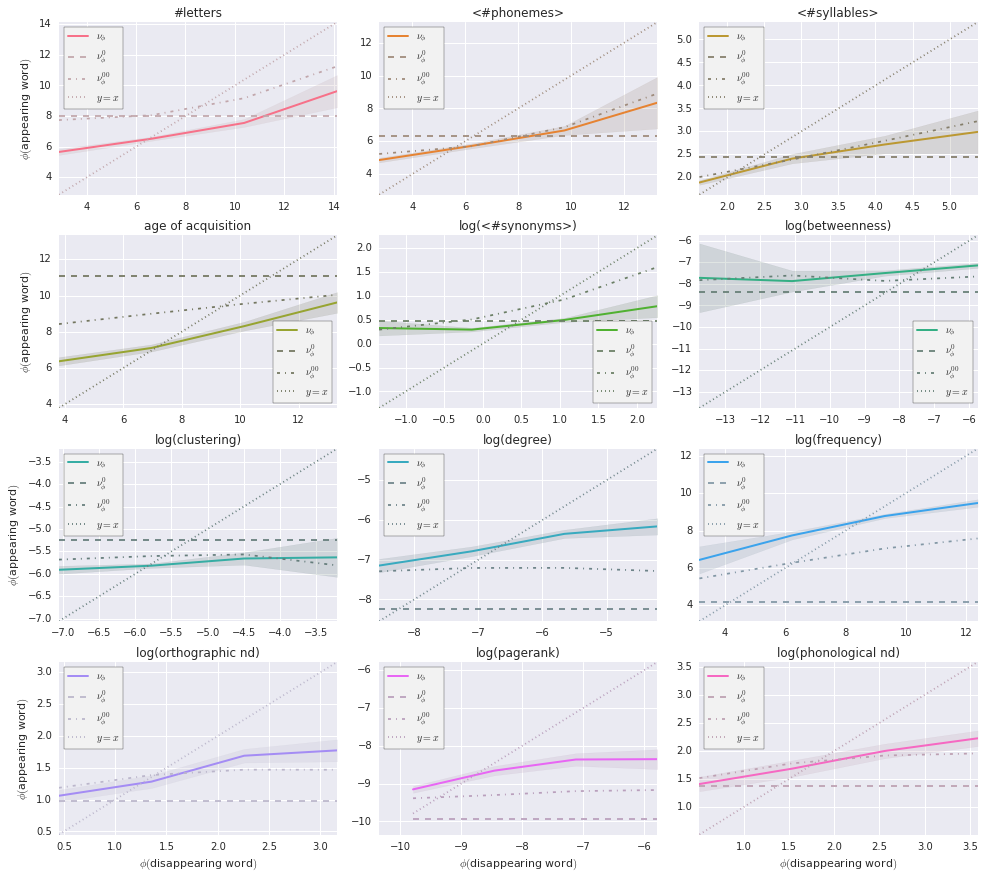

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

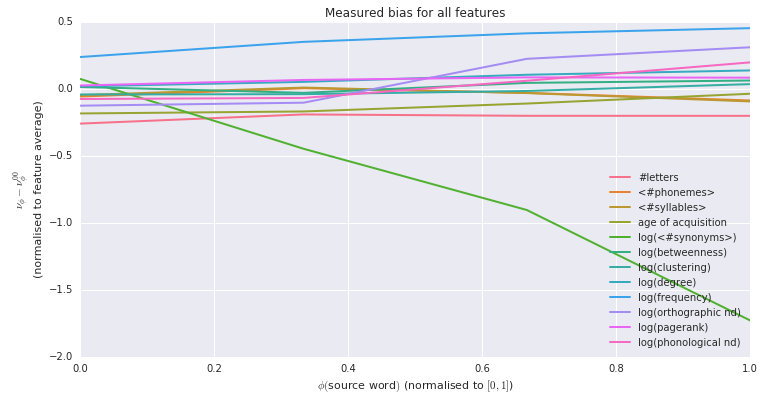

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | **  |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | *   | *** | *** |


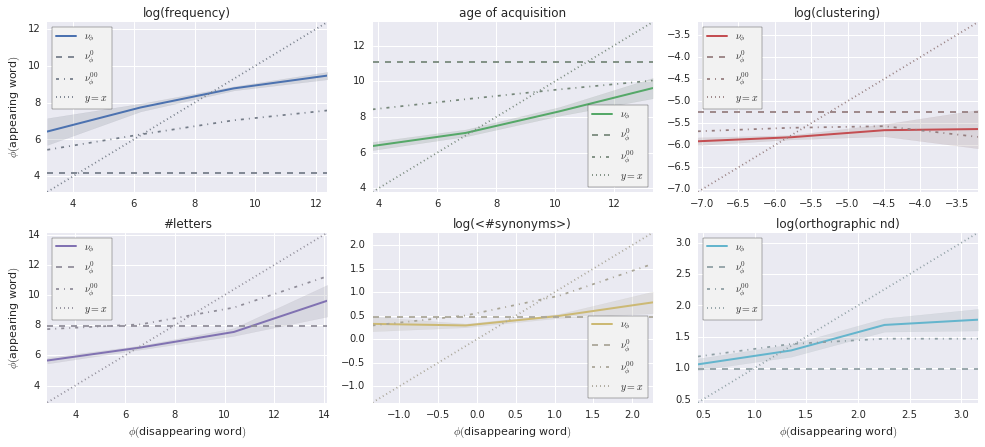

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

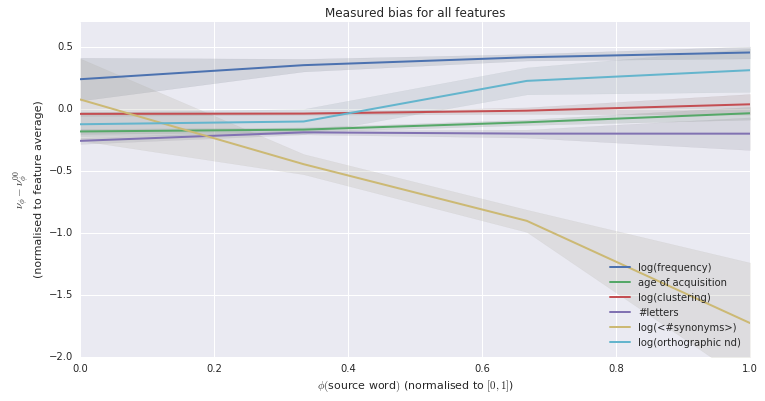

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *   | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


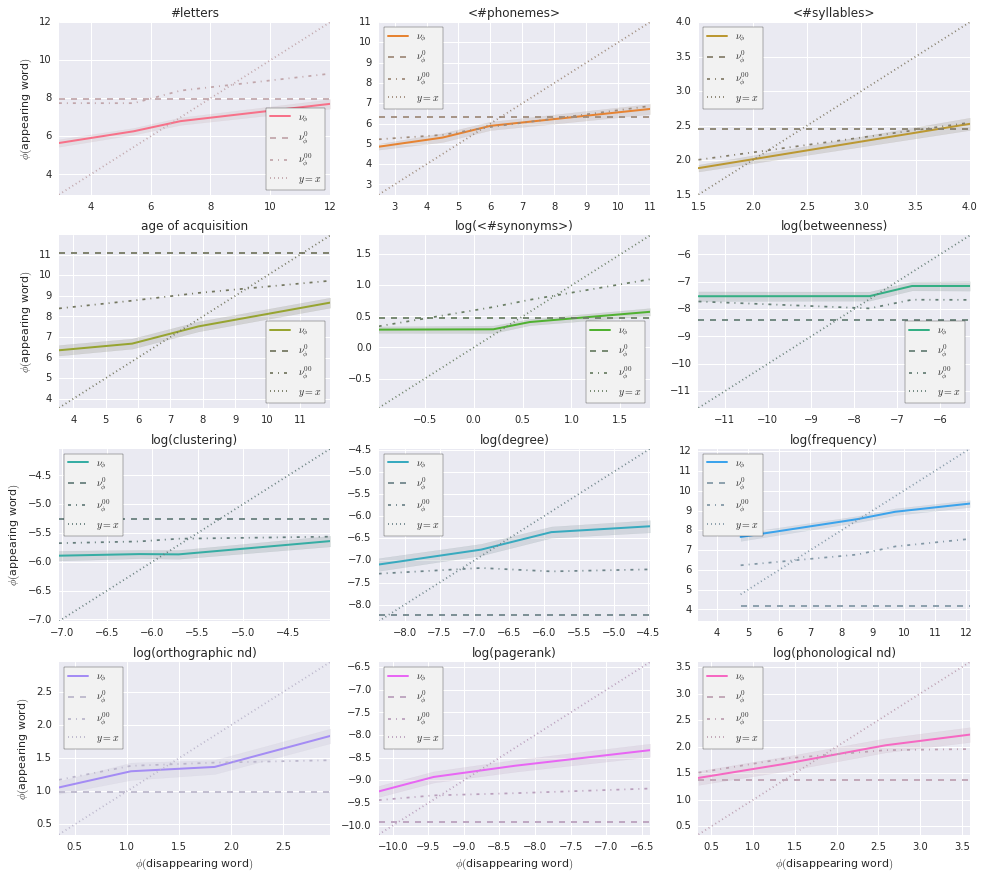

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

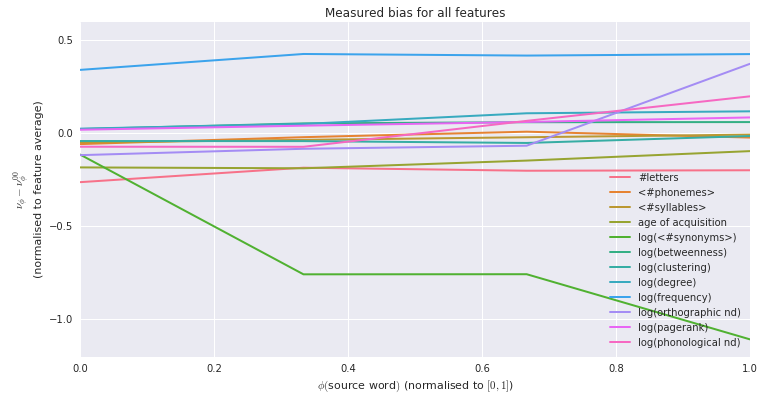

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |


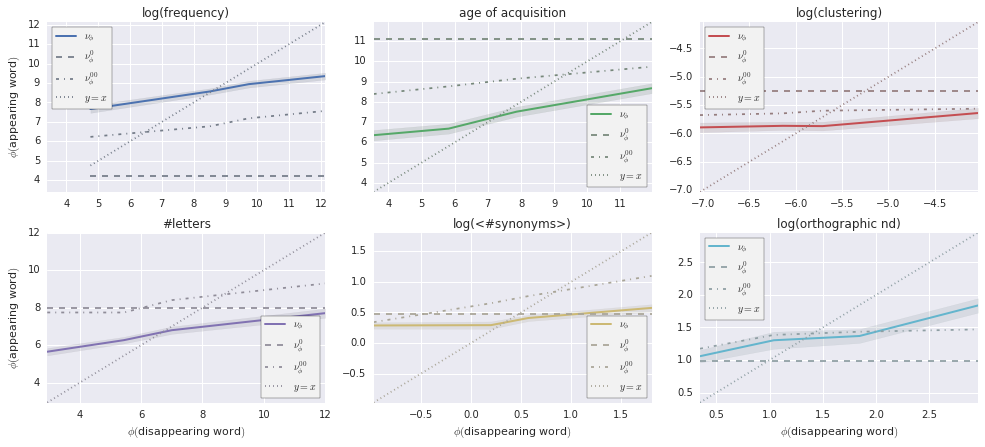

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

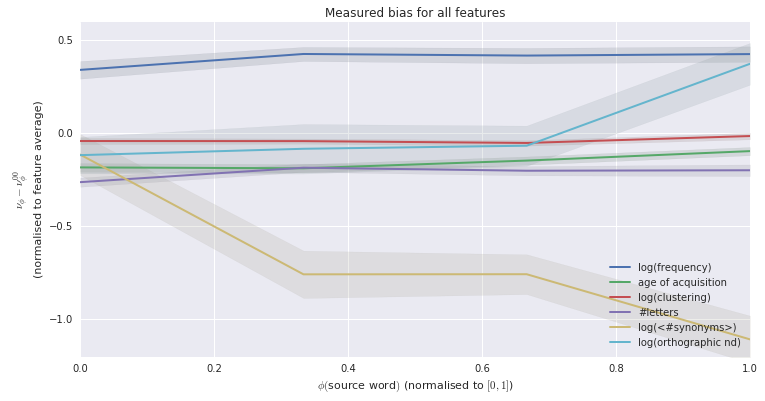

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | *   |
H_00 | ns. | *** | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | ns. | *   |


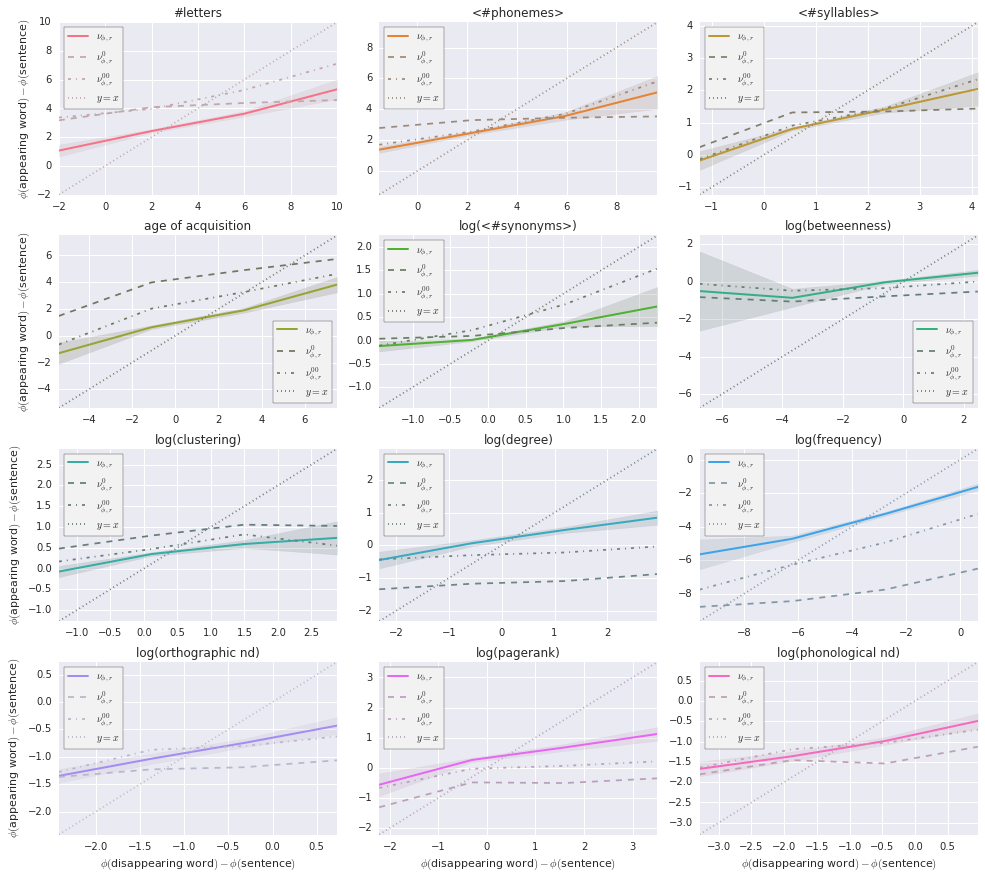

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

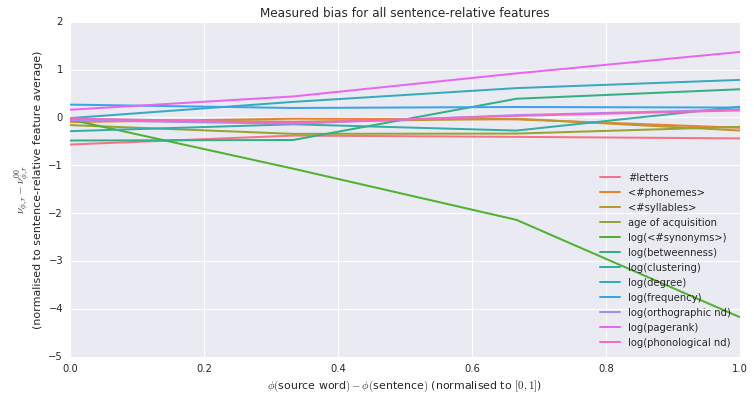

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | ns. | *   |


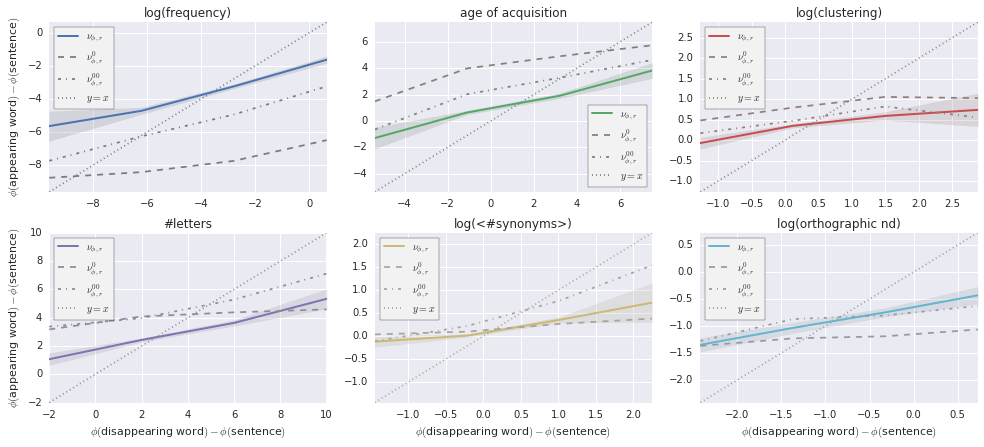

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

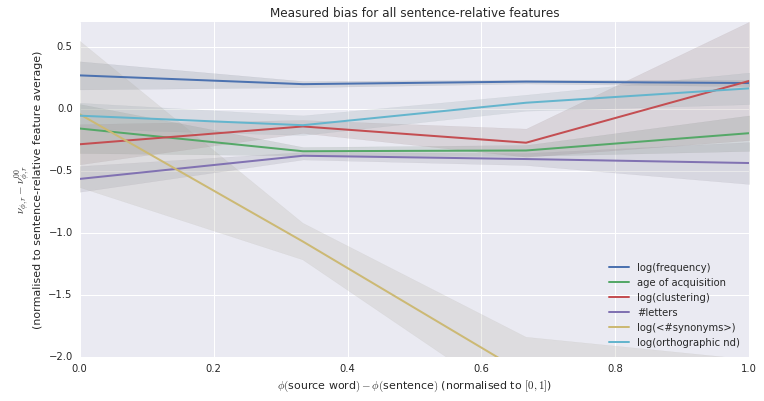

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | *** | *   | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | **  | *   | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | *   | *   |


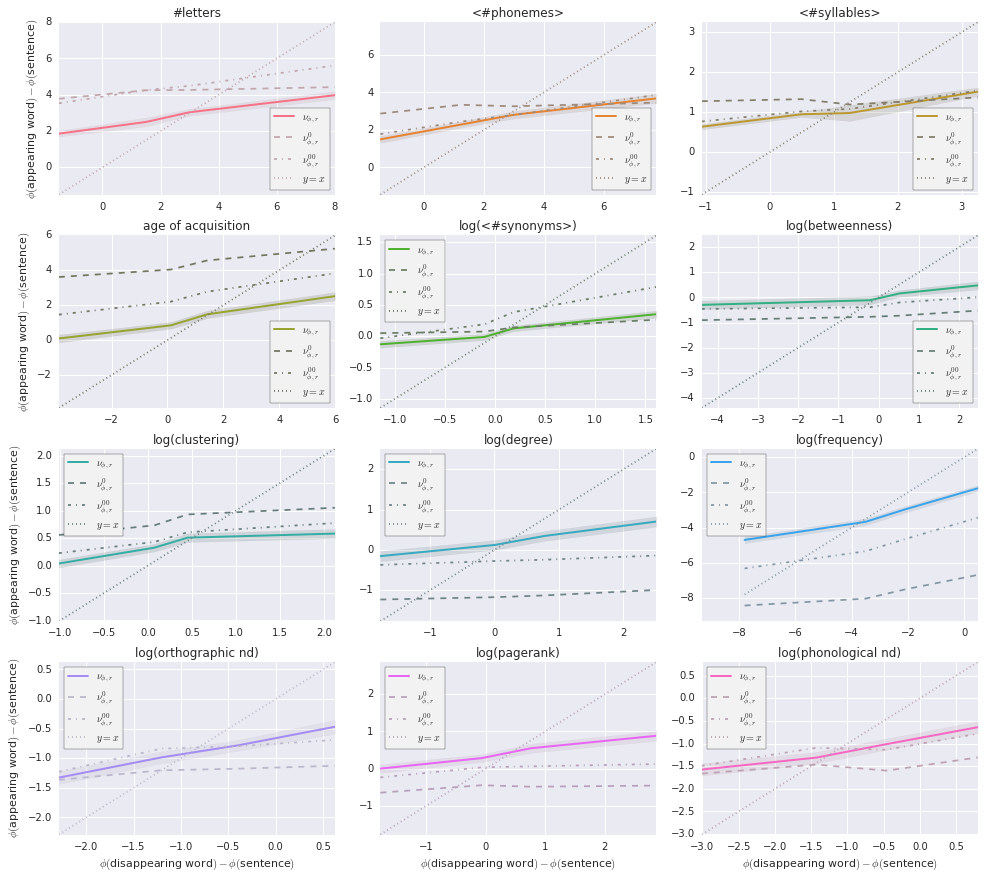

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

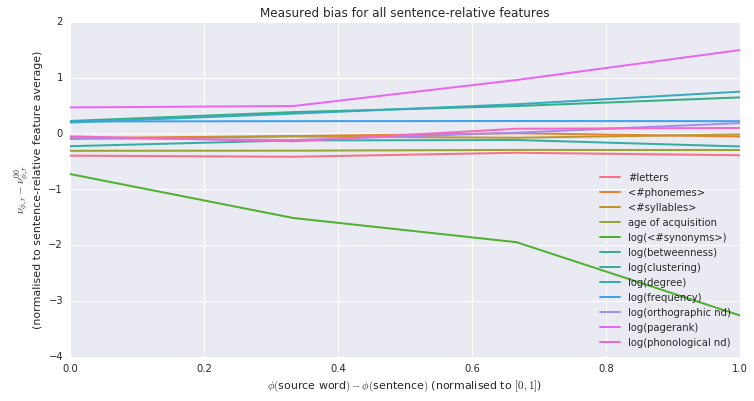

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | *   | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | ns. | *** |


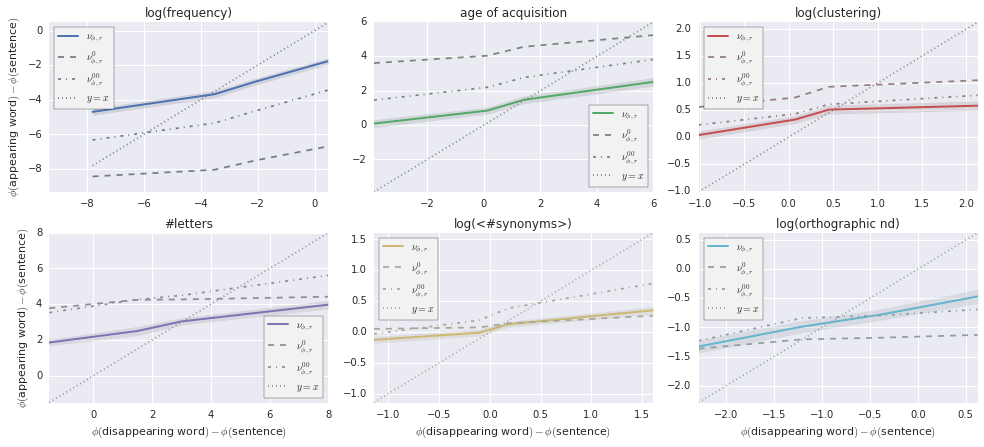

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

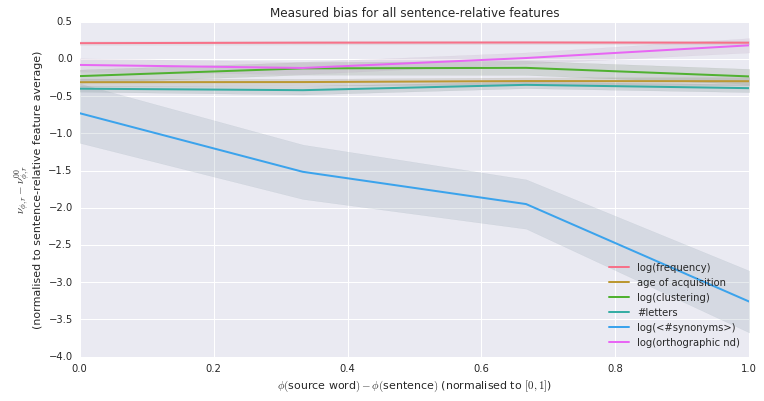

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


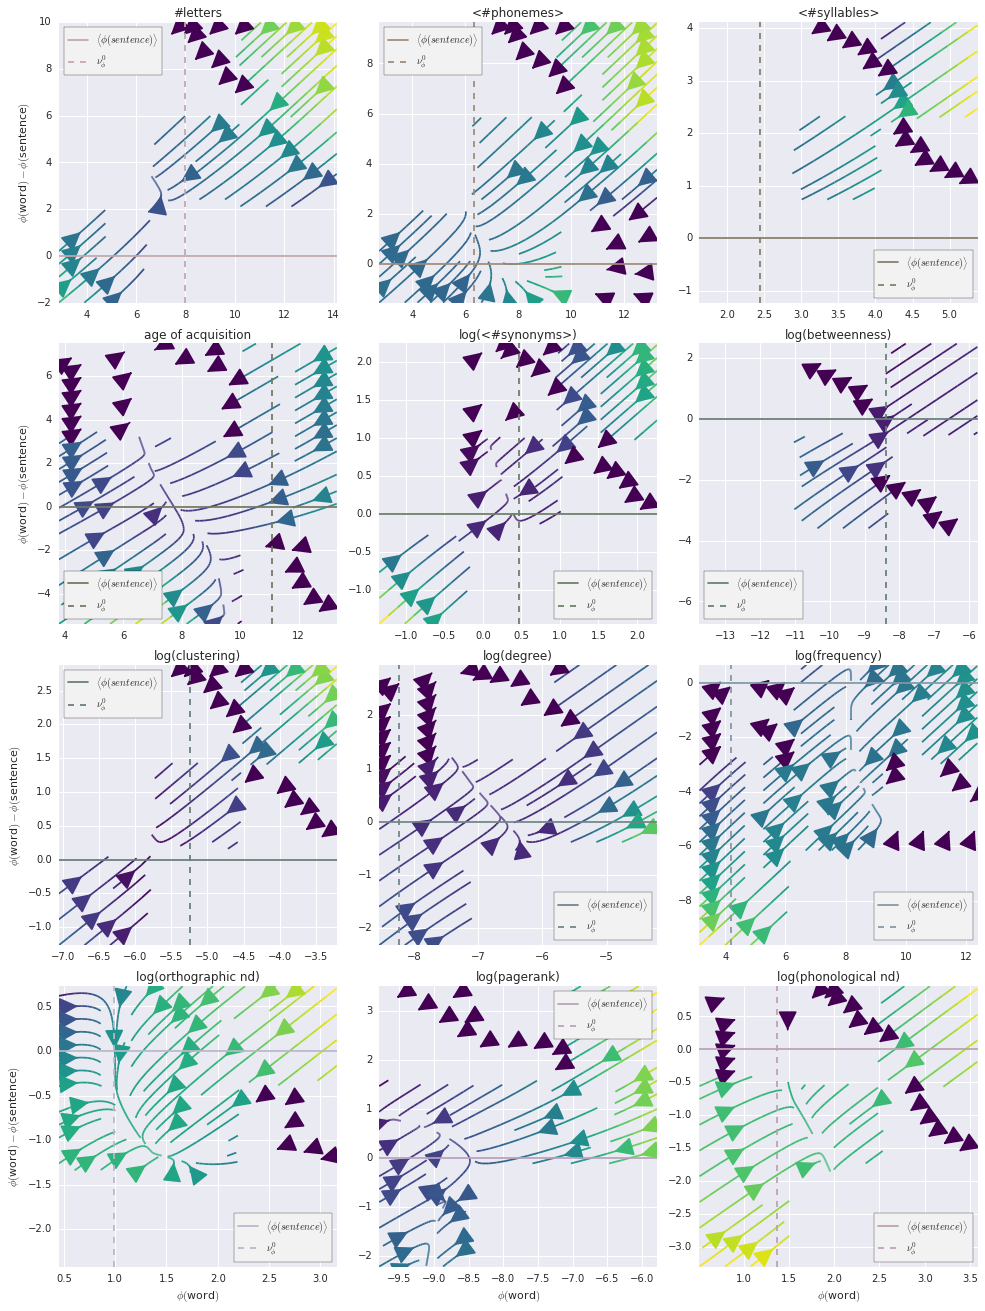

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


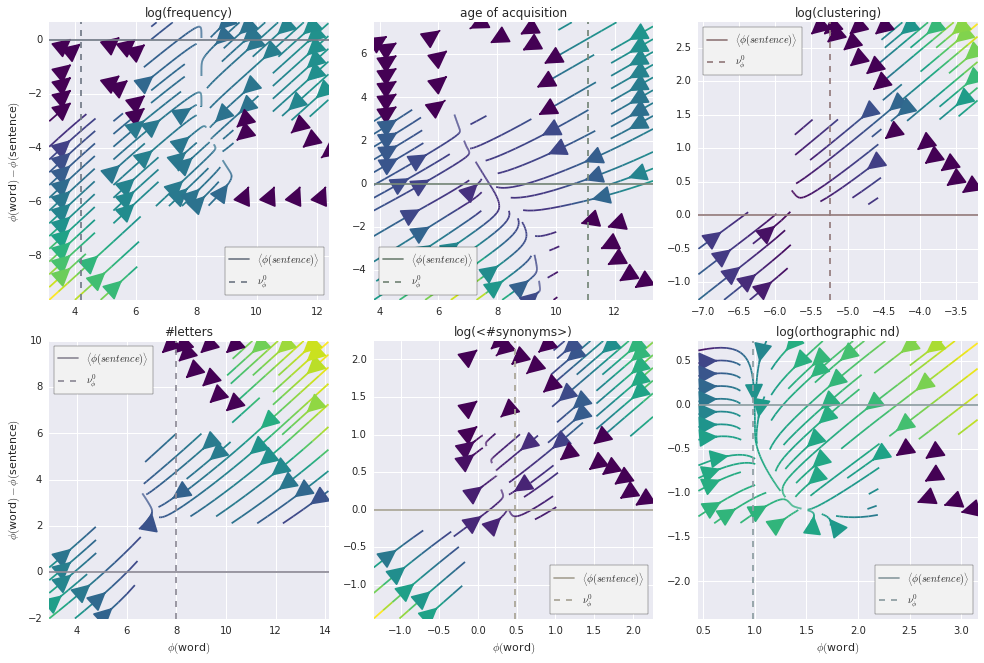

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.5355341   0.17225699  0.07994875  0.07395224  0.03307962  0.03057057
  0.01890364  0.01827549  0.01646021  0.00893067]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.454236     0.274943   -0.085500  0.242540   0.238240   
Component-1 -0.321733     0.387562   -0.140448  0.291426   0.284236   
Component-2 -0.798795    -0.400866    0.160057 -0.141445  -0.347165   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.442913              0.212097  0.282220       -0.415452   
Component-1       0.433281             -0.165669  0.304603        0.420028   
Component-2       0.109200             -0.010967 -0.091953        0.037972   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.276729        -0.158735        0.001017  
Component-1             -0.220967         0.166155       -0.004438  
Component-2             -0.102617         0.007322        0.050591

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 24139) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    8 of 24139) |             | Elapsed Time: 0:00:41 ETA: 1 day, 10:43:57

  0% (   30 of 24139) |                     | Elapsed Time: 0:00:41 ETA: 9:17:56

  0% (   53 of 24139) |                     | Elapsed Time: 0:00:41 ETA: 5:17:05

  0% (   77 of 24139) |                     | Elapsed Time: 0:00:42 ETA: 3:39:07

  0% (  101 of 24139) |                     | Elapsed Time: 0:00:42 ETA: 0:03:44

  0% (  127 of 24139) |                     | Elapsed Time: 0:00:42 ETA: 0:03:29

  0% (  155 of 24139) |                     | Elapsed Time: 0:00:42 ETA: 0:03:18

  0% (  186 of 24139) |                     | Elapsed Time: 0:00:42 ETA: 0:03:07

  0% (  214 of 24139) |                     | Elapsed Time: 0:00:43 ETA: 0:03:00

  0% (  241 of 24139) |                     | Elapsed Time: 0:00:43 ETA: 0:02:59

  1% (  269 of 24139) |                     | Elapsed Time: 0:00:43 ETA: 0:02:52

  1% (  302 of 24139) |                     | Elapsed Time: 0:00:43 ETA: 0:03:04

  1% (  332 of 24139) |                     | Elapsed Time: 0:00:44 ETA: 0:03:06

  1% (  354 of 24139) |                     | Elapsed Time: 0:00:44 ETA: 0:03:11

  1% (  382 of 24139) |                     | Elapsed Time: 0:00:44 ETA: 0:03:16

  1% (  411 of 24139) |                     | Elapsed Time: 0:00:44 ETA: 0:03:05

  1% (  439 of 24139) |                     | Elapsed Time: 0:00:44 ETA: 0:03:03

  1% (  465 of 24139) |                     | Elapsed Time: 0:00:45 ETA: 0:03:01

  2% (  491 of 24139) |                     | Elapsed Time: 0:00:45 ETA: 0:03:00

  2% (  517 of 24139) |                     | Elapsed Time: 0:00:45 ETA: 0:03:03

  2% (  543 of 24139) |                     | Elapsed Time: 0:00:45 ETA: 0:03:13

  2% (  569 of 24139) |                     | Elapsed Time: 0:00:45 ETA: 0:03:12

  2% (  604 of 24139) |                     | Elapsed Time: 0:00:46 ETA: 0:03:14

  2% (  628 of 24139) |                     | Elapsed Time: 0:00:46 ETA: 0:03:15

  2% (  665 of 24139) |                     | Elapsed Time: 0:00:46 ETA: 0:03:16

  2% (  689 of 24139) |                     | Elapsed Time: 0:00:46 ETA: 0:03:17

  2% (  715 of 24139) |                     | Elapsed Time: 0:00:47 ETA: 0:03:16

  3% (  741 of 24139) |                     | Elapsed Time: 0:00:47 ETA: 0:03:13

  3% (  767 of 24139) |                     | Elapsed Time: 0:00:47 ETA: 0:03:10

  3% (  799 of 24139) |                     | Elapsed Time: 0:00:47 ETA: 0:02:59

  3% (  830 of 24139) |                     | Elapsed Time: 0:00:47 ETA: 0:02:50

  3% (  859 of 24139) |                     | Elapsed Time: 0:00:48 ETA: 0:02:45

  3% (  882 of 24139) |                     | Elapsed Time: 0:00:48 ETA: 0:02:49

  3% (  906 of 24139) |                     | Elapsed Time: 0:00:48 ETA: 0:03:04

  3% (  924 of 24139) |                     | Elapsed Time: 0:00:48 ETA: 0:03:31

  3% (  942 of 24139) |                     | Elapsed Time: 0:00:49 ETA: 0:03:55

  3% (  960 of 24139) |                     | Elapsed Time: 0:00:49 ETA: 0:04:23

  4% (  979 of 24139) |                     | Elapsed Time: 0:00:49 ETA: 0:04:22

  4% (  998 of 24139) |                     | Elapsed Time: 0:00:49 ETA: 0:04:21

  4% ( 1017 of 24139) |                     | Elapsed Time: 0:00:49 ETA: 0:04:19

  4% ( 1037 of 24139) |                     | Elapsed Time: 0:00:50 ETA: 0:04:14

  4% ( 1063 of 24139) |                     | Elapsed Time: 0:00:50 ETA: 0:03:53

  4% ( 1091 of 24139) |                     | Elapsed Time: 0:00:50 ETA: 0:03:31

  4% ( 1115 of 24139) |                     | Elapsed Time: 0:00:50 ETA: 0:03:20

  4% ( 1134 of 24139) |                     | Elapsed Time: 0:00:50 ETA: 0:03:21

  4% ( 1154 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:03:28

  4% ( 1175 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:03:40

  4% ( 1196 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:03:57

  5% ( 1220 of 24139) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:00

  5% ( 1244 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:03:50

  5% ( 1267 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:03:44

  5% ( 1289 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:03:41

  5% ( 1312 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:03:26

  5% ( 1340 of 24139) |#                    | Elapsed Time: 0:00:52 ETA: 0:03:19

  5% ( 1369 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:03:06

  5% ( 1397 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:02:59

  5% ( 1425 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:02:49

  6% ( 1455 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:02:42

  6% ( 1484 of 24139) |#                    | Elapsed Time: 0:00:53 ETA: 0:02:44

  6% ( 1524 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:02:39

  6% ( 1554 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:02:36

  6% ( 1578 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:02:44

  6% ( 1604 of 24139) |#                    | Elapsed Time: 0:00:54 ETA: 0:02:47

  6% ( 1635 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:02:46

  6% ( 1665 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:02:45

  6% ( 1687 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:02:52

  7% ( 1701 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:03:07

  7% ( 1721 of 24139) |#                    | Elapsed Time: 0:00:55 ETA: 0:03:23

  7% ( 1741 of 24139) |#                    | Elapsed Time: 0:00:56 ETA: 0:03:54

  7% ( 1761 of 24139) |#                    | Elapsed Time: 0:00:56 ETA: 0:04:11

  7% ( 1782 of 24139) |#                    | Elapsed Time: 0:00:56 ETA: 0:04:02

  7% ( 1811 of 24139) |#                    | Elapsed Time: 0:00:56 ETA: 0:03:52

  7% ( 1838 of 24139) |#                    | Elapsed Time: 0:00:57 ETA: 0:03:33

  7% ( 1868 of 24139) |#                    | Elapsed Time: 0:00:57 ETA: 0:03:13

  7% ( 1897 of 24139) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:58

  7% ( 1921 of 24139) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:55

  8% ( 1941 of 24139) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:57

  8% ( 1964 of 24139) |#                    | Elapsed Time: 0:00:58 ETA: 0:03:10

  8% ( 1986 of 24139) |#                    | Elapsed Time: 0:00:58 ETA: 0:03:22

  8% ( 2007 of 24139) |#                    | Elapsed Time: 0:00:58 ETA: 0:03:40

  8% ( 2038 of 24139) |#                    | Elapsed Time: 0:00:58 ETA: 0:03:12

  8% ( 2069 of 24139) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:54

  8% ( 2099 of 24139) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:47

  8% ( 2126 of 24139) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:38

  8% ( 2150 of 24139) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:45

  9% ( 2176 of 24139) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:52

  9% ( 2203 of 24139) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:59

  9% ( 2237 of 24139) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:49

  9% ( 2267 of 24139) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:39

  9% ( 2297 of 24139) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:31

  9% ( 2323 of 24139) |##                   | Elapsed Time: 0:01:00 ETA: 0:02:31

  9% ( 2348 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:38

  9% ( 2377 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:41

 10% ( 2414 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:48

 10% ( 2442 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:47

 10% ( 2468 of 24139) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:46

 10% ( 2492 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:02:54

 10% ( 2509 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:03:10

 10% ( 2526 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:03:29

 10% ( 2544 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:03:56

 10% ( 2560 of 24139) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:15

 10% ( 2578 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:29

 10% ( 2594 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:29

 10% ( 2612 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:29

 10% ( 2636 of 24139) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:04

 11% ( 2657 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:03:53

 11% ( 2684 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:03:28

 11% ( 2716 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:03:25

 11% ( 2743 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:03:03

 11% ( 2770 of 24139) |##                   | Elapsed Time: 0:01:04 ETA: 0:03:02

 11% ( 2792 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:03:03

 11% ( 2819 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:02:55

 11% ( 2840 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:03:03

 11% ( 2866 of 24139) |##                   | Elapsed Time: 0:01:05 ETA: 0:03:05

 11% ( 2891 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:02:58

 12% ( 2919 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:02:56

 12% ( 2947 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:02:47

 12% ( 2975 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:02:41

 12% ( 3000 of 24139) |##                   | Elapsed Time: 0:01:06 ETA: 0:02:45

 12% ( 3034 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:02:42

 12% ( 3063 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:02:40

 12% ( 3088 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:02:43

 12% ( 3116 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:02:43

 13% ( 3142 of 24139) |##                   | Elapsed Time: 0:01:07 ETA: 0:02:37

 13% ( 3169 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:02:42

 13% ( 3196 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:02:41

 13% ( 3224 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:02:41

 13% ( 3253 of 24139) |##                   | Elapsed Time: 0:01:08 ETA: 0:02:38

 13% ( 3278 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:02:42

 13% ( 3300 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:02:48

 13% ( 3320 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:03:02

 13% ( 3348 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:03:07

 13% ( 3373 of 24139) |##                   | Elapsed Time: 0:01:09 ETA: 0:03:00

 14% ( 3393 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:16

 14% ( 3420 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:01

 14% ( 3447 of 24139) |##                   | Elapsed Time: 0:01:10 ETA: 0:02:59

 14% ( 3472 of 24139) |###                  | Elapsed Time: 0:01:10 ETA: 0:02:49

 14% ( 3494 of 24139) |###                  | Elapsed Time: 0:01:10 ETA: 0:02:52

 14% ( 3517 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:02:55

 14% ( 3529 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:03:24

 14% ( 3553 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:03:31

 14% ( 3582 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:03:16

 14% ( 3606 of 24139) |###                  | Elapsed Time: 0:01:11 ETA: 0:03:24

 15% ( 3636 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:02:55

 15% ( 3668 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:02:34

 15% ( 3695 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:02:33

 15% ( 3722 of 24139) |###                  | Elapsed Time: 0:01:12 ETA: 0:02:31

 15% ( 3749 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:28

 15% ( 3777 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:30

 15% ( 3801 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:37

 15% ( 3821 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:49

 15% ( 3844 of 24139) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:57

 16% ( 3870 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:03:01

 16% ( 3892 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:03:11

 16% ( 3923 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:02:58

 16% ( 3957 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:02:35

 16% ( 3983 of 24139) |###                  | Elapsed Time: 0:01:14 ETA: 0:02:33

 16% ( 4007 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:31

 16% ( 4030 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:35

 16% ( 4061 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:35

 16% ( 4085 of 24139) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:45

 17% ( 4113 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:39

 17% ( 4131 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:42

 17% ( 4147 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:03:05

 17% ( 4163 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:03:30

 17% ( 4179 of 24139) |###                  | Elapsed Time: 0:01:16 ETA: 0:03:57

 17% ( 4195 of 24139) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:22

 17% ( 4214 of 24139) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:13

 17% ( 4237 of 24139) |###                  | Elapsed Time: 0:01:17 ETA: 0:03:53

 17% ( 4264 of 24139) |###                  | Elapsed Time: 0:01:17 ETA: 0:03:26

 17% ( 4292 of 24139) |###                  | Elapsed Time: 0:01:17 ETA: 0:03:04

 17% ( 4321 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:45

 18% ( 4351 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:31

 18% ( 4382 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:20

 18% ( 4414 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:16

 18% ( 4444 of 24139) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:13

 18% ( 4462 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:25

 18% ( 4487 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:30

 18% ( 4514 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:37

 18% ( 4539 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:50

 18% ( 4561 of 24139) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:55

 18% ( 4586 of 24139) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:43

 19% ( 4612 of 24139) |####                 | Elapsed Time: 0:01:20 ETA: 0:02:46

 19% ( 4636 of 24139) |####                 | Elapsed Time: 0:01:20 ETA: 0:02:49

 19% ( 4654 of 24139) |####                 | Elapsed Time: 0:01:20 ETA: 0:03:00

 19% ( 4682 of 24139) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:50

 19% ( 4710 of 24139) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:47

 19% ( 4733 of 24139) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:51

 19% ( 4756 of 24139) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:38

 19% ( 4786 of 24139) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:32

 19% ( 4816 of 24139) |####                 | Elapsed Time: 0:01:22 ETA: 0:02:28

 20% ( 4839 of 24139) |####                 | Elapsed Time: 0:01:22 ETA: 0:02:38

 20% ( 4869 of 24139) |####                 | Elapsed Time: 0:01:22 ETA: 0:02:28

 20% ( 4898 of 24139) |####                 | Elapsed Time: 0:01:22 ETA: 0:02:25

 20% ( 4919 of 24139) |####                 | Elapsed Time: 0:01:22 ETA: 0:02:40

 20% ( 4950 of 24139) |####                 | Elapsed Time: 0:01:23 ETA: 0:02:29

 20% ( 4974 of 24139) |####                 | Elapsed Time: 0:01:23 ETA: 0:02:32

 20% ( 4988 of 24139) |####                 | Elapsed Time: 0:01:23 ETA: 0:02:59

 20% ( 5001 of 24139) |####                 | Elapsed Time: 0:01:23 ETA: 0:03:13

 20% ( 5014 of 24139) |####                 | Elapsed Time: 0:01:24 ETA: 0:03:52

 20% ( 5036 of 24139) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:19

 20% ( 5063 of 24139) |####                 | Elapsed Time: 0:01:24 ETA: 0:03:44

 21% ( 5094 of 24139) |####                 | Elapsed Time: 0:01:24 ETA: 0:03:01

 21% ( 5130 of 24139) |####                 | Elapsed Time: 0:01:24 ETA: 0:02:40

 21% ( 5155 of 24139) |####                 | Elapsed Time: 0:01:25 ETA: 0:02:30

 21% ( 5180 of 24139) |####                 | Elapsed Time: 0:01:25 ETA: 0:02:24

 21% ( 5197 of 24139) |####                 | Elapsed Time: 0:01:25 ETA: 0:02:47

 21% ( 5223 of 24139) |####                 | Elapsed Time: 0:01:25 ETA: 0:02:48

 21% ( 5254 of 24139) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:39

 21% ( 5281 of 24139) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:37

 21% ( 5309 of 24139) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:27

 22% ( 5337 of 24139) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:16

 22% ( 5364 of 24139) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:20

 22% ( 5390 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:23

 22% ( 5417 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:24

 22% ( 5444 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:31

 22% ( 5467 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:37

 22% ( 5496 of 24139) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:29

 22% ( 5520 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:36

 22% ( 5547 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:30

 23% ( 5574 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:24

 23% ( 5605 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:19

 23% ( 5627 of 24139) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:25

 23% ( 5647 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:31

 23% ( 5670 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:37

 23% ( 5698 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:39

 23% ( 5734 of 24139) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:35

 23% ( 5759 of 24139) |#####                | Elapsed Time: 0:01:30 ETA: 0:02:28

 23% ( 5785 of 24139) |#####                | Elapsed Time: 0:01:30 ETA: 0:02:21

 24% ( 5814 of 24139) |#####                | Elapsed Time: 0:01:30 ETA: 0:02:15

 24% ( 5846 of 24139) |#####                | Elapsed Time: 0:01:30 ETA: 0:02:15

 24% ( 5865 of 24139) |#####                | Elapsed Time: 0:01:30 ETA: 0:02:22

 24% ( 5889 of 24139) |#####                | Elapsed Time: 0:01:31 ETA: 0:02:24

 24% ( 5913 of 24139) |#####                | Elapsed Time: 0:01:31 ETA: 0:02:29

 24% ( 5939 of 24139) |#####                | Elapsed Time: 0:01:31 ETA: 0:02:33

 24% ( 5966 of 24139) |#####                | Elapsed Time: 0:01:31 ETA: 0:02:34

 24% ( 5995 of 24139) |#####                | Elapsed Time: 0:01:31 ETA: 0:02:23

 24% ( 6020 of 24139) |#####                | Elapsed Time: 0:01:32 ETA: 0:02:21

 25% ( 6046 of 24139) |#####                | Elapsed Time: 0:01:32 ETA: 0:02:27

 25% ( 6069 of 24139) |#####                | Elapsed Time: 0:01:32 ETA: 0:02:32

 25% ( 6095 of 24139) |#####                | Elapsed Time: 0:01:32 ETA: 0:02:35

 25% ( 6113 of 24139) |#####                | Elapsed Time: 0:01:33 ETA: 0:02:52

 25% ( 6125 of 24139) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:14

 25% ( 6142 of 24139) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:32

 25% ( 6160 of 24139) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:45

 25% ( 6182 of 24139) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:46

 25% ( 6208 of 24139) |#####                | Elapsed Time: 0:01:34 ETA: 0:03:16

 25% ( 6234 of 24139) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:45

 25% ( 6265 of 24139) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:29

 26% ( 6293 of 24139) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:17

 26% ( 6319 of 24139) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:14

 26% ( 6349 of 24139) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:11

 26% ( 6373 of 24139) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:18

 26% ( 6392 of 24139) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:28

 26% ( 6409 of 24139) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:43

 26% ( 6434 of 24139) |#####                | Elapsed Time: 0:01:36 ETA: 0:02:51

 26% ( 6460 of 24139) |#####                | Elapsed Time: 0:01:36 ETA: 0:02:49

 26% ( 6480 of 24139) |#####                | Elapsed Time: 0:01:36 ETA: 0:02:57

 26% ( 6504 of 24139) |#####                | Elapsed Time: 0:01:36 ETA: 0:02:37

 27% ( 6534 of 24139) |#####                | Elapsed Time: 0:01:36 ETA: 0:02:27

 27% ( 6564 of 24139) |#####                | Elapsed Time: 0:01:37 ETA: 0:02:19

 27% ( 6594 of 24139) |#####                | Elapsed Time: 0:01:37 ETA: 0:02:12

 27% ( 6610 of 24139) |#####                | Elapsed Time: 0:01:37 ETA: 0:02:17

 27% ( 6622 of 24139) |#####                | Elapsed Time: 0:01:37 ETA: 0:02:39

 27% ( 6639 of 24139) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:11

 27% ( 6651 of 24139) |#####                | Elapsed Time: 0:01:38 ETA: 0:04:03

 27% ( 6665 of 24139) |#####                | Elapsed Time: 0:01:38 ETA: 0:04:50

 27% ( 6681 of 24139) |#####                | Elapsed Time: 0:01:38 ETA: 0:04:34

 27% ( 6708 of 24139) |#####                | Elapsed Time: 0:01:38 ETA: 0:03:44

 27% ( 6732 of 24139) |#####                | Elapsed Time: 0:01:39 ETA: 0:03:10

 27% ( 6756 of 24139) |#####                | Elapsed Time: 0:01:39 ETA: 0:02:48

 28% ( 6782 of 24139) |#####                | Elapsed Time: 0:01:39 ETA: 0:02:32

 28% ( 6804 of 24139) |#####                | Elapsed Time: 0:01:39 ETA: 0:02:30

 28% ( 6826 of 24139) |#####                | Elapsed Time: 0:01:39 ETA: 0:02:34

 28% ( 6849 of 24139) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:34

 28% ( 6871 of 24139) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:35

 28% ( 6897 of 24139) |######               | Elapsed Time: 0:01:40 ETA: 0:02:34

 28% ( 6925 of 24139) |######               | Elapsed Time: 0:01:40 ETA: 0:02:26

 28% ( 6956 of 24139) |######               | Elapsed Time: 0:01:40 ETA: 0:02:15

 28% ( 6985 of 24139) |######               | Elapsed Time: 0:01:41 ETA: 0:02:08

 29% ( 7010 of 24139) |######               | Elapsed Time: 0:01:41 ETA: 0:02:06

 29% ( 7035 of 24139) |######               | Elapsed Time: 0:01:41 ETA: 0:02:08

 29% ( 7055 of 24139) |######               | Elapsed Time: 0:01:41 ETA: 0:02:18

 29% ( 7080 of 24139) |######               | Elapsed Time: 0:01:41 ETA: 0:02:27

 29% ( 7109 of 24139) |######               | Elapsed Time: 0:01:42 ETA: 0:02:21

 29% ( 7139 of 24139) |######               | Elapsed Time: 0:01:42 ETA: 0:02:14

 29% ( 7168 of 24139) |######               | Elapsed Time: 0:01:42 ETA: 0:02:10

 29% ( 7190 of 24139) |######               | Elapsed Time: 0:01:42 ETA: 0:02:06

 29% ( 7217 of 24139) |######               | Elapsed Time: 0:01:43 ETA: 0:02:12

 30% ( 7242 of 24139) |######               | Elapsed Time: 0:01:43 ETA: 0:02:19

 30% ( 7268 of 24139) |######               | Elapsed Time: 0:01:43 ETA: 0:02:24

 30% ( 7298 of 24139) |######               | Elapsed Time: 0:01:43 ETA: 0:02:14

 30% ( 7313 of 24139) |######               | Elapsed Time: 0:01:43 ETA: 0:02:28

 30% ( 7326 of 24139) |######               | Elapsed Time: 0:01:44 ETA: 0:02:45

 30% ( 7352 of 24139) |######               | Elapsed Time: 0:01:44 ETA: 0:02:40

 30% ( 7378 of 24139) |######               | Elapsed Time: 0:01:44 ETA: 0:02:45

 30% ( 7398 of 24139) |######               | Elapsed Time: 0:01:44 ETA: 0:02:52

 30% ( 7421 of 24139) |######               | Elapsed Time: 0:01:44 ETA: 0:02:37

 30% ( 7449 of 24139) |######               | Elapsed Time: 0:01:45 ETA: 0:02:24

 30% ( 7473 of 24139) |######               | Elapsed Time: 0:01:45 ETA: 0:02:33

 31% ( 7491 of 24139) |######               | Elapsed Time: 0:01:45 ETA: 0:02:35

 31% ( 7512 of 24139) |######               | Elapsed Time: 0:01:45 ETA: 0:02:32

 31% ( 7532 of 24139) |######               | Elapsed Time: 0:01:45 ETA: 0:02:40

 31% ( 7553 of 24139) |######               | Elapsed Time: 0:01:46 ETA: 0:02:59

 31% ( 7577 of 24139) |######               | Elapsed Time: 0:01:46 ETA: 0:02:50

 31% ( 7606 of 24139) |######               | Elapsed Time: 0:01:46 ETA: 0:02:33

 31% ( 7636 of 24139) |######               | Elapsed Time: 0:01:46 ETA: 0:02:22

 31% ( 7660 of 24139) |######               | Elapsed Time: 0:01:47 ETA: 0:02:14

 31% ( 7687 of 24139) |######               | Elapsed Time: 0:01:47 ETA: 0:02:09

 31% ( 7716 of 24139) |######               | Elapsed Time: 0:01:47 ETA: 0:02:04

 32% ( 7746 of 24139) |######               | Elapsed Time: 0:01:47 ETA: 0:02:01

 32% ( 7771 of 24139) |######               | Elapsed Time: 0:01:47 ETA: 0:02:03

 32% ( 7804 of 24139) |######               | Elapsed Time: 0:01:48 ETA: 0:01:58

 32% ( 7824 of 24139) |######               | Elapsed Time: 0:01:48 ETA: 0:02:06

 32% ( 7861 of 24139) |######               | Elapsed Time: 0:01:48 ETA: 0:02:07

 32% ( 7892 of 24139) |######               | Elapsed Time: 0:01:48 ETA: 0:02:04

 32% ( 7913 of 24139) |######               | Elapsed Time: 0:01:49 ETA: 0:02:10

 32% ( 7937 of 24139) |######               | Elapsed Time: 0:01:49 ETA: 0:02:19

 32% ( 7952 of 24139) |######               | Elapsed Time: 0:01:49 ETA: 0:02:23

 32% ( 7965 of 24139) |######               | Elapsed Time: 0:01:49 ETA: 0:02:58

 33% ( 7993 of 24139) |######               | Elapsed Time: 0:01:49 ETA: 0:02:52

 33% ( 8019 of 24139) |######               | Elapsed Time: 0:01:50 ETA: 0:02:46

 33% ( 8046 of 24139) |######               | Elapsed Time: 0:01:50 ETA: 0:02:28

 33% ( 8072 of 24139) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:12

 33% ( 8093 of 24139) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:12

 33% ( 8114 of 24139) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:17

 33% ( 8147 of 24139) |#######              | Elapsed Time: 0:01:51 ETA: 0:02:21

 33% ( 8176 of 24139) |#######              | Elapsed Time: 0:01:51 ETA: 0:02:16

 33% ( 8202 of 24139) |#######              | Elapsed Time: 0:01:51 ETA: 0:02:15

 34% ( 8220 of 24139) |#######              | Elapsed Time: 0:01:51 ETA: 0:02:14

 34% ( 8238 of 24139) |#######              | Elapsed Time: 0:01:52 ETA: 0:02:22

 34% ( 8267 of 24139) |#######              | Elapsed Time: 0:01:52 ETA: 0:02:23

 34% ( 8289 of 24139) |#######              | Elapsed Time: 0:01:52 ETA: 0:02:30

 34% ( 8313 of 24139) |#######              | Elapsed Time: 0:01:52 ETA: 0:02:28

 34% ( 8338 of 24139) |#######              | Elapsed Time: 0:01:52 ETA: 0:02:17

 34% ( 8367 of 24139) |#######              | Elapsed Time: 0:01:53 ETA: 0:02:09

 34% ( 8393 of 24139) |#######              | Elapsed Time: 0:01:53 ETA: 0:02:11

 34% ( 8415 of 24139) |#######              | Elapsed Time: 0:01:53 ETA: 0:02:09

 34% ( 8435 of 24139) |#######              | Elapsed Time: 0:01:53 ETA: 0:02:10

 35% ( 8465 of 24139) |#######              | Elapsed Time: 0:01:53 ETA: 0:02:11

 35% ( 8489 of 24139) |#######              | Elapsed Time: 0:01:54 ETA: 0:02:14

 35% ( 8510 of 24139) |#######              | Elapsed Time: 0:01:54 ETA: 0:02:18

 35% ( 8531 of 24139) |#######              | Elapsed Time: 0:01:54 ETA: 0:02:20

 35% ( 8559 of 24139) |#######              | Elapsed Time: 0:01:54 ETA: 0:02:11

 35% ( 8582 of 24139) |#######              | Elapsed Time: 0:01:54 ETA: 0:02:20

 35% ( 8612 of 24139) |#######              | Elapsed Time: 0:01:55 ETA: 0:02:09

 35% ( 8641 of 24139) |#######              | Elapsed Time: 0:01:55 ETA: 0:02:01

 35% ( 8659 of 24139) |#######              | Elapsed Time: 0:01:55 ETA: 0:02:08

 35% ( 8685 of 24139) |#######              | Elapsed Time: 0:01:55 ETA: 0:02:06

 36% ( 8701 of 24139) |#######              | Elapsed Time: 0:01:56 ETA: 0:02:21

 36% ( 8713 of 24139) |#######              | Elapsed Time: 0:01:56 ETA: 0:02:50

 36% ( 8725 of 24139) |#######              | Elapsed Time: 0:01:56 ETA: 0:03:27

 36% ( 8751 of 24139) |#######              | Elapsed Time: 0:01:56 ETA: 0:03:02

 36% ( 8776 of 24139) |#######              | Elapsed Time: 0:01:56 ETA: 0:03:05

 36% ( 8803 of 24139) |#######              | Elapsed Time: 0:01:57 ETA: 0:02:33

 36% ( 8835 of 24139) |#######              | Elapsed Time: 0:01:57 ETA: 0:02:05

 36% ( 8864 of 24139) |#######              | Elapsed Time: 0:01:57 ETA: 0:01:52

 36% ( 8888 of 24139) |#######              | Elapsed Time: 0:01:57 ETA: 0:01:55

 36% ( 8916 of 24139) |#######              | Elapsed Time: 0:01:57 ETA: 0:01:53

 37% ( 8945 of 24139) |#######              | Elapsed Time: 0:01:58 ETA: 0:01:53

 37% ( 8971 of 24139) |#######              | Elapsed Time: 0:01:58 ETA: 0:01:58

 37% ( 8998 of 24139) |#######              | Elapsed Time: 0:01:58 ETA: 0:01:54

 37% ( 9023 of 24139) |#######              | Elapsed Time: 0:01:58 ETA: 0:01:55

 37% ( 9053 of 24139) |#######              | Elapsed Time: 0:01:59 ETA: 0:02:00

 37% ( 9070 of 24139) |#######              | Elapsed Time: 0:02:02 ETA: 0:09:31

 37% ( 9095 of 24139) |#######              | Elapsed Time: 0:02:02 ETA: 0:09:36

 37% ( 9123 of 24139) |#######              | Elapsed Time: 0:02:02 ETA: 0:09:24

 37% ( 9147 of 24139) |#######              | Elapsed Time: 0:02:03 ETA: 0:09:23

 38% ( 9177 of 24139) |#######              | Elapsed Time: 0:02:03 ETA: 0:01:58

 38% ( 9205 of 24139) |########             | Elapsed Time: 0:02:03 ETA: 0:01:54

 38% ( 9233 of 24139) |########             | Elapsed Time: 0:02:03 ETA: 0:01:53

 38% ( 9251 of 24139) |########             | Elapsed Time: 0:02:03 ETA: 0:02:02

 38% ( 9278 of 24139) |########             | Elapsed Time: 0:02:04 ETA: 0:02:00

 38% ( 9305 of 24139) |########             | Elapsed Time: 0:02:04 ETA: 0:02:01

 38% ( 9327 of 24139) |########             | Elapsed Time: 0:02:04 ETA: 0:02:08

 38% ( 9354 of 24139) |########             | Elapsed Time: 0:02:04 ETA: 0:02:03

 38% ( 9378 of 24139) |########             | Elapsed Time: 0:02:04 ETA: 0:01:59

 38% ( 9402 of 24139) |########             | Elapsed Time: 0:02:05 ETA: 0:02:04

 39% ( 9416 of 24139) |########             | Elapsed Time: 0:02:05 ETA: 0:02:20

 39% ( 9447 of 24139) |########             | Elapsed Time: 0:02:05 ETA: 0:02:08

 39% ( 9474 of 24139) |########             | Elapsed Time: 0:02:05 ETA: 0:02:09

 39% ( 9498 of 24139) |########             | Elapsed Time: 0:02:05 ETA: 0:02:05

 39% ( 9519 of 24139) |########             | Elapsed Time: 0:02:06 ETA: 0:02:03

 39% ( 9542 of 24139) |########             | Elapsed Time: 0:02:06 ETA: 0:02:00

 39% ( 9568 of 24139) |########             | Elapsed Time: 0:02:06 ETA: 0:02:05

 39% ( 9597 of 24139) |########             | Elapsed Time: 0:02:06 ETA: 0:02:01

 39% ( 9621 of 24139) |########             | Elapsed Time: 0:02:07 ETA: 0:02:02

 39% ( 9643 of 24139) |########             | Elapsed Time: 0:02:07 ETA: 0:02:00

 40% ( 9666 of 24139) |########             | Elapsed Time: 0:02:07 ETA: 0:02:04

 40% ( 9689 of 24139) |########             | Elapsed Time: 0:02:07 ETA: 0:02:10

 40% ( 9713 of 24139) |########             | Elapsed Time: 0:02:07 ETA: 0:02:16

 40% ( 9733 of 24139) |########             | Elapsed Time: 0:02:08 ETA: 0:02:16

 40% ( 9753 of 24139) |########             | Elapsed Time: 0:02:08 ETA: 0:02:20

 40% ( 9778 of 24139) |########             | Elapsed Time: 0:02:08 ETA: 0:02:15

 40% ( 9798 of 24139) |########             | Elapsed Time: 0:02:08 ETA: 0:02:19

 40% ( 9815 of 24139) |########             | Elapsed Time: 0:02:08 ETA: 0:02:26

 40% ( 9838 of 24139) |########             | Elapsed Time: 0:02:09 ETA: 0:02:22

 40% ( 9865 of 24139) |########             | Elapsed Time: 0:02:09 ETA: 0:02:13

 40% ( 9885 of 24139) |########             | Elapsed Time: 0:02:09 ETA: 0:02:21

 41% ( 9917 of 24139) |########             | Elapsed Time: 0:02:09 ETA: 0:01:59

 41% ( 9958 of 24139) |########             | Elapsed Time: 0:02:10 ETA: 0:01:45

 41% ( 9976 of 24139) |########             | Elapsed Time: 0:02:10 ETA: 0:01:47

 41% (10002 of 24139) |########             | Elapsed Time: 0:02:10 ETA: 0:01:49

 41% (10029 of 24139) |########             | Elapsed Time: 0:02:10 ETA: 0:01:48

 41% (10058 of 24139) |########             | Elapsed Time: 0:02:10 ETA: 0:01:52

 41% (10078 of 24139) |########             | Elapsed Time: 0:02:11 ETA: 0:02:03

 41% (10101 of 24139) |########             | Elapsed Time: 0:02:11 ETA: 0:01:56

 41% (10130 of 24139) |########             | Elapsed Time: 0:02:11 ETA: 0:01:54

 42% (10157 of 24139) |########             | Elapsed Time: 0:02:11 ETA: 0:01:58

 42% (10178 of 24139) |########             | Elapsed Time: 0:02:11 ETA: 0:02:01

 42% (10199 of 24139) |########             | Elapsed Time: 0:02:12 ETA: 0:01:56

 42% (10223 of 24139) |########             | Elapsed Time: 0:02:12 ETA: 0:02:02

 42% (10260 of 24139) |########             | Elapsed Time: 0:02:12 ETA: 0:02:02

 42% (10280 of 24139) |########             | Elapsed Time: 0:02:12 ETA: 0:02:02

 42% (10301 of 24139) |########             | Elapsed Time: 0:02:13 ETA: 0:02:03

 42% (10332 of 24139) |########             | Elapsed Time: 0:02:13 ETA: 0:01:54

 42% (10360 of 24139) |#########            | Elapsed Time: 0:02:13 ETA: 0:01:52

 43% (10385 of 24139) |#########            | Elapsed Time: 0:02:13 ETA: 0:01:54

 43% (10405 of 24139) |#########            | Elapsed Time: 0:02:13 ETA: 0:01:50

 43% (10421 of 24139) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:03

 43% (10451 of 24139) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:02

 43% (10486 of 24139) |#########            | Elapsed Time: 0:02:14 ETA: 0:01:58

 43% (10517 of 24139) |#########            | Elapsed Time: 0:02:14 ETA: 0:01:42

 43% (10561 of 24139) |#########            | Elapsed Time: 0:02:15 ETA: 0:01:34

 43% (10578 of 24139) |#########            | Elapsed Time: 0:02:15 ETA: 0:01:36

 43% (10589 of 24139) |#########            | Elapsed Time: 0:02:15 ETA: 0:01:57

 43% (10612 of 24139) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:08

 44% (10628 of 24139) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:27

 44% (10648 of 24139) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:50

 44% (10660 of 24139) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:48

 44% (10686 of 24139) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:22

 44% (10715 of 24139) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:14

 44% (10747 of 24139) |#########            | Elapsed Time: 0:02:16 ETA: 0:01:52

 44% (10771 of 24139) |#########            | Elapsed Time: 0:02:17 ETA: 0:01:48

 44% (10795 of 24139) |#########            | Elapsed Time: 0:02:17 ETA: 0:01:41

 44% (10826 of 24139) |#########            | Elapsed Time: 0:02:17 ETA: 0:01:38

 45% (10863 of 24139) |#########            | Elapsed Time: 0:02:17 ETA: 0:01:40

 45% (10885 of 24139) |#########            | Elapsed Time: 0:02:18 ETA: 0:01:50

 45% (10910 of 24139) |#########            | Elapsed Time: 0:02:18 ETA: 0:01:41

 45% (10941 of 24139) |#########            | Elapsed Time: 0:02:18 ETA: 0:01:40

 45% (10961 of 24139) |#########            | Elapsed Time: 0:02:18 ETA: 0:01:49

 45% (10979 of 24139) |#########            | Elapsed Time: 0:02:18 ETA: 0:02:06

 45% (11000 of 24139) |#########            | Elapsed Time: 0:02:19 ETA: 0:02:01

 45% (11023 of 24139) |#########            | Elapsed Time: 0:02:19 ETA: 0:02:09

 45% (11043 of 24139) |#########            | Elapsed Time: 0:02:19 ETA: 0:02:23

 45% (11069 of 24139) |#########            | Elapsed Time: 0:02:19 ETA: 0:02:00

 45% (11095 of 24139) |#########            | Elapsed Time: 0:02:19 ETA: 0:01:56

 46% (11121 of 24139) |#########            | Elapsed Time: 0:02:20 ETA: 0:01:52

 46% (11146 of 24139) |#########            | Elapsed Time: 0:02:20 ETA: 0:01:48

 46% (11165 of 24139) |#########            | Elapsed Time: 0:02:20 ETA: 0:01:57

 46% (11192 of 24139) |#########            | Elapsed Time: 0:02:20 ETA: 0:01:58

 46% (11220 of 24139) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:55

 46% (11249 of 24139) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:52

 46% (11281 of 24139) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:38

 46% (11309 of 24139) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:31

 46% (11335 of 24139) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:32

 47% (11365 of 24139) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:30

 47% (11389 of 24139) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:36

 47% (11412 of 24139) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:43

 47% (11434 of 24139) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:48

 47% (11454 of 24139) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:58

 47% (11484 of 24139) |#########            | Elapsed Time: 0:02:23 ETA: 0:02:00

 47% (11503 of 24139) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:04

 47% (11529 of 24139) |##########           | Elapsed Time: 0:02:23 ETA: 0:01:58

 47% (11555 of 24139) |##########           | Elapsed Time: 0:02:23 ETA: 0:01:55

 47% (11580 of 24139) |##########           | Elapsed Time: 0:02:24 ETA: 0:01:43

 48% (11608 of 24139) |##########           | Elapsed Time: 0:02:24 ETA: 0:01:45

 48% (11633 of 24139) |##########           | Elapsed Time: 0:02:24 ETA: 0:01:39

 48% (11663 of 24139) |##########           | Elapsed Time: 0:02:24 ETA: 0:01:36

 48% (11690 of 24139) |##########           | Elapsed Time: 0:02:24 ETA: 0:01:35

 48% (11722 of 24139) |##########           | Elapsed Time: 0:02:25 ETA: 0:01:30

 48% (11749 of 24139) |##########           | Elapsed Time: 0:02:25 ETA: 0:01:31

 48% (11783 of 24139) |##########           | Elapsed Time: 0:02:25 ETA: 0:01:28

 48% (11808 of 24139) |##########           | Elapsed Time: 0:02:25 ETA: 0:01:29

 49% (11830 of 24139) |##########           | Elapsed Time: 0:02:25 ETA: 0:01:37

 49% (11853 of 24139) |##########           | Elapsed Time: 0:02:26 ETA: 0:01:43

 49% (11877 of 24139) |##########           | Elapsed Time: 0:02:26 ETA: 0:01:46

 49% (11887 of 24139) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:09

 49% (11910 of 24139) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:10

 49% (11928 of 24139) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:15

 49% (11950 of 24139) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:23

 49% (11977 of 24139) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:02

 49% (12005 of 24139) |##########           | Elapsed Time: 0:02:27 ETA: 0:01:46

 49% (12036 of 24139) |##########           | Elapsed Time: 0:02:27 ETA: 0:01:38

 50% (12070 of 24139) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:32

 50% (12087 of 24139) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:41

 50% (12111 of 24139) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:44

 50% (12135 of 24139) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:48

 50% (12165 of 24139) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:47

 50% (12197 of 24139) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:37

 50% (12221 of 24139) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:27

 50% (12248 of 24139) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:27

 50% (12275 of 24139) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:27

 50% (12299 of 24139) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:33

 51% (12325 of 24139) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:37

 51% (12352 of 24139) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:33

 51% (12382 of 24139) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:36

 51% (12401 of 24139) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:40

 51% (12428 of 24139) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:38

 51% (12455 of 24139) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:37

 51% (12484 of 24139) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:37

 51% (12512 of 24139) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:26

 51% (12539 of 24139) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:27

 52% (12563 of 24139) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:27

 52% (12583 of 24139) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:36

 52% (12607 of 24139) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:39

 52% (12642 of 24139) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:33

 52% (12673 of 24139) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:33

 52% (12705 of 24139) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:24

 52% (12716 of 24139) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:30

 52% (12736 of 24139) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:38

 52% (12762 of 24139) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:45

 52% (12784 of 24139) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:51

 53% (12809 of 24139) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:48

 53% (12824 of 24139) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:43

 53% (12851 of 24139) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:45

 53% (12872 of 24139) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:46

 53% (12893 of 24139) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:49

 53% (12916 of 24139) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:45

 53% (12935 of 24139) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:48

 53% (12975 of 24139) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:42

 53% (12998 of 24139) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:37

 53% (13018 of 24139) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:36

 54% (13053 of 24139) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:33

 54% (13077 of 24139) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:39

 54% (13108 of 24139) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:32

 54% (13131 of 24139) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:29

 54% (13148 of 24139) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:37

 54% (13171 of 24139) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:37

 54% (13186 of 24139) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:54

 54% (13210 of 24139) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:57

 54% (13237 of 24139) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:49

 55% (13277 of 24139) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:32

 55% (13306 of 24139) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:23

 55% (13337 of 24139) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:14

 55% (13365 of 24139) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:11

 55% (13393 of 24139) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:14

 55% (13419 of 24139) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:18

 55% (13449 of 24139) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:19

 55% (13479 of 24139) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:19

 55% (13504 of 24139) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:18

 56% (13527 of 24139) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:21

 56% (13554 of 24139) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:21

 56% (13579 of 24139) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:26

 56% (13603 of 24139) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:27

 56% (13633 of 24139) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:24

 56% (13656 of 24139) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:23

 56% (13679 of 24139) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:30

 56% (13711 of 24139) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:21

 56% (13744 of 24139) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:17

 57% (13767 of 24139) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:19

 57% (13778 of 24139) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:28

 57% (13802 of 24139) |############         | Elapsed Time: 0:02:42 ETA: 0:01:31

 57% (13830 of 24139) |############         | Elapsed Time: 0:02:42 ETA: 0:01:36

 57% (13856 of 24139) |############         | Elapsed Time: 0:02:43 ETA: 0:01:36

 57% (13880 of 24139) |############         | Elapsed Time: 0:02:43 ETA: 0:01:30

 57% (13911 of 24139) |############         | Elapsed Time: 0:02:43 ETA: 0:01:18

 57% (13942 of 24139) |############         | Elapsed Time: 0:02:43 ETA: 0:01:15

 57% (13972 of 24139) |############         | Elapsed Time: 0:02:43 ETA: 0:01:15

 57% (13998 of 24139) |############         | Elapsed Time: 0:02:44 ETA: 0:01:13

 58% (14022 of 24139) |############         | Elapsed Time: 0:02:44 ETA: 0:01:13

 58% (14051 of 24139) |############         | Elapsed Time: 0:02:44 ETA: 0:01:16

 58% (14076 of 24139) |############         | Elapsed Time: 0:02:44 ETA: 0:01:19

 58% (14101 of 24139) |############         | Elapsed Time: 0:02:44 ETA: 0:01:22

 58% (14129 of 24139) |############         | Elapsed Time: 0:02:45 ETA: 0:01:18

 58% (14157 of 24139) |############         | Elapsed Time: 0:02:45 ETA: 0:01:17

 58% (14198 of 24139) |############         | Elapsed Time: 0:02:45 ETA: 0:01:16

 58% (14227 of 24139) |############         | Elapsed Time: 0:02:45 ETA: 0:01:13

 59% (14253 of 24139) |############         | Elapsed Time: 0:02:46 ETA: 0:01:13

 59% (14275 of 24139) |############         | Elapsed Time: 0:02:46 ETA: 0:01:16

 59% (14299 of 24139) |############         | Elapsed Time: 0:02:46 ETA: 0:01:19

 59% (14325 of 24139) |############         | Elapsed Time: 0:02:46 ETA: 0:01:22

 59% (14358 of 24139) |############         | Elapsed Time: 0:02:46 ETA: 0:01:17

 59% (14385 of 24139) |############         | Elapsed Time: 0:02:47 ETA: 0:01:15

 59% (14413 of 24139) |############         | Elapsed Time: 0:02:47 ETA: 0:01:10

 59% (14435 of 24139) |############         | Elapsed Time: 0:02:47 ETA: 0:01:14

 59% (14465 of 24139) |############         | Elapsed Time: 0:02:47 ETA: 0:01:13

 60% (14500 of 24139) |############         | Elapsed Time: 0:02:47 ETA: 0:01:15

 60% (14525 of 24139) |############         | Elapsed Time: 0:02:48 ETA: 0:01:16

 60% (14548 of 24139) |############         | Elapsed Time: 0:02:48 ETA: 0:01:16

 60% (14574 of 24139) |############         | Elapsed Time: 0:02:48 ETA: 0:01:18

 60% (14598 of 24139) |############         | Elapsed Time: 0:02:48 ETA: 0:01:18

 60% (14630 of 24139) |############         | Elapsed Time: 0:02:49 ETA: 0:01:16

 60% (14654 of 24139) |############         | Elapsed Time: 0:02:49 ETA: 0:01:14

 60% (14682 of 24139) |############         | Elapsed Time: 0:02:49 ETA: 0:01:14

 60% (14712 of 24139) |############         | Elapsed Time: 0:02:49 ETA: 0:01:08

 61% (14741 of 24139) |############         | Elapsed Time: 0:02:49 ETA: 0:01:09

 61% (14786 of 24139) |############         | Elapsed Time: 0:02:50 ETA: 0:01:06

 61% (14817 of 24139) |############         | Elapsed Time: 0:02:50 ETA: 0:01:02

 61% (14843 of 24139) |############         | Elapsed Time: 0:02:50 ETA: 0:01:04

 61% (14871 of 24139) |############         | Elapsed Time: 0:02:50 ETA: 0:01:05

 61% (14896 of 24139) |############         | Elapsed Time: 0:02:50 ETA: 0:01:08

 61% (14919 of 24139) |############         | Elapsed Time: 0:02:51 ETA: 0:01:14

 61% (14948 of 24139) |#############        | Elapsed Time: 0:02:51 ETA: 0:01:13

 62% (14973 of 24139) |#############        | Elapsed Time: 0:02:51 ETA: 0:01:15

 62% (14995 of 24139) |#############        | Elapsed Time: 0:02:51 ETA: 0:01:15

 62% (15015 of 24139) |#############        | Elapsed Time: 0:02:52 ETA: 0:01:19

 62% (15035 of 24139) |#############        | Elapsed Time: 0:02:52 ETA: 0:01:24

 62% (15061 of 24139) |#############        | Elapsed Time: 0:02:52 ETA: 0:01:27

 62% (15099 of 24139) |#############        | Elapsed Time: 0:02:52 ETA: 0:01:19

 62% (15129 of 24139) |#############        | Elapsed Time: 0:02:52 ETA: 0:01:14

 62% (15153 of 24139) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:12

 62% (15165 of 24139) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:22

 62% (15185 of 24139) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:23

 63% (15213 of 24139) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:26

 63% (15241 of 24139) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:28

 63% (15262 of 24139) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:21

 63% (15293 of 24139) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:10

 63% (15321 of 24139) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:07

 63% (15351 of 24139) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:07

 63% (15389 of 24139) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:05

 63% (15415 of 24139) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:02

 63% (15433 of 24139) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:09

 64% (15456 of 24139) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:11

 64% (15483 of 24139) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:13

 64% (15510 of 24139) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:16

 64% (15540 of 24139) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:08

 64% (15567 of 24139) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:05

 64% (15590 of 24139) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:08

 64% (15614 of 24139) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:09

 64% (15647 of 24139) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:07

 64% (15672 of 24139) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:06

 65% (15708 of 24139) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:05

 65% (15732 of 24139) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:03

 65% (15758 of 24139) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:05

 65% (15792 of 24139) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:03

 65% (15814 of 24139) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:03

 65% (15831 of 24139) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:11

 65% (15858 of 24139) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:08

 65% (15882 of 24139) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:12

 65% (15907 of 24139) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:14

 66% (15937 of 24139) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:07

 66% (15963 of 24139) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:04

 66% (15993 of 24139) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:05

 66% (16020 of 24139) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:04

 66% (16044 of 24139) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:07

 66% (16069 of 24139) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:08

 66% (16087 of 24139) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:12

 66% (16110 of 24139) |##############       | Elapsed Time: 0:03:01 ETA: 0:01:14

 66% (16136 of 24139) |##############       | Elapsed Time: 0:03:01 ETA: 0:01:14

 66% (16157 of 24139) |##############       | Elapsed Time: 0:03:01 ETA: 0:01:15

 67% (16185 of 24139) |##############       | Elapsed Time: 0:03:01 ETA: 0:01:11

 67% (16211 of 24139) |##############       | Elapsed Time: 0:03:01 ETA: 0:01:05

 67% (16237 of 24139) |##############       | Elapsed Time: 0:03:02 ETA: 0:01:03

 67% (16266 of 24139) |##############       | Elapsed Time: 0:03:02 ETA: 0:01:01

 67% (16305 of 24139) |##############       | Elapsed Time: 0:03:02 ETA: 0:00:59

 67% (16326 of 24139) |##############       | Elapsed Time: 0:03:02 ETA: 0:01:01

 67% (16354 of 24139) |##############       | Elapsed Time: 0:03:03 ETA: 0:01:00

 67% (16383 of 24139) |##############       | Elapsed Time: 0:03:03 ETA: 0:01:00

 67% (16412 of 24139) |##############       | Elapsed Time: 0:03:03 ETA: 0:01:01

 68% (16441 of 24139) |##############       | Elapsed Time: 0:03:03 ETA: 0:00:56

 68% (16468 of 24139) |##############       | Elapsed Time: 0:03:03 ETA: 0:00:56

 68% (16495 of 24139) |##############       | Elapsed Time: 0:03:04 ETA: 0:00:56

 68% (16530 of 24139) |##############       | Elapsed Time: 0:03:04 ETA: 0:00:53

 68% (16556 of 24139) |##############       | Elapsed Time: 0:03:04 ETA: 0:00:54

 68% (16582 of 24139) |##############       | Elapsed Time: 0:03:04 ETA: 0:00:55

 68% (16603 of 24139) |##############       | Elapsed Time: 0:03:04 ETA: 0:00:59

 68% (16628 of 24139) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:02

 68% (16645 of 24139) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:11

 69% (16668 of 24139) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:11

 69% (16693 of 24139) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:12

 69% (16716 of 24139) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:10

 69% (16743 of 24139) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:04

 69% (16766 of 24139) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:04

 69% (16794 of 24139) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:00

 69% (16817 of 24139) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:03

 69% (16835 of 24139) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:05

 69% (16855 of 24139) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:09

 69% (16880 of 24139) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:09

 70% (16912 of 24139) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:12

 70% (16936 of 24139) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:08

 70% (16966 of 24139) |##############       | Elapsed Time: 0:03:08 ETA: 0:00:59

 70% (16990 of 24139) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:00

 70% (17017 of 24139) |##############       | Elapsed Time: 0:03:08 ETA: 0:00:58

 70% (17049 of 24139) |##############       | Elapsed Time: 0:03:08 ETA: 0:00:52

 70% (17073 of 24139) |##############       | Elapsed Time: 0:03:09 ETA: 0:00:54

 70% (17102 of 24139) |##############       | Elapsed Time: 0:03:09 ETA: 0:00:53

 71% (17139 of 24139) |##############       | Elapsed Time: 0:03:09 ETA: 0:00:53

 71% (17168 of 24139) |##############       | Elapsed Time: 0:03:09 ETA: 0:00:54

 71% (17200 of 24139) |##############       | Elapsed Time: 0:03:10 ETA: 0:00:55

 71% (17231 of 24139) |##############       | Elapsed Time: 0:03:10 ETA: 0:00:53

 71% (17261 of 24139) |###############      | Elapsed Time: 0:03:10 ETA: 0:00:50

 71% (17291 of 24139) |###############      | Elapsed Time: 0:03:10 ETA: 0:00:50

 71% (17321 of 24139) |###############      | Elapsed Time: 0:03:10 ETA: 0:00:47

 71% (17352 of 24139) |###############      | Elapsed Time: 0:03:11 ETA: 0:00:46

 72% (17382 of 24139) |###############      | Elapsed Time: 0:03:11 ETA: 0:00:46

 72% (17409 of 24139) |###############      | Elapsed Time: 0:03:11 ETA: 0:00:47

 72% (17436 of 24139) |###############      | Elapsed Time: 0:03:11 ETA: 0:00:49

 72% (17450 of 24139) |###############      | Elapsed Time: 0:03:11 ETA: 0:00:57

 72% (17471 of 24139) |###############      | Elapsed Time: 0:03:12 ETA: 0:01:02

 72% (17501 of 24139) |###############      | Elapsed Time: 0:03:12 ETA: 0:01:02

 72% (17522 of 24139) |###############      | Elapsed Time: 0:03:12 ETA: 0:01:06

 72% (17542 of 24139) |###############      | Elapsed Time: 0:03:12 ETA: 0:01:02

 72% (17571 of 24139) |###############      | Elapsed Time: 0:03:13 ETA: 0:00:55

 72% (17601 of 24139) |###############      | Elapsed Time: 0:03:13 ETA: 0:00:54

 73% (17627 of 24139) |###############      | Elapsed Time: 0:03:13 ETA: 0:00:54

 73% (17653 of 24139) |###############      | Elapsed Time: 0:03:13 ETA: 0:00:50

 73% (17676 of 24139) |###############      | Elapsed Time: 0:03:13 ETA: 0:00:49

 73% (17706 of 24139) |###############      | Elapsed Time: 0:03:14 ETA: 0:00:50

 73% (17736 of 24139) |###############      | Elapsed Time: 0:03:14 ETA: 0:00:49

 73% (17768 of 24139) |###############      | Elapsed Time: 0:03:14 ETA: 0:00:46

 73% (17803 of 24139) |###############      | Elapsed Time: 0:03:14 ETA: 0:00:42

 73% (17829 of 24139) |###############      | Elapsed Time: 0:03:14 ETA: 0:00:43

 73% (17855 of 24139) |###############      | Elapsed Time: 0:03:15 ETA: 0:00:44

 74% (17882 of 24139) |###############      | Elapsed Time: 0:03:15 ETA: 0:00:45

 74% (17914 of 24139) |###############      | Elapsed Time: 0:03:15 ETA: 0:00:45

 74% (17942 of 24139) |###############      | Elapsed Time: 0:03:15 ETA: 0:00:46

 74% (17972 of 24139) |###############      | Elapsed Time: 0:03:15 ETA: 0:00:43

 74% (18000 of 24139) |###############      | Elapsed Time: 0:03:16 ETA: 0:00:44

 74% (18024 of 24139) |###############      | Elapsed Time: 0:03:16 ETA: 0:00:46

 74% (18042 of 24139) |###############      | Elapsed Time: 0:03:16 ETA: 0:00:50

 74% (18067 of 24139) |###############      | Elapsed Time: 0:03:16 ETA: 0:00:52

 74% (18088 of 24139) |###############      | Elapsed Time: 0:03:16 ETA: 0:00:58

 75% (18120 of 24139) |###############      | Elapsed Time: 0:03:17 ETA: 0:00:53

 75% (18145 of 24139) |###############      | Elapsed Time: 0:03:17 ETA: 0:00:51

 75% (18155 of 24139) |###############      | Elapsed Time: 0:03:17 ETA: 0:00:55

 75% (18171 of 24139) |###############      | Elapsed Time: 0:03:17 ETA: 0:00:59

 75% (18197 of 24139) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:58

 75% (18213 of 24139) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:10

 75% (18231 of 24139) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:09

 75% (18271 of 24139) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:55

 75% (18298 of 24139) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:54

 75% (18318 of 24139) |###############      | Elapsed Time: 0:03:19 ETA: 0:00:53

 76% (18350 of 24139) |###############      | Elapsed Time: 0:03:19 ETA: 0:00:45

 76% (18370 of 24139) |###############      | Elapsed Time: 0:03:19 ETA: 0:00:48

 76% (18392 of 24139) |################     | Elapsed Time: 0:03:19 ETA: 0:00:50

 76% (18422 of 24139) |################     | Elapsed Time: 0:03:20 ETA: 0:00:49

 76% (18450 of 24139) |################     | Elapsed Time: 0:03:20 ETA: 0:00:46

 76% (18465 of 24139) |################     | Elapsed Time: 0:03:20 ETA: 0:00:53

 76% (18482 of 24139) |################     | Elapsed Time: 0:03:20 ETA: 0:00:52

 76% (18505 of 24139) |################     | Elapsed Time: 0:03:20 ETA: 0:00:54

 76% (18535 of 24139) |################     | Elapsed Time: 0:03:21 ETA: 0:00:54

 76% (18558 of 24139) |################     | Elapsed Time: 0:03:21 ETA: 0:00:54

 77% (18589 of 24139) |################     | Elapsed Time: 0:03:21 ETA: 0:00:44

 77% (18613 of 24139) |################     | Elapsed Time: 0:03:21 ETA: 0:00:43

 77% (18632 of 24139) |################     | Elapsed Time: 0:03:21 ETA: 0:00:46

 77% (18663 of 24139) |################     | Elapsed Time: 0:03:22 ETA: 0:00:45

 77% (18686 of 24139) |################     | Elapsed Time: 0:03:22 ETA: 0:00:46

 77% (18720 of 24139) |################     | Elapsed Time: 0:03:22 ETA: 0:00:47

 77% (18746 of 24139) |################     | Elapsed Time: 0:03:22 ETA: 0:00:42

 77% (18770 of 24139) |################     | Elapsed Time: 0:03:23 ETA: 0:00:43

 77% (18799 of 24139) |################     | Elapsed Time: 0:03:23 ETA: 0:00:42

 78% (18830 of 24139) |################     | Elapsed Time: 0:03:23 ETA: 0:00:41

 78% (18857 of 24139) |################     | Elapsed Time: 0:03:23 ETA: 0:00:40

 78% (18884 of 24139) |################     | Elapsed Time: 0:03:23 ETA: 0:00:38

 78% (18911 of 24139) |################     | Elapsed Time: 0:03:24 ETA: 0:00:37

 78% (18939 of 24139) |################     | Elapsed Time: 0:03:24 ETA: 0:00:39

 78% (18960 of 24139) |################     | Elapsed Time: 0:03:24 ETA: 0:00:41

 78% (18979 of 24139) |################     | Elapsed Time: 0:03:24 ETA: 0:00:46

 78% (19010 of 24139) |################     | Elapsed Time: 0:03:24 ETA: 0:00:44

 78% (19034 of 24139) |################     | Elapsed Time: 0:03:25 ETA: 0:00:46

 78% (19057 of 24139) |################     | Elapsed Time: 0:03:25 ETA: 0:00:45

 79% (19080 of 24139) |################     | Elapsed Time: 0:03:25 ETA: 0:00:42

 79% (19096 of 24139) |################     | Elapsed Time: 0:03:25 ETA: 0:00:48

 79% (19121 of 24139) |################     | Elapsed Time: 0:03:26 ETA: 0:00:46

 79% (19146 of 24139) |################     | Elapsed Time: 0:03:26 ETA: 0:00:48

 79% (19169 of 24139) |################     | Elapsed Time: 0:03:26 ETA: 0:00:47

 79% (19194 of 24139) |################     | Elapsed Time: 0:03:26 ETA: 0:00:44

 79% (19219 of 24139) |################     | Elapsed Time: 0:03:26 ETA: 0:00:41

 79% (19245 of 24139) |################     | Elapsed Time: 0:03:27 ETA: 0:00:40

 79% (19273 of 24139) |################     | Elapsed Time: 0:03:27 ETA: 0:00:39

 79% (19300 of 24139) |################     | Elapsed Time: 0:03:27 ETA: 0:00:38

 80% (19325 of 24139) |################     | Elapsed Time: 0:03:27 ETA: 0:00:38

 80% (19352 of 24139) |################     | Elapsed Time: 0:03:27 ETA: 0:00:38

 80% (19384 of 24139) |################     | Elapsed Time: 0:03:28 ETA: 0:00:36

 80% (19411 of 24139) |################     | Elapsed Time: 0:03:28 ETA: 0:00:36

 80% (19442 of 24139) |################     | Elapsed Time: 0:03:28 ETA: 0:00:33

 80% (19464 of 24139) |################     | Elapsed Time: 0:03:28 ETA: 0:00:34

 80% (19490 of 24139) |################     | Elapsed Time: 0:03:28 ETA: 0:00:35

 80% (19515 of 24139) |################     | Elapsed Time: 0:03:29 ETA: 0:00:37

 80% (19534 of 24139) |################     | Elapsed Time: 0:03:29 ETA: 0:00:40

 80% (19546 of 24139) |#################    | Elapsed Time: 0:03:29 ETA: 0:00:48

 81% (19573 of 24139) |#################    | Elapsed Time: 0:03:29 ETA: 0:00:45

 81% (19613 of 24139) |#################    | Elapsed Time: 0:03:30 ETA: 0:00:43

 81% (19644 of 24139) |#################    | Elapsed Time: 0:03:30 ETA: 0:00:40

 81% (19669 of 24139) |#################    | Elapsed Time: 0:03:30 ETA: 0:00:35

 81% (19698 of 24139) |#################    | Elapsed Time: 0:03:30 ETA: 0:00:32

 81% (19726 of 24139) |#################    | Elapsed Time: 0:03:30 ETA: 0:00:31

 81% (19753 of 24139) |#################    | Elapsed Time: 0:03:31 ETA: 0:00:32

 81% (19779 of 24139) |#################    | Elapsed Time: 0:03:31 ETA: 0:00:32

 82% (19806 of 24139) |#################    | Elapsed Time: 0:03:31 ETA: 0:00:33

 82% (19831 of 24139) |#################    | Elapsed Time: 0:03:31 ETA: 0:00:33

 82% (19849 of 24139) |#################    | Elapsed Time: 0:03:31 ETA: 0:00:38

 82% (19875 of 24139) |#################    | Elapsed Time: 0:03:32 ETA: 0:00:37

 82% (19901 of 24139) |#################    | Elapsed Time: 0:03:32 ETA: 0:00:38

 82% (19927 of 24139) |#################    | Elapsed Time: 0:03:32 ETA: 0:00:38

 82% (19955 of 24139) |#################    | Elapsed Time: 0:03:32 ETA: 0:00:34

 82% (19978 of 24139) |#################    | Elapsed Time: 0:03:33 ETA: 0:00:33

 82% (20005 of 24139) |#################    | Elapsed Time: 0:03:33 ETA: 0:00:32

 82% (20026 of 24139) |#################    | Elapsed Time: 0:03:33 ETA: 0:00:34

 83% (20054 of 24139) |#################    | Elapsed Time: 0:03:33 ETA: 0:00:35

 83% (20078 of 24139) |#################    | Elapsed Time: 0:03:33 ETA: 0:00:34

 83% (20107 of 24139) |#################    | Elapsed Time: 0:03:34 ETA: 0:00:32

 83% (20136 of 24139) |#################    | Elapsed Time: 0:03:34 ETA: 0:00:31

 83% (20163 of 24139) |#################    | Elapsed Time: 0:03:34 ETA: 0:00:30

 83% (20193 of 24139) |#################    | Elapsed Time: 0:03:34 ETA: 0:00:28

 83% (20229 of 24139) |#################    | Elapsed Time: 0:03:34 ETA: 0:00:28

 83% (20254 of 24139) |#################    | Elapsed Time: 0:03:35 ETA: 0:00:29

 84% (20281 of 24139) |#################    | Elapsed Time: 0:03:35 ETA: 0:00:29

 84% (20309 of 24139) |#################    | Elapsed Time: 0:03:35 ETA: 0:00:29

 84% (20332 of 24139) |#################    | Elapsed Time: 0:03:35 ETA: 0:00:30

 84% (20360 of 24139) |#################    | Elapsed Time: 0:03:36 ETA: 0:00:30

 84% (20385 of 24139) |#################    | Elapsed Time: 0:03:36 ETA: 0:00:29

 84% (20409 of 24139) |#################    | Elapsed Time: 0:03:36 ETA: 0:00:30

 84% (20434 of 24139) |#################    | Elapsed Time: 0:03:36 ETA: 0:00:30

 84% (20459 of 24139) |#################    | Elapsed Time: 0:03:36 ETA: 0:00:31

 84% (20484 of 24139) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:31

 85% (20519 of 24139) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:29

 85% (20548 of 24139) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:28

 85% (20578 of 24139) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:26

 85% (20595 of 24139) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:28

 85% (20619 of 24139) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:29

 85% (20643 of 24139) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:30

 85% (20673 of 24139) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:29

 85% (20698 of 24139) |##################   | Elapsed Time: 0:03:38 ETA: 0:00:29

 85% (20727 of 24139) |##################   | Elapsed Time: 0:03:39 ETA: 0:00:26

 85% (20752 of 24139) |##################   | Elapsed Time: 0:03:39 ETA: 0:00:25

 86% (20792 of 24139) |##################   | Elapsed Time: 0:03:39 ETA: 0:00:26

 86% (20832 of 24139) |##################   | Elapsed Time: 0:03:39 ETA: 0:00:25

 86% (20857 of 24139) |##################   | Elapsed Time: 0:03:40 ETA: 0:00:26

 86% (20876 of 24139) |##################   | Elapsed Time: 0:03:40 ETA: 0:00:26

 86% (20896 of 24139) |##################   | Elapsed Time: 0:03:40 ETA: 0:00:28

 86% (20917 of 24139) |##################   | Elapsed Time: 0:03:40 ETA: 0:00:30

 86% (20938 of 24139) |##################   | Elapsed Time: 0:03:40 ETA: 0:00:31

 86% (20965 of 24139) |##################   | Elapsed Time: 0:03:41 ETA: 0:00:30

 86% (20996 of 24139) |##################   | Elapsed Time: 0:03:41 ETA: 0:00:26

 87% (21024 of 24139) |##################   | Elapsed Time: 0:03:41 ETA: 0:00:24

 87% (21057 of 24139) |##################   | Elapsed Time: 0:03:41 ETA: 0:00:22

 87% (21084 of 24139) |##################   | Elapsed Time: 0:03:41 ETA: 0:00:21

 87% (21112 of 24139) |##################   | Elapsed Time: 0:03:42 ETA: 0:00:21

 87% (21130 of 24139) |##################   | Elapsed Time: 0:03:42 ETA: 0:00:23

 87% (21154 of 24139) |##################   | Elapsed Time: 0:03:42 ETA: 0:00:24

 87% (21177 of 24139) |##################   | Elapsed Time: 0:03:42 ETA: 0:00:27

 87% (21203 of 24139) |##################   | Elapsed Time: 0:03:42 ETA: 0:00:26

 87% (21229 of 24139) |##################   | Elapsed Time: 0:03:43 ETA: 0:00:25

 88% (21255 of 24139) |##################   | Elapsed Time: 0:03:43 ETA: 0:00:23

 88% (21267 of 24139) |##################   | Elapsed Time: 0:03:43 ETA: 0:00:27

 88% (21292 of 24139) |##################   | Elapsed Time: 0:03:43 ETA: 0:00:26

 88% (21314 of 24139) |##################   | Elapsed Time: 0:03:44 ETA: 0:00:27

 88% (21346 of 24139) |##################   | Elapsed Time: 0:03:44 ETA: 0:00:25

 88% (21372 of 24139) |##################   | Elapsed Time: 0:03:44 ETA: 0:00:23

 88% (21398 of 24139) |##################   | Elapsed Time: 0:03:44 ETA: 0:00:21

 88% (21424 of 24139) |##################   | Elapsed Time: 0:03:44 ETA: 0:00:22

 88% (21448 of 24139) |##################   | Elapsed Time: 0:03:45 ETA: 0:00:21

 88% (21467 of 24139) |##################   | Elapsed Time: 0:03:45 ETA: 0:00:23

 89% (21495 of 24139) |##################   | Elapsed Time: 0:03:45 ETA: 0:00:23

 89% (21527 of 24139) |##################   | Elapsed Time: 0:03:45 ETA: 0:00:20

 89% (21543 of 24139) |##################   | Elapsed Time: 0:03:45 ETA: 0:00:22

 89% (21569 of 24139) |##################   | Elapsed Time: 0:03:46 ETA: 0:00:21

 89% (21597 of 24139) |##################   | Elapsed Time: 0:03:46 ETA: 0:00:20

 89% (21613 of 24139) |##################   | Elapsed Time: 0:03:46 ETA: 0:00:23

 89% (21629 of 24139) |##################   | Elapsed Time: 0:03:46 ETA: 0:00:25

 89% (21659 of 24139) |##################   | Elapsed Time: 0:03:46 ETA: 0:00:23

 89% (21678 of 24139) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:24

 89% (21703 of 24139) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:23

 90% (21726 of 24139) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:22

 90% (21744 of 24139) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:21

 90% (21764 of 24139) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:23

 90% (21788 of 24139) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:22

 90% (21812 of 24139) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:22

 90% (21838 of 24139) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:20

 90% (21855 of 24139) |###################  | Elapsed Time: 0:03:48 ETA: 0:00:22

 90% (21875 of 24139) |###################  | Elapsed Time: 0:03:49 ETA: 0:00:22

 90% (21894 of 24139) |###################  | Elapsed Time: 0:03:49 ETA: 0:00:23

 90% (21916 of 24139) |###################  | Elapsed Time: 0:03:49 ETA: 0:00:23

 90% (21945 of 24139) |###################  | Elapsed Time: 0:03:49 ETA: 0:00:20

 91% (21968 of 24139) |###################  | Elapsed Time: 0:03:49 ETA: 0:00:20

 91% (21995 of 24139) |###################  | Elapsed Time: 0:03:50 ETA: 0:00:18

 91% (22027 of 24139) |###################  | Elapsed Time: 0:03:50 ETA: 0:00:15

 91% (22058 of 24139) |###################  | Elapsed Time: 0:03:50 ETA: 0:00:15

 91% (22086 of 24139) |###################  | Elapsed Time: 0:03:50 ETA: 0:00:14

 91% (22117 of 24139) |###################  | Elapsed Time: 0:03:51 ETA: 0:00:15

 91% (22145 of 24139) |###################  | Elapsed Time: 0:03:51 ETA: 0:00:15

 91% (22175 of 24139) |###################  | Elapsed Time: 0:03:51 ETA: 0:00:15

 91% (22206 of 24139) |###################  | Elapsed Time: 0:03:51 ETA: 0:00:15

 92% (22234 of 24139) |###################  | Elapsed Time: 0:03:51 ETA: 0:00:13

 92% (22257 of 24139) |###################  | Elapsed Time: 0:03:52 ETA: 0:00:13

 92% (22284 of 24139) |###################  | Elapsed Time: 0:03:52 ETA: 0:00:13

 92% (22313 of 24139) |###################  | Elapsed Time: 0:03:52 ETA: 0:00:13

 92% (22344 of 24139) |###################  | Elapsed Time: 0:03:52 ETA: 0:00:13

 92% (22374 of 24139) |###################  | Elapsed Time: 0:03:52 ETA: 0:00:13

 92% (22402 of 24139) |###################  | Elapsed Time: 0:03:53 ETA: 0:00:12

 92% (22430 of 24139) |###################  | Elapsed Time: 0:03:53 ETA: 0:00:12

 93% (22451 of 24139) |###################  | Elapsed Time: 0:03:53 ETA: 0:00:13

 93% (22471 of 24139) |###################  | Elapsed Time: 0:03:53 ETA: 0:00:14

 93% (22492 of 24139) |###################  | Elapsed Time: 0:03:54 ETA: 0:00:15

 93% (22507 of 24139) |###################  | Elapsed Time: 0:03:54 ETA: 0:00:17

 93% (22537 of 24139) |###################  | Elapsed Time: 0:03:54 ETA: 0:00:15

 93% (22567 of 24139) |###################  | Elapsed Time: 0:03:54 ETA: 0:00:13

 93% (22598 of 24139) |###################  | Elapsed Time: 0:03:54 ETA: 0:00:12

 93% (22631 of 24139) |###################  | Elapsed Time: 0:03:55 ETA: 0:00:11

 93% (22662 of 24139) |###################  | Elapsed Time: 0:03:55 ETA: 0:00:10

 94% (22691 of 24139) |###################  | Elapsed Time: 0:03:55 ETA: 0:00:10

 94% (22715 of 24139) |###################  | Elapsed Time: 0:03:55 ETA: 0:00:10

 94% (22739 of 24139) |###################  | Elapsed Time: 0:03:55 ETA: 0:00:10

 94% (22759 of 24139) |###################  | Elapsed Time: 0:03:56 ETA: 0:00:11

 94% (22787 of 24139) |###################  | Elapsed Time: 0:03:56 ETA: 0:00:11

 94% (22817 of 24139) |###################  | Elapsed Time: 0:03:56 ETA: 0:00:10

 94% (22842 of 24139) |###################  | Elapsed Time: 0:03:56 ETA: 0:00:10

 94% (22861 of 24139) |###################  | Elapsed Time: 0:03:56 ETA: 0:00:10

 94% (22885 of 24139) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:10

 94% (22910 of 24139) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:10

 95% (22933 of 24139) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:10

 95% (22952 of 24139) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:12

 95% (22978 of 24139) |###################  | Elapsed Time: 0:03:58 ETA: 0:00:11

 95% (23003 of 24139) |#################### | Elapsed Time: 0:03:58 ETA: 0:00:10

 95% (23028 of 24139) |#################### | Elapsed Time: 0:03:58 ETA: 0:00:10

 95% (23059 of 24139) |#################### | Elapsed Time: 0:03:58 ETA: 0:00:08

 95% (23086 of 24139) |#################### | Elapsed Time: 0:03:58 ETA: 0:00:08

 95% (23118 of 24139) |#################### | Elapsed Time: 0:03:59 ETA: 0:00:07

 95% (23148 of 24139) |#################### | Elapsed Time: 0:03:59 ETA: 0:00:06

 95% (23170 of 24139) |#################### | Elapsed Time: 0:03:59 ETA: 0:00:07

 96% (23200 of 24139) |#################### | Elapsed Time: 0:03:59 ETA: 0:00:06

 96% (23234 of 24139) |#################### | Elapsed Time: 0:04:00 ETA: 0:00:06

 96% (23257 of 24139) |#################### | Elapsed Time: 0:04:00 ETA: 0:00:07

 96% (23287 of 24139) |#################### | Elapsed Time: 0:04:00 ETA: 0:00:06

 96% (23315 of 24139) |#################### | Elapsed Time: 0:04:00 ETA: 0:00:06

 96% (23344 of 24139) |#################### | Elapsed Time: 0:04:00 ETA: 0:00:06

 96% (23368 of 24139) |#################### | Elapsed Time: 0:04:01 ETA: 0:00:05

 96% (23388 of 24139) |#################### | Elapsed Time: 0:04:01 ETA: 0:00:06

 96% (23412 of 24139) |#################### | Elapsed Time: 0:04:01 ETA: 0:00:06

 97% (23441 of 24139) |#################### | Elapsed Time: 0:04:01 ETA: 0:00:05

 97% (23467 of 24139) |#################### | Elapsed Time: 0:04:01 ETA: 0:00:05

 97% (23495 of 24139) |#################### | Elapsed Time: 0:04:02 ETA: 0:00:05

 97% (23520 of 24139) |#################### | Elapsed Time: 0:04:02 ETA: 0:00:04

 97% (23550 of 24139) |#################### | Elapsed Time: 0:04:02 ETA: 0:00:04

 97% (23573 of 24139) |#################### | Elapsed Time: 0:04:02 ETA: 0:00:04

 97% (23593 of 24139) |#################### | Elapsed Time: 0:04:03 ETA: 0:00:04

 97% (23616 of 24139) |#################### | Elapsed Time: 0:04:03 ETA: 0:00:04

 97% (23640 of 24139) |#################### | Elapsed Time: 0:04:03 ETA: 0:00:04

 98% (23667 of 24139) |#################### | Elapsed Time: 0:04:03 ETA: 0:00:04

 98% (23692 of 24139) |#################### | Elapsed Time: 0:04:03 ETA: 0:00:03

 98% (23705 of 24139) |#################### | Elapsed Time: 0:04:04 ETA: 0:00:04

 98% (23730 of 24139) |#################### | Elapsed Time: 0:04:04 ETA: 0:00:03

 98% (23762 of 24139) |#################### | Elapsed Time: 0:04:04 ETA: 0:00:03

 98% (23790 of 24139) |#################### | Elapsed Time: 0:04:04 ETA: 0:00:02

 98% (23822 of 24139) |#################### | Elapsed Time: 0:04:04 ETA: 0:00:02

 98% (23849 of 24139) |#################### | Elapsed Time: 0:04:05 ETA: 0:00:02

 98% (23872 of 24139) |#################### | Elapsed Time: 0:04:05 ETA: 0:00:02

 98% (23897 of 24139) |#################### | Elapsed Time: 0:04:05 ETA: 0:00:01

 99% (23925 of 24139) |#################### | Elapsed Time: 0:04:05 ETA: 0:00:01

 99% (23948 of 24139) |#################### | Elapsed Time: 0:04:05 ETA: 0:00:01

 99% (23979 of 24139) |#################### | Elapsed Time: 0:04:06 ETA: 0:00:01

 99% (24009 of 24139) |#################### | Elapsed Time: 0:04:06 ETA: 0:00:01

 99% (24039 of 24139) |#################### | Elapsed Time: 0:04:06 ETA: 0:00:00

 99% (24065 of 24139) |#################### | Elapsed Time: 0:04:06 ETA: 0:00:00

 99% (24089 of 24139) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:00

 99% (24119 of 24139) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:00

100% (24139 of 24139) |####################| Elapsed Time: 0:04:07 Time: 0:04:07


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | *   | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | **  | ns. | ns. |


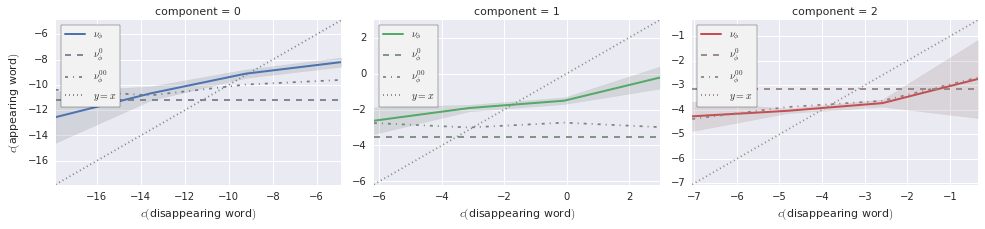

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68360133  0.18037225]



aoa  frequency  letters_count
Component-0 -0.733639   0.392457      -0.554754
Component-1  0.361148  -0.466351      -0.807520

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 24139) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   14 of 24139) |                     | Elapsed Time: 0:00:03 ETA: 1:29:19

  0% (   41 of 24139) |                     | Elapsed Time: 0:00:03 ETA: 0:32:28

  0% (   69 of 24139) |                     | Elapsed Time: 0:00:03 ETA: 0:20:27

  0% (   98 of 24139) |                     | Elapsed Time: 0:00:03 ETA: 0:15:14

  0% (  129 of 24139) |                     | Elapsed Time: 0:00:03 ETA: 0:02:54

  0% (  163 of 24139) |                     | Elapsed Time: 0:00:04 ETA: 0:02:44

  0% (  200 of 24139) |                     | Elapsed Time: 0:00:04 ETA: 0:02:33

  0% (  234 of 24139) |                     | Elapsed Time: 0:00:04 ETA: 0:02:26

  1% (  270 of 24139) |                     | Elapsed Time: 0:00:04 ETA: 0:02:21

  1% (  302 of 24139) |                     | Elapsed Time: 0:00:04 ETA: 0:02:20

  1% (  338 of 24139) |                     | Elapsed Time: 0:00:05 ETA: 0:02:22

  1% (  370 of 24139) |                     | Elapsed Time: 0:00:05 ETA: 0:02:26

  1% (  403 of 24139) |                     | Elapsed Time: 0:00:05 ETA: 0:02:29

  1% (  437 of 24139) |                     | Elapsed Time: 0:00:05 ETA: 0:02:28

  1% (  468 of 24139) |                     | Elapsed Time: 0:00:06 ETA: 0:02:30

  2% (  498 of 24139) |                     | Elapsed Time: 0:00:06 ETA: 0:02:30

  2% (  528 of 24139) |                     | Elapsed Time: 0:00:06 ETA: 0:02:35

  2% (  559 of 24139) |                     | Elapsed Time: 0:00:06 ETA: 0:02:38

  2% (  604 of 24139) |                     | Elapsed Time: 0:00:06 ETA: 0:02:38

  2% (  636 of 24139) |                     | Elapsed Time: 0:00:07 ETA: 0:02:38

  2% (  667 of 24139) |                     | Elapsed Time: 0:00:07 ETA: 0:02:37

  2% (  696 of 24139) |                     | Elapsed Time: 0:00:07 ETA: 0:02:37

  3% (  726 of 24139) |                     | Elapsed Time: 0:00:07 ETA: 0:02:38

  3% (  758 of 24139) |                     | Elapsed Time: 0:00:07 ETA: 0:02:38

  3% (  793 of 24139) |                     | Elapsed Time: 0:00:08 ETA: 0:02:34

  3% (  826 of 24139) |                     | Elapsed Time: 0:00:08 ETA: 0:02:28

  3% (  858 of 24139) |                     | Elapsed Time: 0:00:08 ETA: 0:02:26

  3% (  889 of 24139) |                     | Elapsed Time: 0:00:08 ETA: 0:02:27

  3% (  919 of 24139) |                     | Elapsed Time: 0:00:09 ETA: 0:02:36

  3% (  945 of 24139) |                     | Elapsed Time: 0:00:09 ETA: 0:02:47

  4% (  971 of 24139) |                     | Elapsed Time: 0:00:09 ETA: 0:02:55

  4% (  997 of 24139) |                     | Elapsed Time: 0:00:09 ETA: 0:03:08

  4% ( 1023 of 24139) |                     | Elapsed Time: 0:00:09 ETA: 0:03:08

  4% ( 1053 of 24139) |                     | Elapsed Time: 0:00:10 ETA: 0:03:00

  4% ( 1087 of 24139) |                     | Elapsed Time: 0:00:10 ETA: 0:02:48

  4% ( 1119 of 24139) |                     | Elapsed Time: 0:00:10 ETA: 0:02:39

  4% ( 1147 of 24139) |                     | Elapsed Time: 0:00:10 ETA: 0:02:36

  4% ( 1175 of 24139) |#                    | Elapsed Time: 0:00:10 ETA: 0:02:35

  5% ( 1207 of 24139) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:43

  5% ( 1239 of 24139) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:47

  5% ( 1271 of 24139) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:44

  5% ( 1301 of 24139) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:41

  5% ( 1334 of 24139) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:34

  5% ( 1369 of 24139) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:24

  5% ( 1403 of 24139) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:21

  5% ( 1438 of 24139) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:18

  6% ( 1472 of 24139) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:15

  6% ( 1509 of 24139) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:16

  6% ( 1543 of 24139) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:15

  6% ( 1577 of 24139) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:15

  6% ( 1613 of 24139) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:13

  6% ( 1652 of 24139) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:08

  6% ( 1686 of 24139) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:09

  7% ( 1712 of 24139) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:15

  7% ( 1740 of 24139) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:22

  7% ( 1769 of 24139) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:31

  7% ( 1811 of 24139) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:40

  7% ( 1846 of 24139) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:30

  7% ( 1881 of 24139) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:24

  7% ( 1916 of 24139) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:18

  8% ( 1943 of 24139) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:21

  8% ( 1975 of 24139) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:19

  8% ( 2005 of 24139) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:27

  8% ( 2042 of 24139) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:23

  8% ( 2080 of 24139) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:15

  8% ( 2130 of 24139) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:11

  8% ( 2160 of 24139) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:10

  9% ( 2194 of 24139) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:11

  9% ( 2230 of 24139) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:11

  9% ( 2266 of 24139) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:13

  9% ( 2300 of 24139) |##                   | Elapsed Time: 0:00:17 ETA: 0:02:10

  9% ( 2332 of 24139) |##                   | Elapsed Time: 0:00:18 ETA: 0:02:09

  9% ( 2366 of 24139) |##                   | Elapsed Time: 0:00:18 ETA: 0:02:10

 10% ( 2414 of 24139) |##                   | Elapsed Time: 0:00:18 ETA: 0:02:12

 10% ( 2448 of 24139) |##                   | Elapsed Time: 0:00:18 ETA: 0:02:13

 10% ( 2480 of 24139) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:13

 10% ( 2509 of 24139) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:17

 10% ( 2535 of 24139) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:25

 10% ( 2561 of 24139) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:36

 10% ( 2587 of 24139) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:46

 10% ( 2613 of 24139) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:54

 10% ( 2647 of 24139) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:42

 11% ( 2681 of 24139) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:32

 11% ( 2716 of 24139) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:28

 11% ( 2749 of 24139) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:19

 11% ( 2781 of 24139) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:15

 11% ( 2817 of 24139) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:12

 11% ( 2847 of 24139) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:13

 11% ( 2882 of 24139) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:10

 12% ( 2916 of 24139) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:10

 12% ( 2948 of 24139) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:09

 12% ( 2980 of 24139) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:09

 12% ( 3018 of 24139) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:12

 12% ( 3056 of 24139) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:09

 12% ( 3087 of 24139) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:10

 12% ( 3121 of 24139) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:08

 13% ( 3153 of 24139) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:08

 13% ( 3185 of 24139) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:10

 13% ( 3218 of 24139) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:11

 13% ( 3253 of 24139) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:11

 13% ( 3287 of 24139) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:09

 13% ( 3320 of 24139) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:10

 13% ( 3354 of 24139) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:10

 14% ( 3385 of 24139) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:13

 14% ( 3421 of 24139) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:09

 14% ( 3456 of 24139) |###                  | Elapsed Time: 0:00:25 ETA: 0:02:09

 14% ( 3488 of 24139) |###                  | Elapsed Time: 0:00:25 ETA: 0:02:10

 14% ( 3520 of 24139) |###                  | Elapsed Time: 0:00:25 ETA: 0:02:10

 14% ( 3547 of 24139) |###                  | Elapsed Time: 0:00:26 ETA: 0:02:13

 14% ( 3581 of 24139) |###                  | Elapsed Time: 0:00:26 ETA: 0:02:15

 15% ( 3621 of 24139) |###                  | Elapsed Time: 0:00:26 ETA: 0:02:17

 15% ( 3658 of 24139) |###                  | Elapsed Time: 0:00:26 ETA: 0:02:13

 15% ( 3692 of 24139) |###                  | Elapsed Time: 0:00:26 ETA: 0:02:03

 15% ( 3726 of 24139) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:03

 15% ( 3762 of 24139) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:00

 15% ( 3796 of 24139) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:00

 15% ( 3824 of 24139) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:07

 15% ( 3855 of 24139) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:10

 16% ( 3886 of 24139) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:13

 16% ( 3923 of 24139) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:14

 16% ( 3961 of 24139) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:08

 16% ( 3994 of 24139) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:04

 16% ( 4025 of 24139) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:05

 16% ( 4062 of 24139) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:00

 16% ( 4094 of 24139) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:03

 17% ( 4125 of 24139) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:06

 17% ( 4151 of 24139) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:12

 17% ( 4176 of 24139) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:22

 17% ( 4202 of 24139) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:31

 17% ( 4241 of 24139) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:33

 17% ( 4277 of 24139) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:23

 17% ( 4312 of 24139) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:13

 18% ( 4365 of 24139) |###                  | Elapsed Time: 0:00:31 ETA: 0:01:58

 18% ( 4403 of 24139) |###                  | Elapsed Time: 0:00:31 ETA: 0:01:52

 18% ( 4441 of 24139) |###                  | Elapsed Time: 0:00:31 ETA: 0:01:50

 18% ( 4471 of 24139) |###                  | Elapsed Time: 0:00:31 ETA: 0:01:54

 18% ( 4508 of 24139) |###                  | Elapsed Time: 0:00:32 ETA: 0:01:54

 18% ( 4543 of 24139) |###                  | Elapsed Time: 0:00:32 ETA: 0:01:57

 18% ( 4573 of 24139) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:03

 19% ( 4625 of 24139) |####                 | Elapsed Time: 0:00:32 ETA: 0:02:00

 19% ( 4653 of 24139) |####                 | Elapsed Time: 0:00:33 ETA: 0:02:08

 19% ( 4688 of 24139) |####                 | Elapsed Time: 0:00:33 ETA: 0:02:04

 19% ( 4722 of 24139) |####                 | Elapsed Time: 0:00:33 ETA: 0:02:00

 19% ( 4752 of 24139) |####                 | Elapsed Time: 0:00:33 ETA: 0:02:04

 19% ( 4787 of 24139) |####                 | Elapsed Time: 0:00:33 ETA: 0:02:00

 20% ( 4828 of 24139) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:57

 20% ( 4863 of 24139) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:56

 20% ( 4899 of 24139) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:54

 20% ( 4931 of 24139) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:54

 20% ( 4966 of 24139) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:55

 20% ( 4991 of 24139) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:02

 20% ( 5013 of 24139) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:15

 20% ( 5042 of 24139) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:17

 21% ( 5079 of 24139) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:16

 21% ( 5113 of 24139) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:12

 21% ( 5146 of 24139) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:03

 21% ( 5179 of 24139) |####                 | Elapsed Time: 0:00:36 ETA: 0:01:57

 21% ( 5207 of 24139) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:00

 21% ( 5243 of 24139) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:00

 21% ( 5279 of 24139) |####                 | Elapsed Time: 0:00:36 ETA: 0:01:57

 22% ( 5313 of 24139) |####                 | Elapsed Time: 0:00:37 ETA: 0:01:55

 22% ( 5347 of 24139) |####                 | Elapsed Time: 0:00:37 ETA: 0:01:53

 22% ( 5380 of 24139) |####                 | Elapsed Time: 0:00:37 ETA: 0:01:52

 22% ( 5414 of 24139) |####                 | Elapsed Time: 0:00:37 ETA: 0:01:53

 22% ( 5449 of 24139) |####                 | Elapsed Time: 0:00:38 ETA: 0:01:56

 22% ( 5483 of 24139) |####                 | Elapsed Time: 0:00:38 ETA: 0:01:55

 22% ( 5516 of 24139) |####                 | Elapsed Time: 0:00:38 ETA: 0:01:56

 22% ( 5550 of 24139) |####                 | Elapsed Time: 0:00:38 ETA: 0:01:56

 23% ( 5585 of 24139) |####                 | Elapsed Time: 0:00:38 ETA: 0:01:52

 23% ( 5621 of 24139) |####                 | Elapsed Time: 0:00:39 ETA: 0:01:50

 23% ( 5651 of 24139) |####                 | Elapsed Time: 0:00:39 ETA: 0:01:54

 23% ( 5685 of 24139) |####                 | Elapsed Time: 0:00:39 ETA: 0:01:53

 23% ( 5734 of 24139) |####                 | Elapsed Time: 0:00:39 ETA: 0:01:50

 23% ( 5767 of 24139) |#####                | Elapsed Time: 0:00:39 ETA: 0:01:54

 24% ( 5802 of 24139) |#####                | Elapsed Time: 0:00:40 ETA: 0:01:50

 24% ( 5838 of 24139) |#####                | Elapsed Time: 0:00:40 ETA: 0:01:47

 24% ( 5870 of 24139) |#####                | Elapsed Time: 0:00:40 ETA: 0:01:50

 24% ( 5918 of 24139) |#####                | Elapsed Time: 0:00:40 ETA: 0:01:51

 24% ( 5954 of 24139) |#####                | Elapsed Time: 0:00:41 ETA: 0:01:50

 24% ( 5991 of 24139) |#####                | Elapsed Time: 0:00:41 ETA: 0:01:50

 25% ( 6035 of 24139) |#####                | Elapsed Time: 0:00:41 ETA: 0:01:48

 25% ( 6067 of 24139) |#####                | Elapsed Time: 0:00:41 ETA: 0:01:50

 25% ( 6102 of 24139) |#####                | Elapsed Time: 0:00:42 ETA: 0:01:50

 25% ( 6125 of 24139) |#####                | Elapsed Time: 0:00:42 ETA: 0:01:59

 25% ( 6152 of 24139) |#####                | Elapsed Time: 0:00:42 ETA: 0:02:05

 25% ( 6183 of 24139) |#####                | Elapsed Time: 0:00:42 ETA: 0:02:05

 25% ( 6218 of 24139) |#####                | Elapsed Time: 0:00:42 ETA: 0:02:05

 25% ( 6254 of 24139) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:58

 26% ( 6290 of 24139) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:47

 26% ( 6337 of 24139) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:43

 26% ( 6370 of 24139) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:45

 26% ( 6397 of 24139) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:49

 26% ( 6428 of 24139) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:53

 26% ( 6462 of 24139) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:54

 26% ( 6491 of 24139) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:58

 27% ( 6526 of 24139) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:56

 27% ( 6562 of 24139) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:47

 27% ( 6598 of 24139) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:45

 27% ( 6619 of 24139) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:53

 27% ( 6639 of 24139) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:02

 27% ( 6660 of 24139) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:19

 27% ( 6685 of 24139) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:33

 27% ( 6719 of 24139) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:26

 27% ( 6753 of 24139) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:10

 28% ( 6788 of 24139) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:57

 28% ( 6818 of 24139) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:51

 28% ( 6849 of 24139) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:49

 28% ( 6881 of 24139) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:50

 28% ( 6917 of 24139) |######               | Elapsed Time: 0:00:47 ETA: 0:01:48

 28% ( 6959 of 24139) |######               | Elapsed Time: 0:00:47 ETA: 0:01:43

 28% ( 6994 of 24139) |######               | Elapsed Time: 0:00:47 ETA: 0:01:40

 29% ( 7028 of 24139) |######               | Elapsed Time: 0:00:48 ETA: 0:01:39

 29% ( 7058 of 24139) |######               | Elapsed Time: 0:00:48 ETA: 0:01:41

 29% ( 7094 of 24139) |######               | Elapsed Time: 0:00:48 ETA: 0:01:41

 29% ( 7130 of 24139) |######               | Elapsed Time: 0:00:48 ETA: 0:01:42

 29% ( 7166 of 24139) |######               | Elapsed Time: 0:00:48 ETA: 0:01:39

 29% ( 7200 of 24139) |######               | Elapsed Time: 0:00:49 ETA: 0:01:39

 30% ( 7242 of 24139) |######               | Elapsed Time: 0:00:49 ETA: 0:01:38

 30% ( 7279 of 24139) |######               | Elapsed Time: 0:00:49 ETA: 0:01:39

 30% ( 7311 of 24139) |######               | Elapsed Time: 0:00:49 ETA: 0:01:41

 30% ( 7336 of 24139) |######               | Elapsed Time: 0:00:49 ETA: 0:01:46

 30% ( 7372 of 24139) |######               | Elapsed Time: 0:00:50 ETA: 0:01:46

 30% ( 7400 of 24139) |######               | Elapsed Time: 0:00:50 ETA: 0:01:50

 30% ( 7432 of 24139) |######               | Elapsed Time: 0:00:50 ETA: 0:01:55

 30% ( 7468 of 24139) |######               | Elapsed Time: 0:00:50 ETA: 0:01:45

 31% ( 7493 of 24139) |######               | Elapsed Time: 0:00:51 ETA: 0:01:50

 31% ( 7524 of 24139) |######               | Elapsed Time: 0:00:51 ETA: 0:01:52

 31% ( 7560 of 24139) |######               | Elapsed Time: 0:00:51 ETA: 0:01:52

 31% ( 7596 of 24139) |######               | Elapsed Time: 0:00:51 ETA: 0:01:51

 31% ( 7634 of 24139) |######               | Elapsed Time: 0:00:51 ETA: 0:01:46

 31% ( 7669 of 24139) |######               | Elapsed Time: 0:00:52 ETA: 0:01:40

 31% ( 7705 of 24139) |######               | Elapsed Time: 0:00:52 ETA: 0:01:35

 32% ( 7742 of 24139) |######               | Elapsed Time: 0:00:52 ETA: 0:01:32

 32% ( 7775 of 24139) |######               | Elapsed Time: 0:00:52 ETA: 0:01:34

 32% ( 7813 of 24139) |######               | Elapsed Time: 0:00:52 ETA: 0:01:32

 32% ( 7846 of 24139) |######               | Elapsed Time: 0:00:53 ETA: 0:01:35

 32% ( 7884 of 24139) |######               | Elapsed Time: 0:00:53 ETA: 0:01:34

 32% ( 7917 of 24139) |######               | Elapsed Time: 0:00:53 ETA: 0:01:36

 32% ( 7946 of 24139) |######               | Elapsed Time: 0:00:53 ETA: 0:01:41

 33% ( 7972 of 24139) |######               | Elapsed Time: 0:00:53 ETA: 0:01:44

 33% ( 8007 of 24139) |######               | Elapsed Time: 0:00:54 ETA: 0:01:46

 33% ( 8042 of 24139) |######               | Elapsed Time: 0:00:54 ETA: 0:01:46

 33% ( 8076 of 24139) |#######              | Elapsed Time: 0:00:54 ETA: 0:01:45

 33% ( 8105 of 24139) |#######              | Elapsed Time: 0:00:54 ETA: 0:01:41

 33% ( 8147 of 24139) |#######              | Elapsed Time: 0:00:55 ETA: 0:01:40

 33% ( 8182 of 24139) |#######              | Elapsed Time: 0:00:55 ETA: 0:01:39

 34% ( 8214 of 24139) |#######              | Elapsed Time: 0:00:55 ETA: 0:01:40

 34% ( 8243 of 24139) |#######              | Elapsed Time: 0:00:55 ETA: 0:01:41

 34% ( 8281 of 24139) |#######              | Elapsed Time: 0:00:55 ETA: 0:01:36

 34% ( 8313 of 24139) |#######              | Elapsed Time: 0:00:56 ETA: 0:01:39

 34% ( 8346 of 24139) |#######              | Elapsed Time: 0:00:56 ETA: 0:01:40

 34% ( 8381 of 24139) |#######              | Elapsed Time: 0:00:56 ETA: 0:01:35

 34% ( 8414 of 24139) |#######              | Elapsed Time: 0:00:56 ETA: 0:01:37

 35% ( 8449 of 24139) |#######              | Elapsed Time: 0:00:56 ETA: 0:01:38

 35% ( 8485 of 24139) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:34

 35% ( 8514 of 24139) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:39

 35% ( 8545 of 24139) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:40

 35% ( 8577 of 24139) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:40

 35% ( 8611 of 24139) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:41

 35% ( 8645 of 24139) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:39

 35% ( 8672 of 24139) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:40

 36% ( 8701 of 24139) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:43

 36% ( 8721 of 24139) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:54

 36% ( 8751 of 24139) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:57

 36% ( 8786 of 24139) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:53

 36% ( 8823 of 24139) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:48

 36% ( 8860 of 24139) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:36

 36% ( 8892 of 24139) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:29

 36% ( 8927 of 24139) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:29

 37% ( 8962 of 24139) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:29

 37% ( 8997 of 24139) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:30

 37% ( 9029 of 24139) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:30

 37% ( 9067 of 24139) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:33

 37% ( 9102 of 24139) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:33

 37% ( 9137 of 24139) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:32

 38% ( 9173 of 24139) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:31

 38% ( 9209 of 24139) |########             | Elapsed Time: 0:01:01 ETA: 0:01:29

 38% ( 9243 of 24139) |########             | Elapsed Time: 0:01:01 ETA: 0:01:27

 38% ( 9276 of 24139) |########             | Elapsed Time: 0:01:02 ETA: 0:01:28

 38% ( 9311 of 24139) |########             | Elapsed Time: 0:01:02 ETA: 0:01:28

 38% ( 9354 of 24139) |########             | Elapsed Time: 0:01:02 ETA: 0:01:30

 38% ( 9385 of 24139) |########             | Elapsed Time: 0:01:02 ETA: 0:01:32

 38% ( 9414 of 24139) |########             | Elapsed Time: 0:01:03 ETA: 0:01:32

 39% ( 9449 of 24139) |########             | Elapsed Time: 0:01:03 ETA: 0:01:32

 39% ( 9482 of 24139) |########             | Elapsed Time: 0:01:03 ETA: 0:01:31

 39% ( 9514 of 24139) |########             | Elapsed Time: 0:01:03 ETA: 0:01:34

 39% ( 9545 of 24139) |########             | Elapsed Time: 0:01:03 ETA: 0:01:34

 39% ( 9578 of 24139) |########             | Elapsed Time: 0:01:04 ETA: 0:01:30

 39% ( 9612 of 24139) |########             | Elapsed Time: 0:01:04 ETA: 0:01:31

 39% ( 9641 of 24139) |########             | Elapsed Time: 0:01:04 ETA: 0:01:34

 40% ( 9672 of 24139) |########             | Elapsed Time: 0:01:04 ETA: 0:01:32

 40% ( 9705 of 24139) |########             | Elapsed Time: 0:01:04 ETA: 0:01:31

 40% ( 9735 of 24139) |########             | Elapsed Time: 0:01:05 ETA: 0:01:35

 40% ( 9766 of 24139) |########             | Elapsed Time: 0:01:05 ETA: 0:01:35

 40% ( 9797 of 24139) |########             | Elapsed Time: 0:01:05 ETA: 0:01:34

 40% ( 9825 of 24139) |########             | Elapsed Time: 0:01:05 ETA: 0:01:37

 40% ( 9859 of 24139) |########             | Elapsed Time: 0:01:05 ETA: 0:01:35

 40% ( 9892 of 24139) |########             | Elapsed Time: 0:01:06 ETA: 0:01:33

 41% ( 9930 of 24139) |########             | Elapsed Time: 0:01:06 ETA: 0:01:29

 41% ( 9972 of 24139) |########             | Elapsed Time: 0:01:06 ETA: 0:01:25

 41% (10004 of 24139) |########             | Elapsed Time: 0:01:06 ETA: 0:01:24

 41% (10040 of 24139) |########             | Elapsed Time: 0:01:06 ETA: 0:01:23

 41% (10073 of 24139) |########             | Elapsed Time: 0:01:07 ETA: 0:01:25

 41% (10100 of 24139) |########             | Elapsed Time: 0:01:07 ETA: 0:01:31

 41% (10136 of 24139) |########             | Elapsed Time: 0:01:07 ETA: 0:01:27

 42% (10167 of 24139) |########             | Elapsed Time: 0:01:07 ETA: 0:01:29

 42% (10199 of 24139) |########             | Elapsed Time: 0:01:08 ETA: 0:01:32

 42% (10232 of 24139) |########             | Elapsed Time: 0:01:08 ETA: 0:01:27

 42% (10275 of 24139) |########             | Elapsed Time: 0:01:08 ETA: 0:01:27

 42% (10302 of 24139) |########             | Elapsed Time: 0:01:08 ETA: 0:01:32

 42% (10338 of 24139) |########             | Elapsed Time: 0:01:08 ETA: 0:01:28

 42% (10372 of 24139) |#########            | Elapsed Time: 0:01:09 ETA: 0:01:26

 43% (10401 of 24139) |#########            | Elapsed Time: 0:01:09 ETA: 0:01:29

 43% (10426 of 24139) |#########            | Elapsed Time: 0:01:09 ETA: 0:01:31

 43% (10465 of 24139) |#########            | Elapsed Time: 0:01:09 ETA: 0:01:28

 43% (10503 of 24139) |#########            | Elapsed Time: 0:01:09 ETA: 0:01:26

 43% (10538 of 24139) |#########            | Elapsed Time: 0:01:10 ETA: 0:01:23

 43% (10575 of 24139) |#########            | Elapsed Time: 0:01:10 ETA: 0:01:19

 43% (10595 of 24139) |#########            | Elapsed Time: 0:01:10 ETA: 0:01:25

 44% (10625 of 24139) |#########            | Elapsed Time: 0:01:10 ETA: 0:01:30

 44% (10653 of 24139) |#########            | Elapsed Time: 0:01:11 ETA: 0:01:36

 44% (10681 of 24139) |#########            | Elapsed Time: 0:01:11 ETA: 0:01:43

 44% (10715 of 24139) |#########            | Elapsed Time: 0:01:11 ETA: 0:01:35

 44% (10751 of 24139) |#########            | Elapsed Time: 0:01:11 ETA: 0:01:30

 44% (10780 of 24139) |#########            | Elapsed Time: 0:01:11 ETA: 0:01:27

 44% (10816 of 24139) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:21

 45% (10863 of 24139) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:19

 45% (10894 of 24139) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:20

 45% (10930 of 24139) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:20

 45% (10961 of 24139) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:19

 45% (10989 of 24139) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:24

 45% (11020 of 24139) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:27

 45% (11048 of 24139) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:29

 45% (11083 of 24139) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:29

 46% (11117 of 24139) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:24

 46% (11149 of 24139) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:23

 46% (11182 of 24139) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:23

 46% (11216 of 24139) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:22

 46% (11252 of 24139) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:20

 46% (11290 of 24139) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:17

 46% (11326 of 24139) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:13

 47% (11361 of 24139) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:13

 47% (11392 of 24139) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:14

 47% (11423 of 24139) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:18

 47% (11453 of 24139) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:21

 47% (11486 of 24139) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:23

 47% (11514 of 24139) |##########           | Elapsed Time: 0:01:16 ETA: 0:01:26

 47% (11549 of 24139) |##########           | Elapsed Time: 0:01:16 ETA: 0:01:23

 47% (11583 of 24139) |##########           | Elapsed Time: 0:01:16 ETA: 0:01:20

 48% (11618 of 24139) |##########           | Elapsed Time: 0:01:17 ETA: 0:01:16

 48% (11652 of 24139) |##########           | Elapsed Time: 0:01:17 ETA: 0:01:15

 48% (11689 of 24139) |##########           | Elapsed Time: 0:01:17 ETA: 0:01:13

 48% (11727 of 24139) |##########           | Elapsed Time: 0:01:17 ETA: 0:01:11

 48% (11768 of 24139) |##########           | Elapsed Time: 0:01:17 ETA: 0:01:10

 48% (11804 of 24139) |##########           | Elapsed Time: 0:01:18 ETA: 0:01:09

 49% (11836 of 24139) |##########           | Elapsed Time: 0:01:18 ETA: 0:01:10

 49% (11871 of 24139) |##########           | Elapsed Time: 0:01:18 ETA: 0:01:11

 49% (11892 of 24139) |##########           | Elapsed Time: 0:01:18 ETA: 0:01:18

 49% (11923 of 24139) |##########           | Elapsed Time: 0:01:18 ETA: 0:01:22

 49% (11954 of 24139) |##########           | Elapsed Time: 0:01:19 ETA: 0:01:24

 49% (11992 of 24139) |##########           | Elapsed Time: 0:01:19 ETA: 0:01:20

 49% (12029 of 24139) |##########           | Elapsed Time: 0:01:19 ETA: 0:01:15

 50% (12070 of 24139) |##########           | Elapsed Time: 0:01:19 ETA: 0:01:12

 50% (12097 of 24139) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:11

 50% (12132 of 24139) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:12

 50% (12173 of 24139) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:10

 50% (12209 of 24139) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:10

 50% (12244 of 24139) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:08

 50% (12279 of 24139) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:07

 51% (12312 of 24139) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:08

 51% (12347 of 24139) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:10

 51% (12385 of 24139) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:10

 51% (12421 of 24139) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:11

 51% (12458 of 24139) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:08

 51% (12495 of 24139) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:07

 51% (12533 of 24139) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:07

 52% (12567 of 24139) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:04

 52% (12597 of 24139) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:07

 52% (12635 of 24139) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:07

 52% (12673 of 24139) |###########          | Elapsed Time: 0:01:23 ETA: 0:01:08

 52% (12709 of 24139) |###########          | Elapsed Time: 0:01:23 ETA: 0:01:08

 52% (12735 of 24139) |###########          | Elapsed Time: 0:01:23 ETA: 0:01:10

 52% (12770 of 24139) |###########          | Elapsed Time: 0:01:23 ETA: 0:01:09

 53% (12803 of 24139) |###########          | Elapsed Time: 0:01:24 ETA: 0:01:12

 53% (12833 of 24139) |###########          | Elapsed Time: 0:01:24 ETA: 0:01:14

 53% (12867 of 24139) |###########          | Elapsed Time: 0:01:24 ETA: 0:01:10

 53% (12896 of 24139) |###########          | Elapsed Time: 0:01:24 ETA: 0:01:13

 53% (12927 of 24139) |###########          | Elapsed Time: 0:01:25 ETA: 0:01:13

 53% (12975 of 24139) |###########          | Elapsed Time: 0:01:25 ETA: 0:01:10

 53% (13004 of 24139) |###########          | Elapsed Time: 0:01:25 ETA: 0:01:12

 54% (13040 of 24139) |###########          | Elapsed Time: 0:01:25 ETA: 0:01:09

 54% (13073 of 24139) |###########          | Elapsed Time: 0:01:25 ETA: 0:01:09

 54% (13112 of 24139) |###########          | Elapsed Time: 0:01:26 ETA: 0:01:05

 54% (13142 of 24139) |###########          | Elapsed Time: 0:01:26 ETA: 0:01:07

 54% (13173 of 24139) |###########          | Elapsed Time: 0:01:26 ETA: 0:01:07

 54% (13202 of 24139) |###########          | Elapsed Time: 0:01:26 ETA: 0:01:09

 54% (13237 of 24139) |###########          | Elapsed Time: 0:01:26 ETA: 0:01:09

 55% (13296 of 24139) |###########          | Elapsed Time: 0:01:27 ETA: 0:01:05

 55% (13334 of 24139) |###########          | Elapsed Time: 0:01:27 ETA: 0:01:01

 55% (13369 of 24139) |###########          | Elapsed Time: 0:01:27 ETA: 0:00:59

 55% (13406 of 24139) |###########          | Elapsed Time: 0:01:27 ETA: 0:00:58

 55% (13443 of 24139) |###########          | Elapsed Time: 0:01:28 ETA: 0:00:59

 55% (13480 of 24139) |###########          | Elapsed Time: 0:01:28 ETA: 0:00:59

 55% (13516 of 24139) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:00

 56% (13550 of 24139) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:00

 56% (13596 of 24139) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:01

 56% (13633 of 24139) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:01

 56% (13665 of 24139) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:02

 56% (13701 of 24139) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:01

 56% (13742 of 24139) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:00

 57% (13772 of 24139) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:01

 57% (13800 of 24139) |############         | Elapsed Time: 0:01:30 ETA: 0:01:03

 57% (13836 of 24139) |############         | Elapsed Time: 0:01:30 ETA: 0:01:01

 57% (13880 of 24139) |############         | Elapsed Time: 0:01:30 ETA: 0:01:04

 57% (13920 of 24139) |############         | Elapsed Time: 0:01:30 ETA: 0:01:02

 57% (13958 of 24139) |############         | Elapsed Time: 0:01:31 ETA: 0:00:57

 57% (13994 of 24139) |############         | Elapsed Time: 0:01:31 ETA: 0:00:56

 58% (14026 of 24139) |############         | Elapsed Time: 0:01:31 ETA: 0:00:58

 58% (14063 of 24139) |############         | Elapsed Time: 0:01:31 ETA: 0:00:56

 58% (14098 of 24139) |############         | Elapsed Time: 0:01:31 ETA: 0:00:58

 58% (14135 of 24139) |############         | Elapsed Time: 0:01:32 ETA: 0:00:59

 58% (14182 of 24139) |############         | Elapsed Time: 0:01:32 ETA: 0:00:56

 58% (14221 of 24139) |############         | Elapsed Time: 0:01:32 ETA: 0:00:55

 59% (14255 of 24139) |############         | Elapsed Time: 0:01:32 ETA: 0:00:55

 59% (14286 of 24139) |############         | Elapsed Time: 0:01:32 ETA: 0:00:57

 59% (14321 of 24139) |############         | Elapsed Time: 0:01:33 ETA: 0:00:57

 59% (14360 of 24139) |############         | Elapsed Time: 0:01:33 ETA: 0:00:57

 59% (14398 of 24139) |############         | Elapsed Time: 0:01:33 ETA: 0:00:56

 59% (14433 of 24139) |############         | Elapsed Time: 0:01:33 ETA: 0:00:55

 60% (14484 of 24139) |############         | Elapsed Time: 0:01:34 ETA: 0:00:53

 60% (14519 of 24139) |############         | Elapsed Time: 0:01:34 ETA: 0:00:54

 60% (14552 of 24139) |############         | Elapsed Time: 0:01:34 ETA: 0:00:55

 60% (14585 of 24139) |############         | Elapsed Time: 0:01:34 ETA: 0:00:56

 60% (14624 of 24139) |############         | Elapsed Time: 0:01:34 ETA: 0:00:55

 60% (14659 of 24139) |############         | Elapsed Time: 0:01:35 ETA: 0:00:55

 60% (14696 of 24139) |############         | Elapsed Time: 0:01:35 ETA: 0:00:54

 61% (14733 of 24139) |############         | Elapsed Time: 0:01:35 ETA: 0:00:53

 61% (14786 of 24139) |############         | Elapsed Time: 0:01:35 ETA: 0:00:51

 61% (14825 of 24139) |############         | Elapsed Time: 0:01:36 ETA: 0:00:50

 61% (14861 of 24139) |############         | Elapsed Time: 0:01:36 ETA: 0:00:50

 61% (14894 of 24139) |############         | Elapsed Time: 0:01:36 ETA: 0:00:51

 61% (14929 of 24139) |############         | Elapsed Time: 0:01:36 ETA: 0:00:52

 61% (14966 of 24139) |#############        | Elapsed Time: 0:01:36 ETA: 0:00:52

 62% (14998 of 24139) |#############        | Elapsed Time: 0:01:37 ETA: 0:00:54

 62% (15027 of 24139) |#############        | Elapsed Time: 0:01:37 ETA: 0:00:56

 62% (15077 of 24139) |#############        | Elapsed Time: 0:01:37 ETA: 0:00:56

 62% (15104 of 24139) |#############        | Elapsed Time: 0:01:37 ETA: 0:00:56

 62% (15143 of 24139) |#############        | Elapsed Time: 0:01:37 ETA: 0:00:54

 62% (15168 of 24139) |#############        | Elapsed Time: 0:01:38 ETA: 0:00:56

 62% (15198 of 24139) |#############        | Elapsed Time: 0:01:38 ETA: 0:00:56

 63% (15235 of 24139) |#############        | Elapsed Time: 0:01:38 ETA: 0:00:55

 63% (15268 of 24139) |#############        | Elapsed Time: 0:01:38 ETA: 0:00:57

 63% (15307 of 24139) |#############        | Elapsed Time: 0:01:38 ETA: 0:00:54

 63% (15343 of 24139) |#############        | Elapsed Time: 0:01:39 ETA: 0:00:50

 63% (15389 of 24139) |#############        | Elapsed Time: 0:01:39 ETA: 0:00:49

 63% (15421 of 24139) |#############        | Elapsed Time: 0:01:39 ETA: 0:00:50

 64% (15455 of 24139) |#############        | Elapsed Time: 0:01:39 ETA: 0:00:50

 64% (15491 of 24139) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:50

 64% (15528 of 24139) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:50

 64% (15564 of 24139) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:51

 64% (15596 of 24139) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:49

 64% (15635 of 24139) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:48

 64% (15671 of 24139) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:48

 65% (15710 of 24139) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:48

 65% (15742 of 24139) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:49

 65% (15781 of 24139) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:47

 65% (15816 of 24139) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:48

 65% (15848 of 24139) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:49

 65% (15881 of 24139) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:49

 65% (15915 of 24139) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:49

 66% (15952 of 24139) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:49

 66% (15993 of 24139) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:47

 66% (16030 of 24139) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:47

 66% (16064 of 24139) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:46

 66% (16092 of 24139) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:48

 66% (16126 of 24139) |##############       | Elapsed Time: 0:01:43 ETA: 0:00:49

 66% (16159 of 24139) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:50

 67% (16192 of 24139) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:50

 67% (16226 of 24139) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:49

 67% (16262 of 24139) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:47

 67% (16309 of 24139) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:46

 67% (16343 of 24139) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:46

 67% (16378 of 24139) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:46

 68% (16430 of 24139) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:45

 68% (16466 of 24139) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:44

 68% (16501 of 24139) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:44

 68% (16539 of 24139) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:43

 68% (16575 of 24139) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:43

 68% (16610 of 24139) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:44

 68% (16642 of 24139) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:45

 69% (16674 of 24139) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:46

 69% (16709 of 24139) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:46

 69% (16742 of 24139) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:47

 69% (16777 of 24139) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:45

 69% (16812 of 24139) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:43

 69% (16840 of 24139) |##############       | Elapsed Time: 0:01:48 ETA: 0:00:45

 69% (16874 of 24139) |##############       | Elapsed Time: 0:01:48 ETA: 0:00:44

 70% (16915 of 24139) |##############       | Elapsed Time: 0:01:48 ETA: 0:00:45

 70% (16953 of 24139) |##############       | Elapsed Time: 0:01:48 ETA: 0:00:45

 70% (16989 of 24139) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:44

 70% (17026 of 24139) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:41

 70% (17064 of 24139) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:39

 70% (17101 of 24139) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:38

 70% (17136 of 24139) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:39

 71% (17174 of 24139) |##############       | Elapsed Time: 0:01:50 ETA: 0:00:38

 71% (17220 of 24139) |##############       | Elapsed Time: 0:01:50 ETA: 0:00:39

 71% (17259 of 24139) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:37

 71% (17299 of 24139) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:37

 71% (17339 of 24139) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:36

 71% (17378 of 24139) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:35

 72% (17414 of 24139) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:35

 72% (17442 of 24139) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:38

 72% (17473 of 24139) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:40

 72% (17517 of 24139) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:41

 72% (17546 of 24139) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:43

 72% (17586 of 24139) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:41

 73% (17622 of 24139) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:38

 73% (17657 of 24139) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:38

 73% (17693 of 24139) |###############      | Elapsed Time: 0:01:53 ETA: 0:00:36

 73% (17733 of 24139) |###############      | Elapsed Time: 0:01:53 ETA: 0:00:35

 73% (17774 of 24139) |###############      | Elapsed Time: 0:01:53 ETA: 0:00:34

 73% (17823 of 24139) |###############      | Elapsed Time: 0:01:53 ETA: 0:00:33

 73% (17856 of 24139) |###############      | Elapsed Time: 0:01:53 ETA: 0:00:33

 74% (17894 of 24139) |###############      | Elapsed Time: 0:01:54 ETA: 0:00:33

 74% (17932 of 24139) |###############      | Elapsed Time: 0:01:54 ETA: 0:00:33

 74% (17968 of 24139) |###############      | Elapsed Time: 0:01:54 ETA: 0:00:34

 74% (18003 of 24139) |###############      | Elapsed Time: 0:01:54 ETA: 0:00:34

 74% (18035 of 24139) |###############      | Elapsed Time: 0:01:54 ETA: 0:00:35

 74% (18068 of 24139) |###############      | Elapsed Time: 0:01:55 ETA: 0:00:36

 75% (18105 of 24139) |###############      | Elapsed Time: 0:01:55 ETA: 0:00:36

 75% (18142 of 24139) |###############      | Elapsed Time: 0:01:55 ETA: 0:00:37

 75% (18161 of 24139) |###############      | Elapsed Time: 0:01:55 ETA: 0:00:41

 75% (18196 of 24139) |###############      | Elapsed Time: 0:01:55 ETA: 0:00:38

 75% (18219 of 24139) |###############      | Elapsed Time: 0:01:56 ETA: 0:00:41

 75% (18252 of 24139) |###############      | Elapsed Time: 0:01:56 ETA: 0:00:42

 75% (18288 of 24139) |###############      | Elapsed Time: 0:01:56 ETA: 0:00:39

 75% (18319 of 24139) |###############      | Elapsed Time: 0:01:56 ETA: 0:00:38

 76% (18357 of 24139) |###############      | Elapsed Time: 0:01:57 ETA: 0:00:36

 76% (18387 of 24139) |###############      | Elapsed Time: 0:01:57 ETA: 0:00:34

 76% (18426 of 24139) |################     | Elapsed Time: 0:01:57 ETA: 0:00:34

 76% (18460 of 24139) |################     | Elapsed Time: 0:01:57 ETA: 0:00:34

 76% (18486 of 24139) |################     | Elapsed Time: 0:01:57 ETA: 0:00:36

 76% (18520 of 24139) |################     | Elapsed Time: 0:01:58 ETA: 0:00:35

 76% (18554 of 24139) |################     | Elapsed Time: 0:01:58 ETA: 0:00:34

 77% (18590 of 24139) |################     | Elapsed Time: 0:01:58 ETA: 0:00:35

 77% (18620 of 24139) |################     | Elapsed Time: 0:01:58 ETA: 0:00:34

 77% (18656 of 24139) |################     | Elapsed Time: 0:01:58 ETA: 0:00:32

 77% (18689 of 24139) |################     | Elapsed Time: 0:01:59 ETA: 0:00:33

 77% (18725 of 24139) |################     | Elapsed Time: 0:01:59 ETA: 0:00:33

 77% (18758 of 24139) |################     | Elapsed Time: 0:01:59 ETA: 0:00:33

 77% (18792 of 24139) |################     | Elapsed Time: 0:01:59 ETA: 0:00:32

 78% (18830 of 24139) |################     | Elapsed Time: 0:01:59 ETA: 0:00:31

 78% (18866 of 24139) |################     | Elapsed Time: 0:02:00 ETA: 0:00:30

 78% (18900 of 24139) |################     | Elapsed Time: 0:02:00 ETA: 0:00:30

 78% (18936 of 24139) |################     | Elapsed Time: 0:02:00 ETA: 0:00:29

 78% (18964 of 24139) |################     | Elapsed Time: 0:02:00 ETA: 0:00:31

 78% (19010 of 24139) |################     | Elapsed Time: 0:02:01 ETA: 0:00:31

 78% (19046 of 24139) |################     | Elapsed Time: 0:02:01 ETA: 0:00:31

 79% (19078 of 24139) |################     | Elapsed Time: 0:02:01 ETA: 0:00:31

 79% (19104 of 24139) |################     | Elapsed Time: 0:02:01 ETA: 0:00:32

 79% (19138 of 24139) |################     | Elapsed Time: 0:02:01 ETA: 0:00:31

 79% (19171 of 24139) |################     | Elapsed Time: 0:02:02 ETA: 0:00:32

 79% (19204 of 24139) |################     | Elapsed Time: 0:02:02 ETA: 0:00:32

 79% (19240 of 24139) |################     | Elapsed Time: 0:02:02 ETA: 0:00:30

 79% (19276 of 24139) |################     | Elapsed Time: 0:02:02 ETA: 0:00:29

 80% (19312 of 24139) |################     | Elapsed Time: 0:02:02 ETA: 0:00:29

 80% (19348 of 24139) |################     | Elapsed Time: 0:02:03 ETA: 0:00:28

 80% (19387 of 24139) |################     | Elapsed Time: 0:02:03 ETA: 0:00:27

 80% (19425 of 24139) |################     | Elapsed Time: 0:02:03 ETA: 0:00:26

 80% (19461 of 24139) |################     | Elapsed Time: 0:02:03 ETA: 0:00:26

 80% (19496 of 24139) |################     | Elapsed Time: 0:02:03 ETA: 0:00:26

 80% (19531 of 24139) |################     | Elapsed Time: 0:02:04 ETA: 0:00:26

 81% (19553 of 24139) |#################    | Elapsed Time: 0:02:04 ETA: 0:00:29

 81% (19590 of 24139) |#################    | Elapsed Time: 0:02:04 ETA: 0:00:29

 81% (19633 of 24139) |#################    | Elapsed Time: 0:02:04 ETA: 0:00:27

 81% (19669 of 24139) |#################    | Elapsed Time: 0:02:05 ETA: 0:00:27

 81% (19707 of 24139) |#################    | Elapsed Time: 0:02:05 ETA: 0:00:25

 81% (19745 of 24139) |#################    | Elapsed Time: 0:02:05 ETA: 0:00:23

 81% (19780 of 24139) |#################    | Elapsed Time: 0:02:05 ETA: 0:00:24

 82% (19817 of 24139) |#################    | Elapsed Time: 0:02:05 ETA: 0:00:24

 82% (19846 of 24139) |#################    | Elapsed Time: 0:02:06 ETA: 0:00:25

 82% (19880 of 24139) |#################    | Elapsed Time: 0:02:06 ETA: 0:00:25

 82% (19915 of 24139) |#################    | Elapsed Time: 0:02:06 ETA: 0:00:25

 82% (19953 of 24139) |#################    | Elapsed Time: 0:02:06 ETA: 0:00:25

 82% (19986 of 24139) |#################    | Elapsed Time: 0:02:06 ETA: 0:00:25

 82% (20020 of 24139) |#################    | Elapsed Time: 0:02:07 ETA: 0:00:24

 83% (20052 of 24139) |#################    | Elapsed Time: 0:02:07 ETA: 0:00:24

 83% (20087 of 24139) |#################    | Elapsed Time: 0:02:07 ETA: 0:00:24

 83% (20125 of 24139) |#################    | Elapsed Time: 0:02:07 ETA: 0:00:24

 83% (20162 of 24139) |#################    | Elapsed Time: 0:02:07 ETA: 0:00:23

 83% (20217 of 24139) |#################    | Elapsed Time: 0:02:08 ETA: 0:00:22

 83% (20252 of 24139) |#################    | Elapsed Time: 0:02:08 ETA: 0:00:21

 84% (20287 of 24139) |#################    | Elapsed Time: 0:02:08 ETA: 0:00:21

 84% (20321 of 24139) |#################    | Elapsed Time: 0:02:08 ETA: 0:00:21

 84% (20356 of 24139) |#################    | Elapsed Time: 0:02:09 ETA: 0:00:22

 84% (20388 of 24139) |#################    | Elapsed Time: 0:02:09 ETA: 0:00:22

 84% (20421 of 24139) |#################    | Elapsed Time: 0:02:09 ETA: 0:00:22

 84% (20456 of 24139) |#################    | Elapsed Time: 0:02:09 ETA: 0:00:22

 84% (20490 of 24139) |#################    | Elapsed Time: 0:02:09 ETA: 0:00:22

 85% (20536 of 24139) |#################    | Elapsed Time: 0:02:10 ETA: 0:00:22

 85% (20573 of 24139) |#################    | Elapsed Time: 0:02:10 ETA: 0:00:20

 85% (20600 of 24139) |#################    | Elapsed Time: 0:02:10 ETA: 0:00:21

 85% (20634 of 24139) |#################    | Elapsed Time: 0:02:10 ETA: 0:00:21

 85% (20671 of 24139) |#################    | Elapsed Time: 0:02:10 ETA: 0:00:21

 85% (20705 of 24139) |##################   | Elapsed Time: 0:02:11 ETA: 0:00:21

 85% (20740 of 24139) |##################   | Elapsed Time: 0:02:11 ETA: 0:00:20

 86% (20774 of 24139) |##################   | Elapsed Time: 0:02:11 ETA: 0:00:20

 86% (20820 of 24139) |##################   | Elapsed Time: 0:02:11 ETA: 0:00:19

 86% (20855 of 24139) |##################   | Elapsed Time: 0:02:12 ETA: 0:00:19

 86% (20885 of 24139) |##################   | Elapsed Time: 0:02:12 ETA: 0:00:19

 86% (20918 of 24139) |##################   | Elapsed Time: 0:02:12 ETA: 0:00:19

 86% (20949 of 24139) |##################   | Elapsed Time: 0:02:12 ETA: 0:00:20

 86% (20985 of 24139) |##################   | Elapsed Time: 0:02:12 ETA: 0:00:19

 87% (21021 of 24139) |##################   | Elapsed Time: 0:02:13 ETA: 0:00:19

 87% (21059 of 24139) |##################   | Elapsed Time: 0:02:13 ETA: 0:00:17

 87% (21095 of 24139) |##################   | Elapsed Time: 0:02:13 ETA: 0:00:17

 87% (21134 of 24139) |##################   | Elapsed Time: 0:02:13 ETA: 0:00:17

 87% (21168 of 24139) |##################   | Elapsed Time: 0:02:13 ETA: 0:00:17

 87% (21202 of 24139) |##################   | Elapsed Time: 0:02:14 ETA: 0:00:18

 87% (21238 of 24139) |##################   | Elapsed Time: 0:02:14 ETA: 0:00:18

 88% (21265 of 24139) |##################   | Elapsed Time: 0:02:14 ETA: 0:00:18

 88% (21299 of 24139) |##################   | Elapsed Time: 0:02:14 ETA: 0:00:17

 88% (21332 of 24139) |##################   | Elapsed Time: 0:02:14 ETA: 0:00:17

 88% (21368 of 24139) |##################   | Elapsed Time: 0:02:15 ETA: 0:00:17

 88% (21403 of 24139) |##################   | Elapsed Time: 0:02:15 ETA: 0:00:17

 88% (21442 of 24139) |##################   | Elapsed Time: 0:02:15 ETA: 0:00:16

 88% (21471 of 24139) |##################   | Elapsed Time: 0:02:15 ETA: 0:00:16

 89% (21508 of 24139) |##################   | Elapsed Time: 0:02:16 ETA: 0:00:16

 89% (21541 of 24139) |##################   | Elapsed Time: 0:02:16 ETA: 0:00:16

 89% (21576 of 24139) |##################   | Elapsed Time: 0:02:16 ETA: 0:00:15

 89% (21608 of 24139) |##################   | Elapsed Time: 0:02:16 ETA: 0:00:15

 89% (21635 of 24139) |##################   | Elapsed Time: 0:02:16 ETA: 0:00:16

 89% (21671 of 24139) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:16

 89% (21704 of 24139) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:15

 90% (21738 of 24139) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:16

 90% (21768 of 24139) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:15

 90% (21800 of 24139) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:15

 90% (21834 of 24139) |##################   | Elapsed Time: 0:02:18 ETA: 0:00:14

 90% (21863 of 24139) |###################  | Elapsed Time: 0:02:18 ETA: 0:00:15

 90% (21893 of 24139) |###################  | Elapsed Time: 0:02:18 ETA: 0:00:15

 90% (21926 of 24139) |###################  | Elapsed Time: 0:02:18 ETA: 0:00:14

 90% (21962 of 24139) |###################  | Elapsed Time: 0:02:18 ETA: 0:00:13

 91% (21999 of 24139) |###################  | Elapsed Time: 0:02:19 ETA: 0:00:12

 91% (22046 of 24139) |###################  | Elapsed Time: 0:02:19 ETA: 0:00:12

 91% (22085 of 24139) |###################  | Elapsed Time: 0:02:19 ETA: 0:00:11

 91% (22116 of 24139) |###################  | Elapsed Time: 0:02:19 ETA: 0:00:11

 91% (22152 of 24139) |###################  | Elapsed Time: 0:02:20 ETA: 0:00:11

 91% (22191 of 24139) |###################  | Elapsed Time: 0:02:20 ETA: 0:00:10

 92% (22229 of 24139) |###################  | Elapsed Time: 0:02:20 ETA: 0:00:10

 92% (22264 of 24139) |###################  | Elapsed Time: 0:02:20 ETA: 0:00:10

 92% (22302 of 24139) |###################  | Elapsed Time: 0:02:20 ETA: 0:00:10

 92% (22348 of 24139) |###################  | Elapsed Time: 0:02:21 ETA: 0:00:09

 92% (22385 of 24139) |###################  | Elapsed Time: 0:02:21 ETA: 0:00:09

 92% (22422 of 24139) |###################  | Elapsed Time: 0:02:21 ETA: 0:00:09

 93% (22453 of 24139) |###################  | Elapsed Time: 0:02:21 ETA: 0:00:09

 93% (22484 of 24139) |###################  | Elapsed Time: 0:02:21 ETA: 0:00:09

 93% (22514 of 24139) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:10

 93% (22553 of 24139) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:09

 93% (22592 of 24139) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:09

 93% (22631 of 24139) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:08

 93% (22670 of 24139) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:08

 94% (22705 of 24139) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:07

 94% (22740 of 24139) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:07

 94% (22791 of 24139) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:07

 94% (22827 of 24139) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:07

 94% (22860 of 24139) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:07

 94% (22893 of 24139) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:07

 95% (22933 of 24139) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:07

 95% (22965 of 24139) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:07

 95% (23002 of 24139) |#################### | Elapsed Time: 0:02:25 ETA: 0:00:07

 95% (23038 of 24139) |#################### | Elapsed Time: 0:02:25 ETA: 0:00:06

 95% (23073 of 24139) |#################### | Elapsed Time: 0:02:25 ETA: 0:00:06

 95% (23112 of 24139) |#################### | Elapsed Time: 0:02:25 ETA: 0:00:05

 95% (23152 of 24139) |#################### | Elapsed Time: 0:02:25 ETA: 0:00:05

 96% (23186 of 24139) |#################### | Elapsed Time: 0:02:26 ETA: 0:00:05

 96% (23234 of 24139) |#################### | Elapsed Time: 0:02:26 ETA: 0:00:05

 96% (23269 of 24139) |#################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (23308 of 24139) |#################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (23344 of 24139) |#################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (23376 of 24139) |#################### | Elapsed Time: 0:02:27 ETA: 0:00:04

 96% (23409 of 24139) |#################### | Elapsed Time: 0:02:27 ETA: 0:00:04

 97% (23446 of 24139) |#################### | Elapsed Time: 0:02:27 ETA: 0:00:04

 97% (23483 of 24139) |#################### | Elapsed Time: 0:02:27 ETA: 0:00:03

 97% (23518 of 24139) |#################### | Elapsed Time: 0:02:27 ETA: 0:00:03

 97% (23555 of 24139) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:03

 97% (23587 of 24139) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:03

 97% (23620 of 24139) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:03

 97% (23654 of 24139) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:02

 98% (23689 of 24139) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:02

 98% (23719 of 24139) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:02

 98% (23757 of 24139) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:02

 98% (23795 of 24139) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:02

 98% (23838 of 24139) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:01

 98% (23871 of 24139) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:01

 99% (23908 of 24139) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:01

 99% (23942 of 24139) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:01

 99% (23981 of 24139) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:00

 99% (24019 of 24139) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:00

 99% (24055 of 24139) |#################### | Elapsed Time: 0:02:31 ETA: 0:00:00

 99% (24090 of 24139) |#################### | Elapsed Time: 0:02:31 ETA: 0:00:00

100% (24139 of 24139) |####################| Elapsed Time: 0:02:31 Time: 0:02:31


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


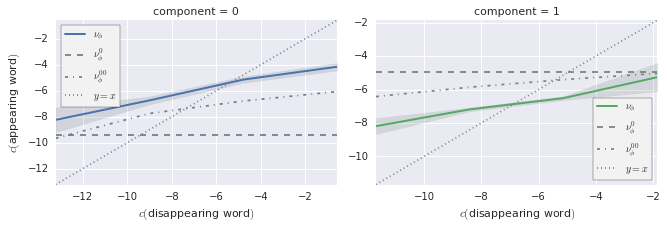

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 2206 (cluster-unique) substitutions, but the PCA is in fact computed on 1766 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
    * global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


    * global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering


    * global -> global
    * global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1391 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.06535392707748533

intercept                      5.431354
global_aoa                     0.026782
global_clustering             -0.052555
global_frequency               0.324253
global_letters_count          -0.018604
global_orthographic_density   -0.032071
global_synonyms_count          0.038869
dtype: float64

Regressing global frequency with 1391 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.08351774994452299

intercept                                              13.856203
global_aoa                                             -0.192925
global_clustering                                       1.213931
global_frequency                                        0.320376
global_letters_count                                   -1.217232
global_orthographic_density                            -0.815564
glo

Regressing global frequency with 1391 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.054107583176946084

intercept                                        9.260666
rel_aoa                                          0.025928
rel_clustering                                  -0.057991
rel_frequency                                    0.181069
rel_letters_count                                0.059495
rel_orthographic_density                        -0.133986
rel_synonyms_count                               0.517217
rel_aoa * rel_clustering                         0.030206
rel_aoa * rel_frequency                          0.016321
rel_aoa * rel_letters_count                      0.019252
rel_aoa * rel_orthographic_density              -0.006397
rel_aoa * rel_synonyms_count                     0.032849
rel_clustering * rel_frequency                  -0.007555
rel_clustering * rel_letters_count              -0.099420
rel_clustering * rel_orthographic_density       -0.061183
rel_clus

Regressing rel frequency with 1391 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.30021430023381573

intercept                      4.610044
global_aoa                    -0.009223
global_clustering              0.173981
global_frequency              -0.562998
global_letters_count           0.158144
global_orthographic_density    0.185921
global_synonyms_count          0.101270
rel_aoa                        0.030324
rel_clustering                -0.224811
rel_frequency                  0.908693
rel_letters_count             -0.175924
rel_orthographic_density      -0.218624
rel_synonyms_count            -0.074748
dtype: float64

Regressing rel frequency with 1391 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.3436718812058627

intercept                                                -4.312035
global_aoa                                                0.100553
global_clustering                                        -2.861774
global_frequency                    

Regressing rel aoa with 1264 measures, with interactions
           ^^^^^^^
R^2 = 0.03741461504292476

intercept                                             -12.433603
global_aoa                                              0.760725
global_clustering                                      -1.590433
global_frequency                                        0.911157
global_letters_count                                    0.766854
global_orthographic_density                             0.220381
global_synonyms_count                                  -0.779533
global_aoa * global_clustering                          0.045938
global_aoa * global_frequency                          -0.030885
global_aoa * global_letters_count                      -0.023312
global_aoa * global_orthographic_density                0.007252
global_aoa * global_synonyms_count                      0.019441
global_clustering * global_frequency                    0.112829
global_clustering * global_letters_count            

Regressing global aoa with 1264 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.14991349639370477

intercept                                                 25.279311
global_aoa                                                 1.773417
global_clustering                                          2.449353
global_frequency                                           0.155337
global_letters_count                                      -2.381600
global_orthographic_density                              -11.500036
global_synonyms_count                                     -4.259304
rel_aoa                                                   -0.385860
rel_clustering                                            -6.302478
rel_frequency                                              0.658639
rel_letters_count                                          2.632069
rel_orthographic_density                                   9.769300
rel_synonyms_count                                        -1.668385
global_

Regressing rel clustering with 1131 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.018459876289414923

intercept                      0.927167
global_aoa                    -0.004302
global_clustering              0.104801
global_frequency              -0.012387
global_letters_count           0.028643
global_orthographic_density    0.026236
global_synonyms_count          0.004154
dtype: float64

Regressing rel clustering with 1131 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.040050765656561405

intercept                                              3.228358
global_aoa                                             0.051474
global_clustering                                      0.486033
global_frequency                                      -0.429621
global_letters_count                                   0.063025
global_orthographic_density                            0.446445
global_synonyms_count                                  0.563887
global_aoa * global_cl

Regressing global clustering with 1131 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.03954670138043748

intercept                     -3.772480
global_aoa                    -0.008026
global_clustering              0.194020
global_frequency              -0.062407
global_letters_count           0.010475
global_orthographic_density   -0.088107
global_synonyms_count          0.062489
rel_aoa                       -0.007094
rel_clustering                -0.078306
rel_frequency                  0.039431
rel_letters_count              0.011062
rel_orthographic_density       0.115172
rel_synonyms_count            -0.045437
dtype: float64

Regressing global clustering with 1131 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.13371824979698355

intercept                                                 12.161938
global_aoa                                                 0.009522
global_clustering                                          3.395683
global_frequency

Regressing global letters_count with 1391 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.08120237179489409

intercept                                             -11.123102
global_aoa                                              0.675567
global_clustering                                      -3.116671
global_frequency                                        0.717361
global_letters_count                                    0.677205
global_orthographic_density                            -0.110781
global_synonyms_count                                   0.907897
global_aoa * global_clustering                          0.116771
global_aoa * global_frequency                          -0.008301
global_aoa * global_letters_count                       0.011752
global_aoa * global_orthographic_density                0.067305
global_aoa * global_synonyms_count                     -0.096909
global_clustering * global_frequency                    0.140530
global_clustering * global

Regressing rel letters_count with 1391 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.12000612438718805

intercept                                        1.495682
rel_aoa                                         -0.024964
rel_clustering                                   0.008170
rel_frequency                                   -0.129670
rel_letters_count                                0.547261
rel_orthographic_density                         0.153543
rel_synonyms_count                              -0.660205
rel_aoa * rel_clustering                         0.099581
rel_aoa * rel_frequency                         -0.008016
rel_aoa * rel_letters_count                     -0.042187
rel_aoa * rel_orthographic_density              -0.044923
rel_aoa * rel_synonyms_count                    -0.114518
rel_clustering * rel_frequency                   0.029305
rel_clustering * rel_letters_count               0.068648
rel_clustering * rel_orthographic_density        0.167683
rel_clu

Regressing global synonyms_count with 1344 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.021581353351464605

intercept                      0.675346
global_aoa                    -0.008731
global_clustering              0.027961
global_frequency              -0.013924
global_letters_count          -0.001346
global_orthographic_density    0.011053
global_synonyms_count          0.136983
dtype: float64

Regressing global synonyms_count with 1344 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.04212876191216908

intercept                                              3.099601
global_aoa                                            -0.004784
global_clustering                                      0.592629
global_frequency                                      -0.048042
global_letters_count                                  -0.094749
global_orthographic_density                           -0.503462
global_synonyms_count                                 -0.05

Regressing rel synonyms_count with 1344 measures, no interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.07379299260538053

intercept                   0.052642
rel_aoa                    -0.010987
rel_clustering              0.039595
rel_frequency               0.003318
rel_letters_count           0.006230
rel_orthographic_density    0.005846
rel_synonyms_count          0.275979
dtype: float64

Regressing rel synonyms_count with 1344 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.09070286799226768

intercept                                        0.075083
rel_aoa                                         -0.028009
rel_clustering                                  -0.029012
rel_frequency                                    0.011986
rel_letters_count                               -0.006695
rel_orthographic_density                         0.007925
rel_synonyms_count                               0.317587
rel_aoa * rel_clustering                        -0.008079
rel_aoa * rel

Regressing rel synonyms_count with 1344 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.20688766982081408

intercept                                                 4.885406
global_aoa                                               -0.137816
global_clustering                                         0.989528
global_frequency                                         -0.286059
global_letters_count                                      0.151046
global_orthographic_density                              -0.120780
global_synonyms_count                                     0.944879
rel_aoa                                                   0.188613
rel_clustering                                           -0.394189
rel_frequency                                            -0.156506
rel_letters_count                                        -0.323933
rel_orthographic_density                                 -0.101441
rel_synonyms_count                                       -2.252288
glob

Regressing global orthographic_density with 1139 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07107695105754408

intercept                                        1.525574
rel_aoa                                          0.074069
rel_clustering                                  -0.068014
rel_frequency                                   -0.047086
rel_letters_count                               -0.021454
rel_orthographic_density                         0.323889
rel_synonyms_count                               0.279741
rel_aoa * rel_clustering                         0.017694
rel_aoa * rel_frequency                          0.029443
rel_aoa * rel_letters_count                     -0.001969
rel_aoa * rel_orthographic_density               0.005729
rel_aoa * rel_synonyms_count                     0.030042
rel_clustering * rel_frequency                  -0.019999
rel_clustering * rel_letters_count              -0.012418
rel_clustering * rel_orthographic_density    

Regressing rel orthographic_density with 1139 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.12796211093314958

intercept                      2.493273
global_aoa                    -0.073199
global_clustering              0.093712
global_frequency              -0.052148
global_letters_count          -0.092884
global_orthographic_density   -0.527101
global_synonyms_count         -0.057124
rel_aoa                        0.051841
rel_clustering                -0.082337
rel_frequency                  0.040885
rel_letters_count              0.055786
rel_orthographic_density       0.728300
rel_synonyms_count             0.134951
dtype: float64

Regressing rel orthographic_density with 1139 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.17686459230979779

intercept                                                 8.280735
global_aoa                                               -0.575919
global_clustering                                         